# Support Vector Machines (SVMs)
In this exercise we will be implementing two types of classifiers that will classify between digits in the MNIST dataset. We will be using its training data to learn two 10-class classifiers using a linear SVM and a nonlinear SVM (using Gaussian RBF kernel). We will report the best possible classification performance in the held-out test images

In [6]:
# some startup
import numpy as np
import src.data_utils as util
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
def get_MNIST_data(num_training=50000, num_validation=10000):
    path_to_dataset = 'data/datasets'

    # load raw MNIST data
    # https://raw.githubusercontent.com/amitgroup/amitgroup/master/amitgroup/io/mnist.py
    X_train, y_train = util.load_mnist('training', path=path_to_dataset, return_labels=True)
    X_test, y_test = util.load_mnist('testing', path=path_to_dataset, return_labels=True)
    
    # subsample training data to training and validation data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]

    # reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))

    # normalize the data by subtracting the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # add bias dimension and transform into columns
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_MNIST_data()
print 'Train data shape: ', X_train.shape
print 'Train labels shape: ', y_train.shape
print 'Validation data shape: ', X_val.shape
print 'Validation labels shape: ', y_val.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

Train data shape:  (50000, 785)
Train labels shape:  (50000,)
Validation data shape:  (10000, 785)
Validation labels shape:  (10000,)
Test data shape:  (10000, 785)
Test labels shape:  (10000,)


# Linear SVM
Here we'll be training a multiclass linear SVM model to classify our data. We'll be minimizing a hinge loss, using mini-batch stochastic gradient descent.

If you want to skip the training step (after this code cell), you can just directly load the pre-trained model by executing this code cell.

In [18]:
import dill
with open('data/pretrained/best_linearsvm.pkl', 'rb') as f:
    best_linear_svm = dill.load(f)

epoch (1 / 24): loss: 9.010231 train acc: 0.763333 val acc: 0.734000 lr: 1.000000
epoch (2 / 24): loss: 0.392630 train acc: 0.925000 val acc: 0.911800 lr: 1.000000
epoch (3 / 24): loss: 0.303601 train acc: 0.938333 val acc: 0.915800 lr: 1.000000
epoch (4 / 24): loss: 0.405097 train acc: 0.928333 val acc: 0.918400 lr: 1.000000
epoch (5 / 24): loss: 0.328901 train acc: 0.940000 val acc: 0.916300 lr: 1.000000
epoch (6 / 24): loss: 0.323932 train acc: 0.940000 val acc: 0.921200 lr: 1.000000
epoch (7 / 24): loss: 0.355103 train acc: 0.926667 val acc: 0.921700 lr: 1.000000
epoch (8 / 24): loss: 0.349897 train acc: 0.931667 val acc: 0.922200 lr: 1.000000
epoch (9 / 24): loss: 0.363002 train acc: 0.920000 val acc: 0.923300 lr: 1.000000
epoch (10 / 24): loss: 0.387437 train acc: 0.938333 val acc: 0.920600 lr: 1.000000
epoch (11 / 24): loss: 0.379075 train acc: 0.918333 val acc: 0.917600 lr: 1.000000
epoch (12 / 24): loss: 0.330714 train acc: 0.931667 val acc: 0.922400 lr: 1.000000
epoch (13 / 2

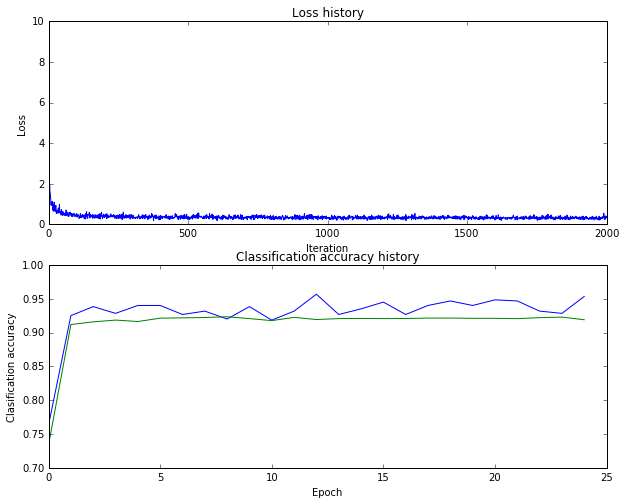

epoch (1 / 24): loss: 8.993605 train acc: 0.756667 val acc: 0.730100 lr: 1.000000
epoch (2 / 24): loss: 2.768443 train acc: 0.701667 val acc: 0.667800 lr: 1.000000
epoch (3 / 24): loss: 2.556353 train acc: 0.758333 val acc: 0.736300 lr: 1.000000
epoch (4 / 24): loss: 2.578774 train acc: 0.723333 val acc: 0.709600 lr: 1.000000
epoch (5 / 24): loss: 2.362953 train acc: 0.721667 val acc: 0.733600 lr: 1.000000
epoch (6 / 24): loss: 2.639738 train acc: 0.705000 val acc: 0.683800 lr: 1.000000
epoch (7 / 24): loss: 2.827805 train acc: 0.766667 val acc: 0.747700 lr: 1.000000
epoch (8 / 24): loss: 2.860921 train acc: 0.706667 val acc: 0.702800 lr: 1.000000
epoch (9 / 24): loss: 2.116945 train acc: 0.685000 val acc: 0.661100 lr: 1.000000
epoch (10 / 24): loss: 2.063894 train acc: 0.765000 val acc: 0.760100 lr: 1.000000
epoch (11 / 24): loss: 3.279956 train acc: 0.673333 val acc: 0.677300 lr: 1.000000
epoch (12 / 24): loss: 2.328401 train acc: 0.740000 val acc: 0.679600 lr: 1.000000
epoch (13 / 2

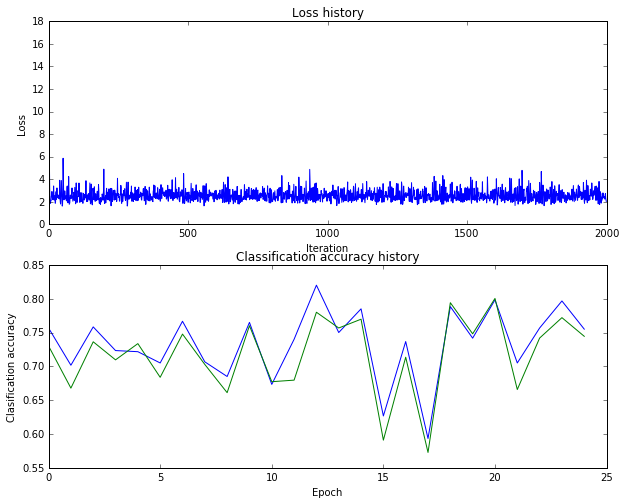

epoch (1 / 24): loss: 8.980556 train acc: 0.771667 val acc: 0.768600 lr: 1.000000
epoch (2 / 24): loss: 5.943073 train acc: 0.563333 val acc: 0.543800 lr: 1.000000
epoch (3 / 24): loss: 5.478102 train acc: 0.536667 val acc: 0.492200 lr: 1.000000
epoch (4 / 24): loss: 10.226671 train acc: 0.673333 val acc: 0.687600 lr: 1.000000
epoch (5 / 24): loss: 7.735402 train acc: 0.760000 val acc: 0.726300 lr: 1.000000
epoch (6 / 24): loss: 5.120900 train acc: 0.580000 val acc: 0.588400 lr: 1.000000
epoch (7 / 24): loss: 6.064332 train acc: 0.463333 val acc: 0.472100 lr: 1.000000
epoch (8 / 24): loss: 5.907871 train acc: 0.528333 val acc: 0.548400 lr: 1.000000
epoch (9 / 24): loss: 7.804558 train acc: 0.676667 val acc: 0.634300 lr: 1.000000
epoch (10 / 24): loss: 7.278460 train acc: 0.615000 val acc: 0.603800 lr: 1.000000
epoch (11 / 24): loss: 7.510039 train acc: 0.578333 val acc: 0.533300 lr: 1.000000
epoch (12 / 24): loss: 3.999885 train acc: 0.583333 val acc: 0.550400 lr: 1.000000
epoch (13 / 

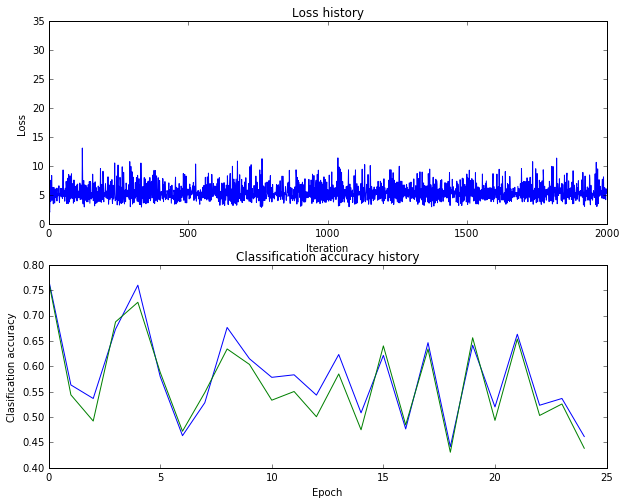

epoch (1 / 24): loss: 9.007208 train acc: 0.740000 val acc: 0.734400 lr: 0.700000
epoch (2 / 24): loss: 0.444908 train acc: 0.913333 val acc: 0.909300 lr: 0.700000
epoch (3 / 24): loss: 0.461930 train acc: 0.918333 val acc: 0.914000 lr: 0.700000
epoch (4 / 24): loss: 0.402702 train acc: 0.920000 val acc: 0.920900 lr: 0.700000
epoch (5 / 24): loss: 0.399679 train acc: 0.928333 val acc: 0.918300 lr: 0.700000
epoch (6 / 24): loss: 0.378378 train acc: 0.935000 val acc: 0.920200 lr: 0.700000
epoch (7 / 24): loss: 0.378472 train acc: 0.931667 val acc: 0.919100 lr: 0.700000
epoch (8 / 24): loss: 0.365703 train acc: 0.935000 val acc: 0.922200 lr: 0.700000
epoch (9 / 24): loss: 0.335290 train acc: 0.928333 val acc: 0.925300 lr: 0.700000
epoch (10 / 24): loss: 0.334114 train acc: 0.938333 val acc: 0.920000 lr: 0.700000
epoch (11 / 24): loss: 0.289686 train acc: 0.943333 val acc: 0.922400 lr: 0.700000
epoch (12 / 24): loss: 0.270768 train acc: 0.956667 val acc: 0.922800 lr: 0.700000
epoch (13 / 2

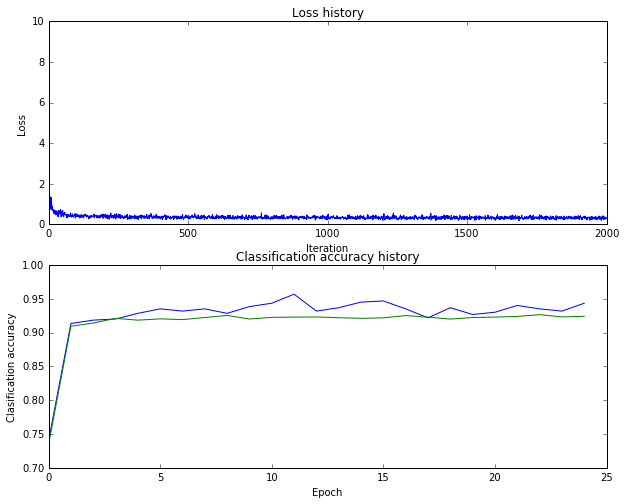

epoch (1 / 24): loss: 8.985938 train acc: 0.738333 val acc: 0.728700 lr: 0.700000
epoch (2 / 24): loss: 1.659784 train acc: 0.756667 val acc: 0.735000 lr: 0.700000
epoch (3 / 24): loss: 2.015555 train acc: 0.745000 val acc: 0.739300 lr: 0.700000
epoch (4 / 24): loss: 2.016633 train acc: 0.753333 val acc: 0.729000 lr: 0.700000
epoch (5 / 24): loss: 1.594936 train acc: 0.846667 val acc: 0.803100 lr: 0.700000
epoch (6 / 24): loss: 1.910362 train acc: 0.846667 val acc: 0.790500 lr: 0.700000
epoch (7 / 24): loss: 1.706712 train acc: 0.873333 val acc: 0.839400 lr: 0.700000
epoch (8 / 24): loss: 1.852937 train acc: 0.830000 val acc: 0.823300 lr: 0.700000
epoch (9 / 24): loss: 1.619726 train acc: 0.863333 val acc: 0.848900 lr: 0.700000
epoch (10 / 24): loss: 2.365817 train acc: 0.805000 val acc: 0.798900 lr: 0.700000
epoch (11 / 24): loss: 1.858631 train acc: 0.793333 val acc: 0.791100 lr: 0.700000
epoch (12 / 24): loss: 1.527615 train acc: 0.848333 val acc: 0.809800 lr: 0.700000
epoch (13 / 2

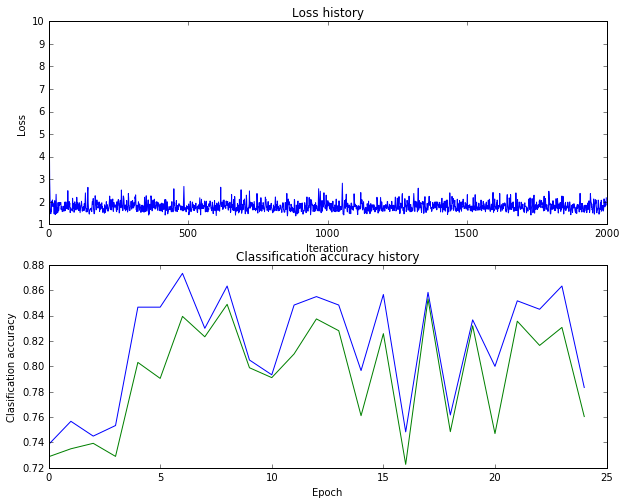

epoch (1 / 24): loss: 9.014887 train acc: 0.763333 val acc: 0.732600 lr: 0.700000
epoch (2 / 24): loss: 3.268992 train acc: 0.720000 val acc: 0.692100 lr: 0.700000
epoch (3 / 24): loss: 3.834013 train acc: 0.668333 val acc: 0.665800 lr: 0.700000
epoch (4 / 24): loss: 3.509870 train acc: 0.591667 val acc: 0.585300 lr: 0.700000
epoch (5 / 24): loss: 3.040101 train acc: 0.638333 val acc: 0.644200 lr: 0.700000
epoch (6 / 24): loss: 4.140353 train acc: 0.638333 val acc: 0.648000 lr: 0.700000
epoch (7 / 24): loss: 3.262933 train acc: 0.703333 val acc: 0.665500 lr: 0.700000
epoch (8 / 24): loss: 2.552891 train acc: 0.740000 val acc: 0.721000 lr: 0.700000
epoch (9 / 24): loss: 3.670499 train acc: 0.616667 val acc: 0.578200 lr: 0.700000
epoch (10 / 24): loss: 3.075153 train acc: 0.788333 val acc: 0.739900 lr: 0.700000
epoch (11 / 24): loss: 3.376004 train acc: 0.570000 val acc: 0.557700 lr: 0.700000
epoch (12 / 24): loss: 3.235267 train acc: 0.791667 val acc: 0.771600 lr: 0.700000
epoch (13 / 2

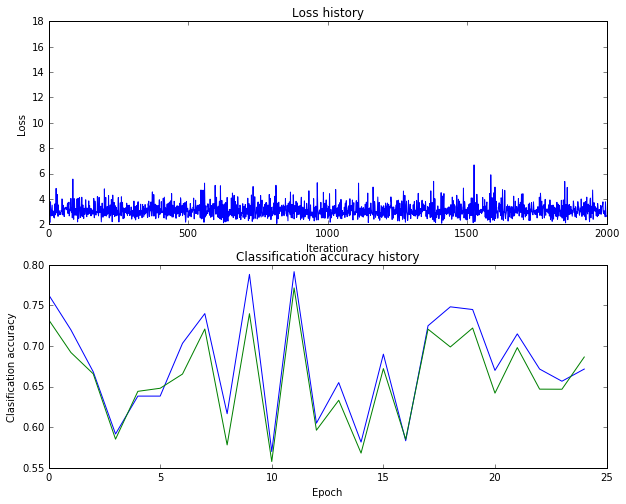

epoch (1 / 24): loss: 8.982093 train acc: 0.705000 val acc: 0.707900 lr: 0.500000
epoch (2 / 24): loss: 0.365241 train acc: 0.926667 val acc: 0.914600 lr: 0.500000
epoch (3 / 24): loss: 0.322558 train acc: 0.930000 val acc: 0.914600 lr: 0.500000
epoch (4 / 24): loss: 0.349700 train acc: 0.926667 val acc: 0.917600 lr: 0.500000
epoch (5 / 24): loss: 0.347401 train acc: 0.931667 val acc: 0.918800 lr: 0.500000
epoch (6 / 24): loss: 0.305047 train acc: 0.938333 val acc: 0.920000 lr: 0.500000
epoch (7 / 24): loss: 0.395123 train acc: 0.925000 val acc: 0.919900 lr: 0.500000
epoch (8 / 24): loss: 0.338564 train acc: 0.923333 val acc: 0.919600 lr: 0.500000
epoch (9 / 24): loss: 0.341659 train acc: 0.931667 val acc: 0.921100 lr: 0.500000
epoch (10 / 24): loss: 0.356382 train acc: 0.936667 val acc: 0.920100 lr: 0.500000
epoch (11 / 24): loss: 0.359487 train acc: 0.926667 val acc: 0.920300 lr: 0.500000
epoch (12 / 24): loss: 0.307330 train acc: 0.935000 val acc: 0.923300 lr: 0.500000
epoch (13 / 2

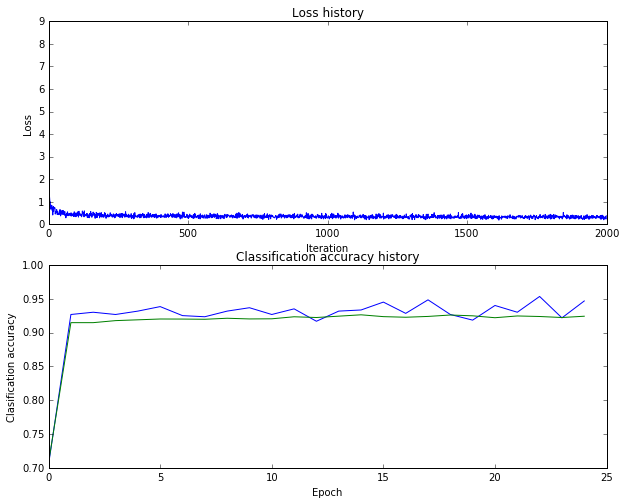

epoch (1 / 24): loss: 8.997217 train acc: 0.761667 val acc: 0.733800 lr: 0.500000
epoch (2 / 24): loss: 1.550049 train acc: 0.873333 val acc: 0.853700 lr: 0.500000
epoch (3 / 24): loss: 1.421685 train acc: 0.903333 val acc: 0.858300 lr: 0.500000
epoch (4 / 24): loss: 1.510798 train acc: 0.876667 val acc: 0.862100 lr: 0.500000
epoch (5 / 24): loss: 1.701731 train acc: 0.858333 val acc: 0.858900 lr: 0.500000
epoch (6 / 24): loss: 1.468920 train acc: 0.881667 val acc: 0.872500 lr: 0.500000
epoch (7 / 24): loss: 1.497169 train acc: 0.855000 val acc: 0.857600 lr: 0.500000
epoch (8 / 24): loss: 1.595732 train acc: 0.871667 val acc: 0.849200 lr: 0.500000
epoch (9 / 24): loss: 1.469417 train acc: 0.878333 val acc: 0.863400 lr: 0.500000
epoch (10 / 24): loss: 1.538690 train acc: 0.875000 val acc: 0.856600 lr: 0.500000
epoch (11 / 24): loss: 1.507220 train acc: 0.893333 val acc: 0.867100 lr: 0.500000
epoch (12 / 24): loss: 1.443554 train acc: 0.903333 val acc: 0.866800 lr: 0.500000
epoch (13 / 2

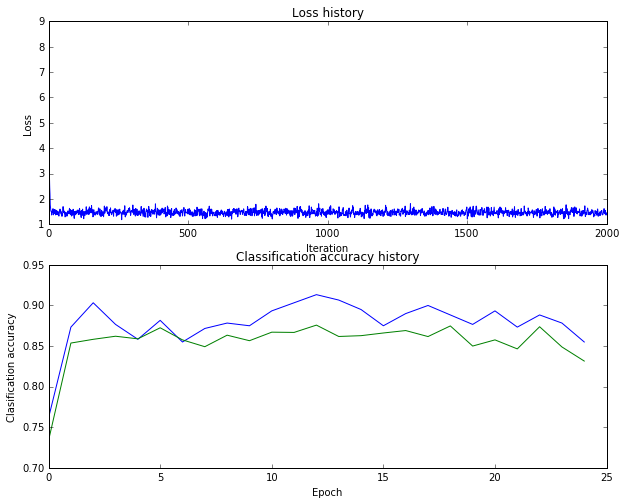

epoch (1 / 24): loss: 9.023401 train acc: 0.731667 val acc: 0.712000 lr: 0.500000
epoch (2 / 24): loss: 2.063538 train acc: 0.803333 val acc: 0.790200 lr: 0.500000
epoch (3 / 24): loss: 1.969673 train acc: 0.835000 val acc: 0.781500 lr: 0.500000
epoch (4 / 24): loss: 2.666974 train acc: 0.815000 val acc: 0.803100 lr: 0.500000
epoch (5 / 24): loss: 1.986118 train acc: 0.801667 val acc: 0.789700 lr: 0.500000
epoch (6 / 24): loss: 1.858162 train acc: 0.843333 val acc: 0.820200 lr: 0.500000
epoch (7 / 24): loss: 2.176315 train acc: 0.808333 val acc: 0.791800 lr: 0.500000
epoch (8 / 24): loss: 2.106045 train acc: 0.780000 val acc: 0.765700 lr: 0.500000
epoch (9 / 24): loss: 2.288404 train acc: 0.711667 val acc: 0.698200 lr: 0.500000
epoch (10 / 24): loss: 2.328771 train acc: 0.845000 val acc: 0.828700 lr: 0.500000
epoch (11 / 24): loss: 2.282533 train acc: 0.806667 val acc: 0.779500 lr: 0.500000
epoch (12 / 24): loss: 2.324409 train acc: 0.713333 val acc: 0.687400 lr: 0.500000
epoch (13 / 2

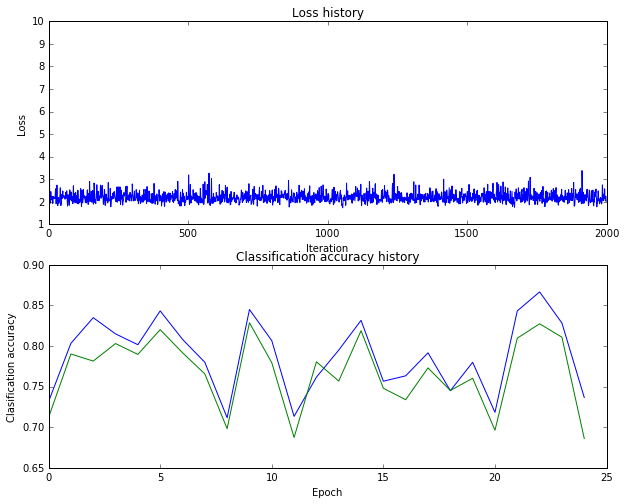

lr 5.000000e-01 reg 0.000000e+00 train accuracy: 0.927680 val accuracy: 0.924800
lr 5.000000e-01 reg 2.500000e-01 train accuracy: 0.849500 val accuracy: 0.863600
lr 5.000000e-01 reg 5.000000e-01 train accuracy: 0.717080 val accuracy: 0.740300
lr 7.000000e-01 reg 0.000000e+00 train accuracy: 0.928040 val accuracy: 0.926600
lr 7.000000e-01 reg 2.500000e-01 train accuracy: 0.809540 val accuracy: 0.826300
lr 7.000000e-01 reg 5.000000e-01 train accuracy: 0.648140 val accuracy: 0.658300
lr 1.000000e+00 reg 0.000000e+00 train accuracy: 0.926680 val accuracy: 0.921200
lr 1.000000e+00 reg 2.500000e-01 train accuracy: 0.755720 val accuracy: 0.771500
lr 1.000000e+00 reg 5.000000e-01 train accuracy: 0.628580 val accuracy: 0.650500
best validation accuracy achieved during cross-validation: 0.926600


In [8]:
# cross-validation on multiple learning rates and regularization
# strengths.
from src.classifiers import LinearSVM
results = {}
best_val = -1
best_linear_svm = None
learning_rates = [1,7e-1,5e-1]
regularization_strengths = [0,0.25,0.5]

for rate in learning_rates:
    for reg in regularization_strengths:
        linear_svm = LinearSVM()
        stats = linear_svm.train(X_train, y_train, X_val, y_val, rate, reg,
                                 num_iters=2000, batch_size=600,
                                 verbose=True)
        
        y_train_pred = linear_svm.predict(X_train)
        train_acc = np.mean(y_train == y_train_pred)
        print 'training accuracy: %f' % (train_acc, )
        
        y_val_pred = linear_svm.predict(X_val)
        val_acc = np.mean(y_val == y_val_pred)
        print 'validation accuracy: %f' % (val_acc, )
        
        # Plot the loss function and train / validation accuracies
        plt.subplot(2, 1, 1)
        plt.plot(stats['loss_history'])
        plt.title('Loss history')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')

        plt.subplot(2, 1, 2)
        plt.plot(stats['train_acc_history'], label='train')
        plt.plot(stats['val_acc_history'], label='val')
        plt.title('Classification accuracy history')
        plt.xlabel('Epoch')
        plt.ylabel('Clasification accuracy')
        plt.show()
        
        results[(rate, reg)] = train_acc, val_acc
        
        if val_acc > best_val:
            best_val = val_acc
            best_linear_svm = linear_svm
    
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

Let's report the final test set accuracy. We'll also output a precision-recall summary and a confusion matrix.

In [21]:
# evaluate the best linear svm on test set
y_test_pred = best_linear_svm.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print 'Linear SVM on raw pixels final test set accuracy: %f' % (test_accuracy, )
print

# Import datasets, classifiers and performance metrics
from sklearn import metrics

print("Classification report for classifier %s:\n%s\n"
      % (best_linear_svm, metrics.classification_report(y_test, y_test_pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_test_pred))

Linear SVM on raw pixels final test set accuracy: 0.922000

Classification report for classifier <src.classifiers.linear_svm.LinearSVM object at 0x10b879e90>:
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       980
          1       0.96      0.98      0.97      1135
          2       0.93      0.90      0.91      1032
          3       0.88      0.91      0.89      1010
          4       0.93      0.94      0.93       982
          5       0.89      0.85      0.87       892
          6       0.94      0.94      0.94       958
          7       0.93      0.93      0.93      1028
          8       0.88      0.89      0.88       974
          9       0.91      0.90      0.91      1009

avg / total       0.92      0.92      0.92     10000


Confusion matrix:
[[ 959    0    0    3    2    6    5    2    1    2]
 [   0 1114    3    2    0    1    3    2   10    0]
 [   4   10  925   18    5    6   12    7   42    3]
 [   3    2   18  915   

# Non-Linear SVM
Here we'll be training a multiclass non-linear SVM model to classify our data. We'll be maximizing the dual objective $\sum_i{\alpha_i}+\dfrac{1}{2}\sum_i{\sum_j{\alpha_i \alpha_j y_i y_j K(x_i,x_j)}}$ with respect to the Lagrange multipliers $\alpha_i$ using batch dual coordinate ascent. We'll be using the Gaussian RBF as our kernel, where $K(x_i,x_j)=\exp\left\{-\gamma \|x_i - x_j\|^2\right\}$.

In [15]:
num_training = 10000
num_validation = 400
num_classes = 10

path_to_dataset = 'data/datasets'

# load test data
X_test, y_test = util.load_mnist('testing', path=path_to_dataset, return_labels=True)
# reshape the image data into rows
X_test = np.reshape(X_test, (X_test.shape[0], -1))

X = {}
y = {}

for j in range(num_classes):
    # load raw MNIST data
    # https://raw.githubusercontent.com/amitgroup/amitgroup/master/amitgroup/io/mnist.py
    X_train_pos, y_train_pos = util.load_mnist('training', digits=[j],
                                               path=path_to_dataset,
                                               return_labels=True)
    y_train_pos[:] = 1
    negative_digits = range(num_classes)
    del negative_digits[j]
    X_train_neg, y_train_neg = util.load_mnist('training', digits=negative_digits,
                                               selection=slice(0, len(y_train_pos)),
                                               path=path_to_dataset, return_labels=True)
    y_train_neg[:] = -1
    
    # balancing/evening things out and subsampling validation data 
    mask = range(num_training/2)
    X_train = np.vstack([X_train_pos[mask], X_train_neg[mask]])
    y_train = np.hstack([y_train_pos[mask], y_train_neg[mask]]).reshape(-1, 1)
    mask = range(num_training/2, (num_training + num_validation)/2)
    X_val = np.vstack([X_train_pos[mask], X_train_neg[mask]])
    y_val = np.hstack([y_train_pos[mask], y_train_neg[mask]]).reshape(-1, 1)
    
    # shuffle training data (not sure if this is necessary)
    indices = np.random.choice(num_training, num_training, replace=False)
    X_train = X_train[indices]
    y_train = y_train[indices]

    # reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    
    X[str(j)] = {'train': X_train, 'val': X_val}
    y[str(j)] = {'train': y_train, 'val': y_val}
    

If you want to skip the training step (after this code cell), you can just directly load the pre-trained models by executing this code cell. 

In [16]:
import dill
with open('data/pretrained/best_nonlinearsvm_models.pkl', 'rb') as f:
    models = dill.load(f)

Here we'll be training our non-linear svm classifier. Skip this step if you executed the last code cell, as you would have already loaded the pre-trained models.


Training digit 0...

Pre-calculating kernel...
epoch (0 / 24) gain: 0.000000 train acc: 0.955000 val acc: 0.940000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 5000/5000


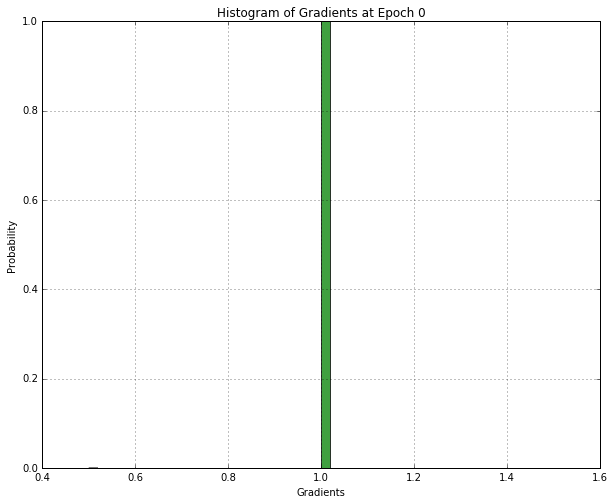

epoch (1 / 24) gain: 19.775661 train acc: 0.976800 val acc: 0.965000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 5000/5000


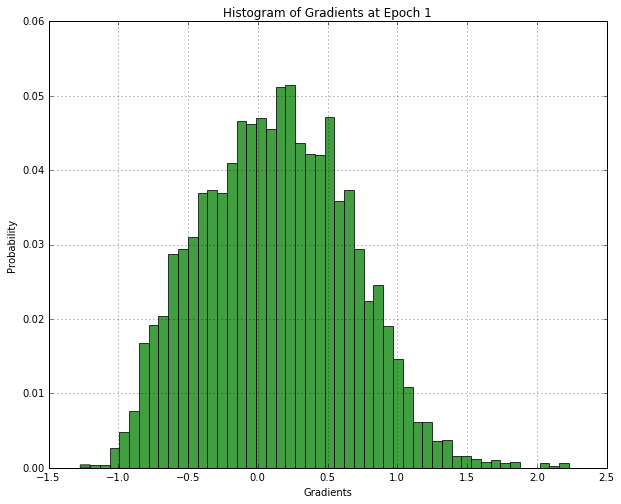

epoch (2 / 24) gain: 28.539861 train acc: 0.980000 val acc: 0.972500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4934/5000


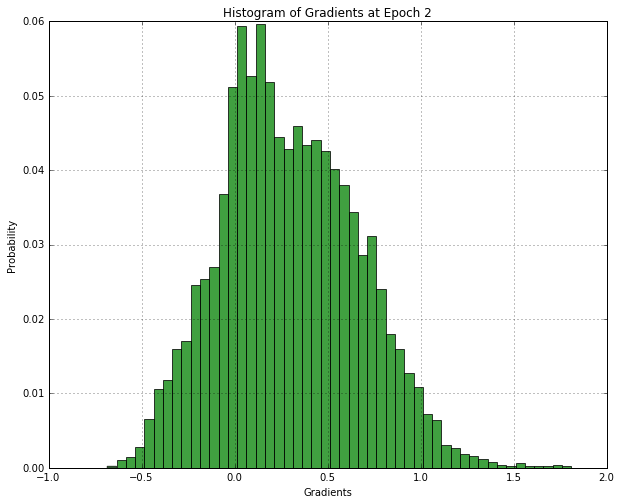

epoch (3 / 24) gain: 34.974011 train acc: 0.982200 val acc: 0.977500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4808/5000


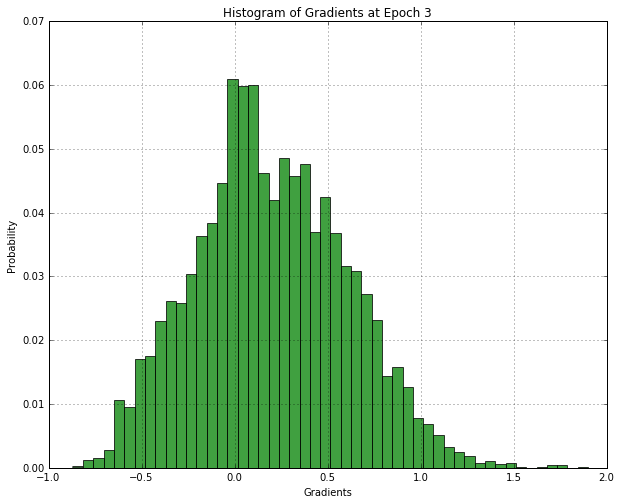

epoch (4 / 24) gain: 40.200615 train acc: 0.983200 val acc: 0.977500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4731/5000


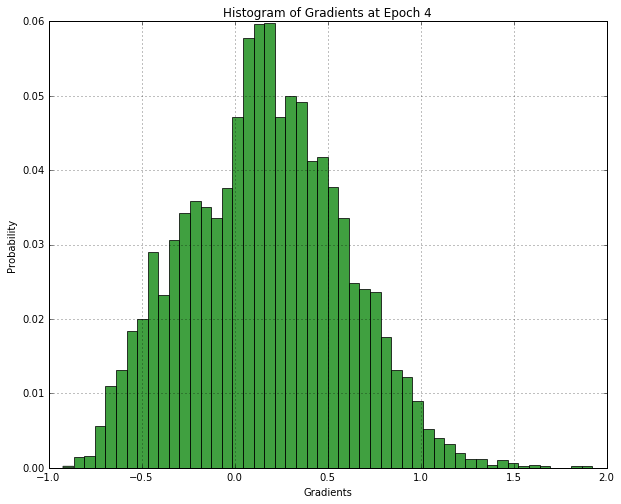

epoch (5 / 24) gain: 44.646530 train acc: 0.984200 val acc: 0.977500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4661/5000


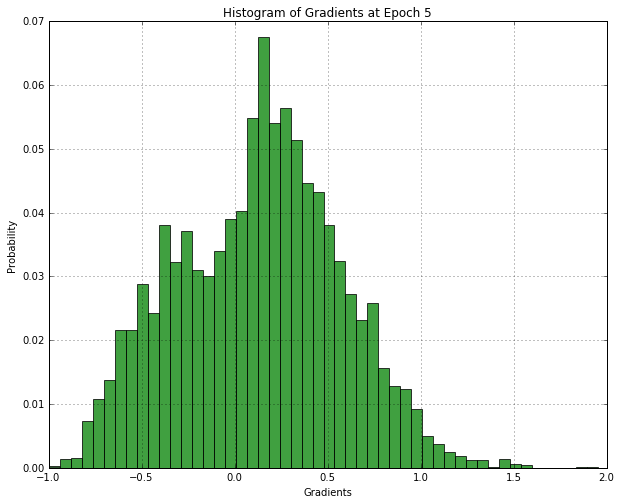

epoch (6 / 24) gain: 48.546555 train acc: 0.985600 val acc: 0.977500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4591/5000


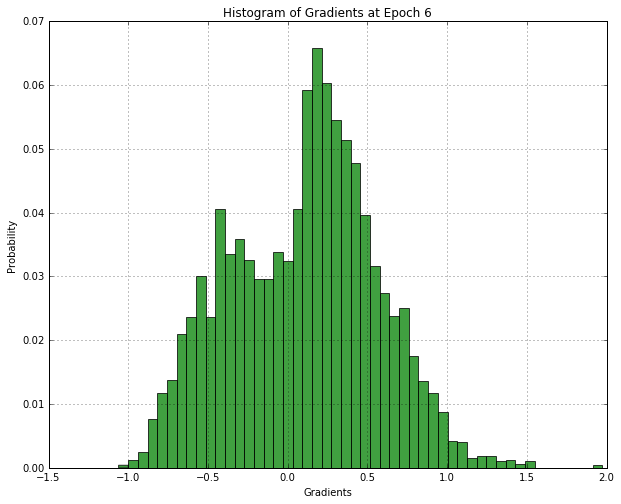

epoch (7 / 24) gain: 52.047664 train acc: 0.986200 val acc: 0.982500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4540/5000


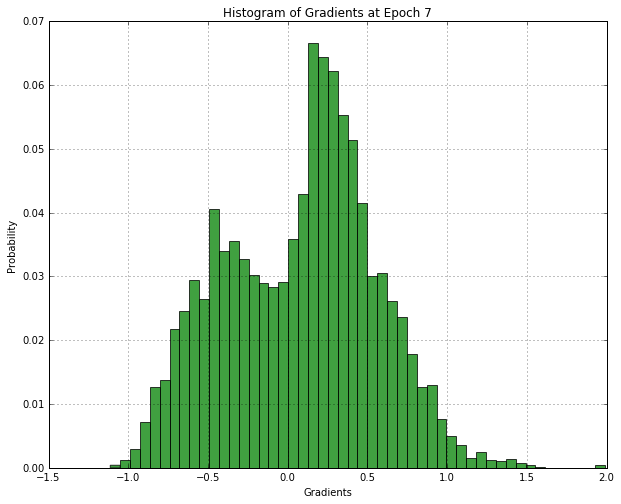

epoch (8 / 24) gain: 55.242361 train acc: 0.987200 val acc: 0.982500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4501/5000


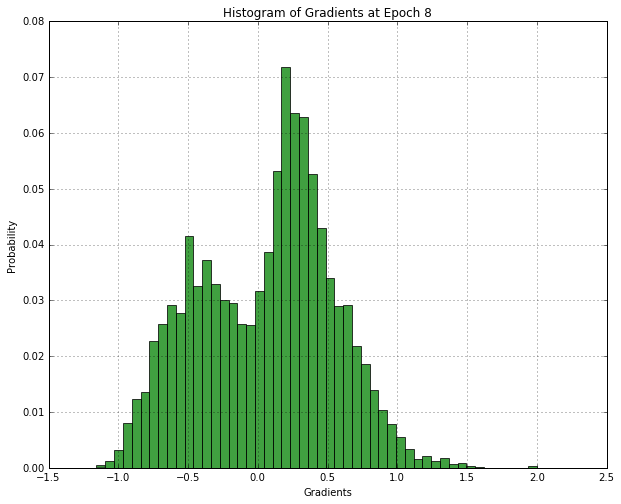

epoch (9 / 24) gain: 58.189751 train acc: 0.987600 val acc: 0.982500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4457/5000


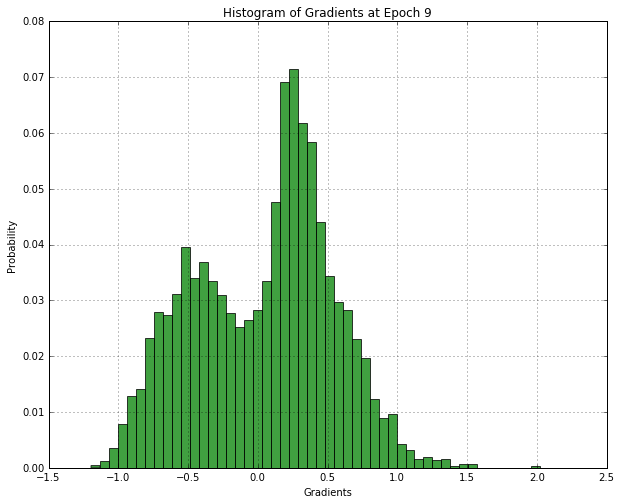

epoch (10 / 24) gain: 60.931506 train acc: 0.988400 val acc: 0.985000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4425/5000


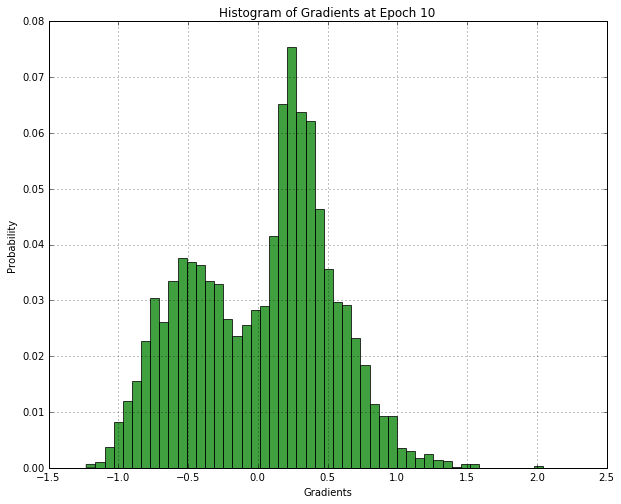

epoch (11 / 24) gain: 63.502146 train acc: 0.989200 val acc: 0.985000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4393/5000


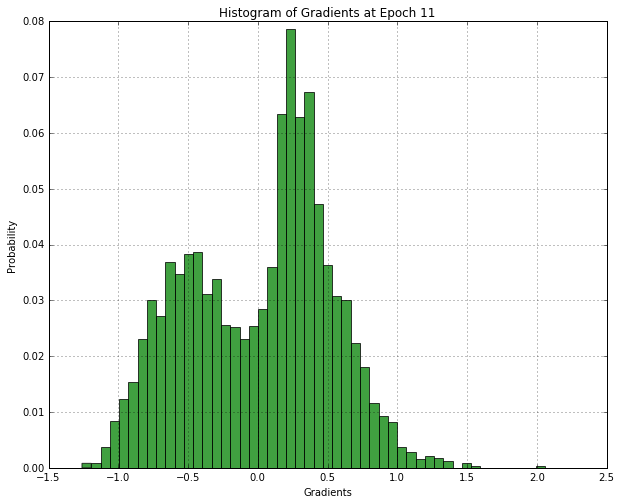

epoch (12 / 24) gain: 65.926955 train acc: 0.989400 val acc: 0.982500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4361/5000


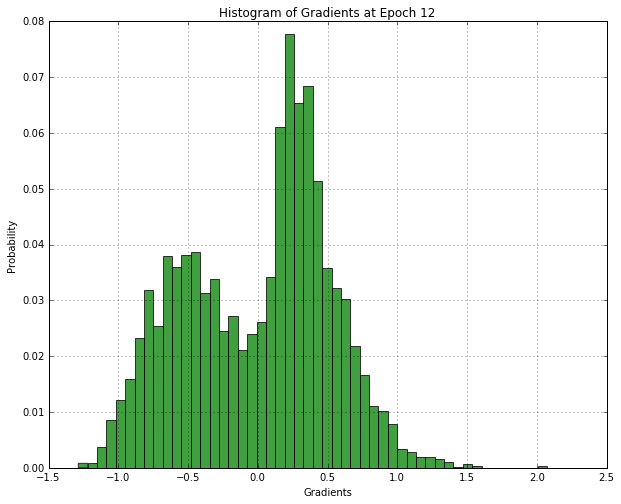

epoch (13 / 24) gain: 68.222594 train acc: 0.989800 val acc: 0.982500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4342/5000


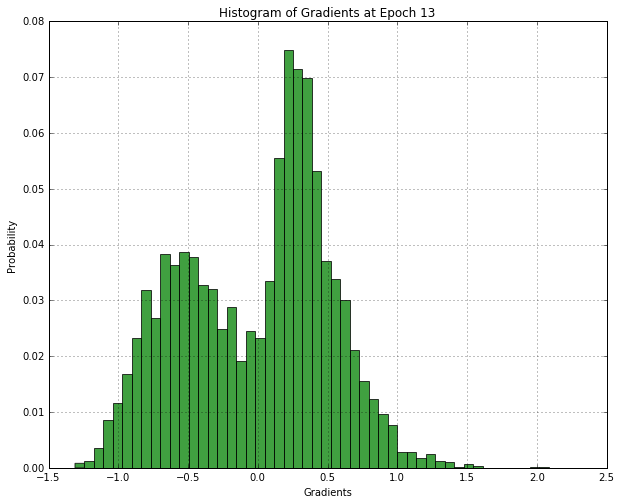

epoch (14 / 24) gain: 70.405365 train acc: 0.989800 val acc: 0.982500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4299/5000


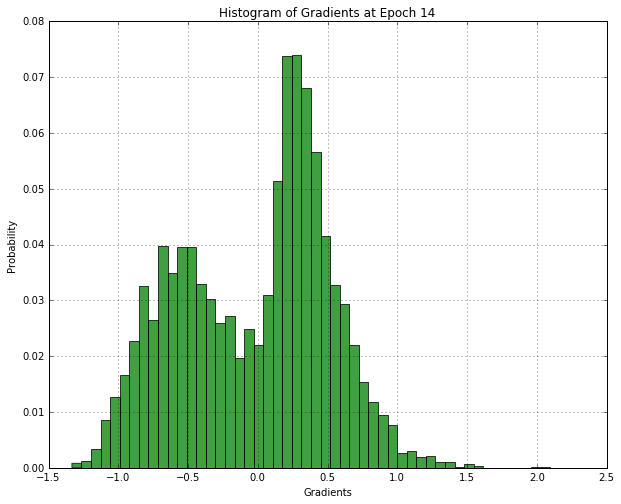

epoch (15 / 24) gain: 72.489241 train acc: 0.989800 val acc: 0.982500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4276/5000


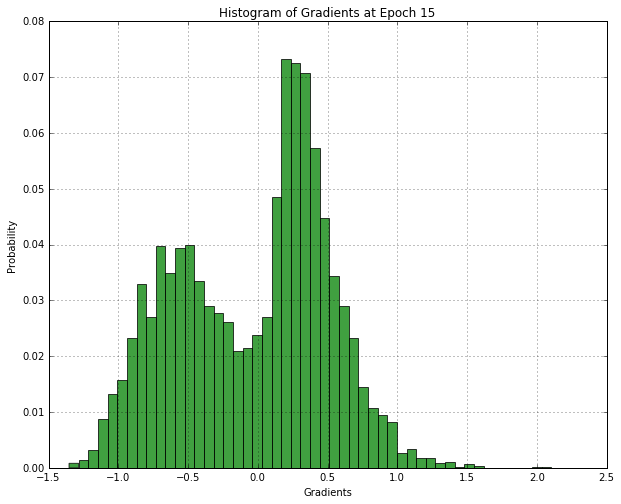

epoch (16 / 24) gain: 74.483143 train acc: 0.990600 val acc: 0.982500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4250/5000


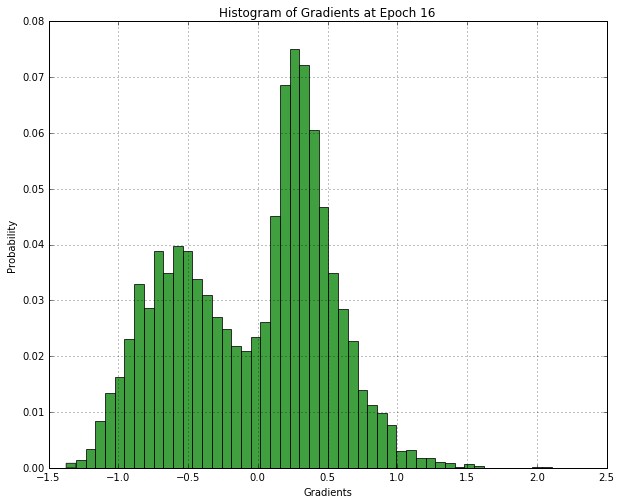

epoch (17 / 24) gain: 76.393929 train acc: 0.990800 val acc: 0.982500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4221/5000


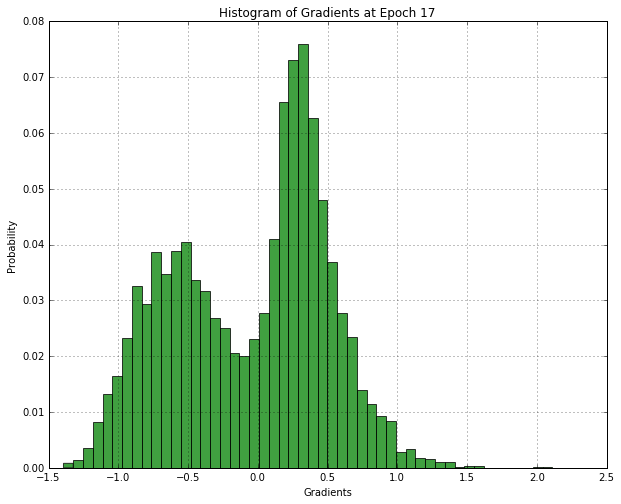

epoch (18 / 24) gain: 78.232611 train acc: 0.991000 val acc: 0.982500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4201/5000


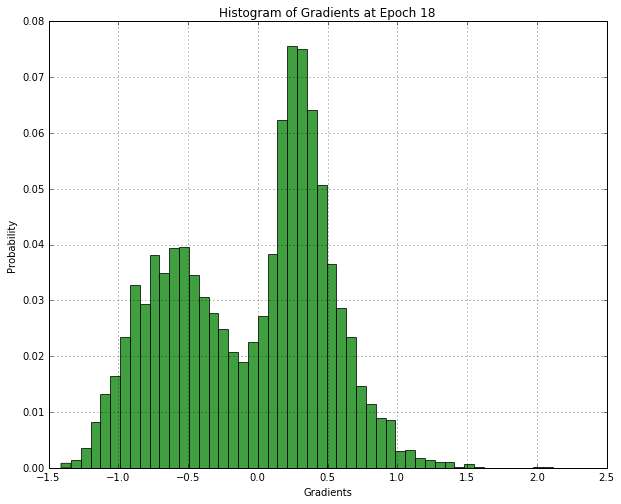

epoch (19 / 24) gain: 80.004806 train acc: 0.991000 val acc: 0.985000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4181/5000


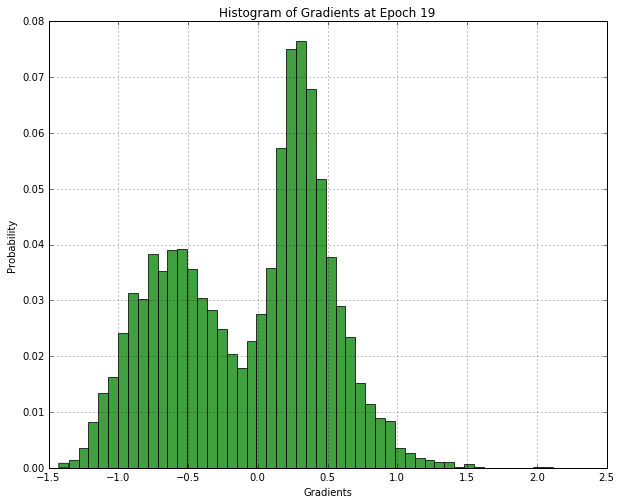

epoch (20 / 24) gain: 81.714259 train acc: 0.991200 val acc: 0.985000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4159/5000


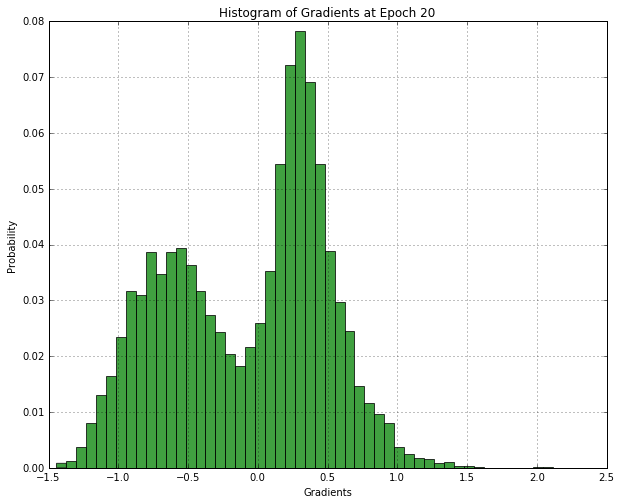

epoch (21 / 24) gain: 83.366155 train acc: 0.992000 val acc: 0.985000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4141/5000


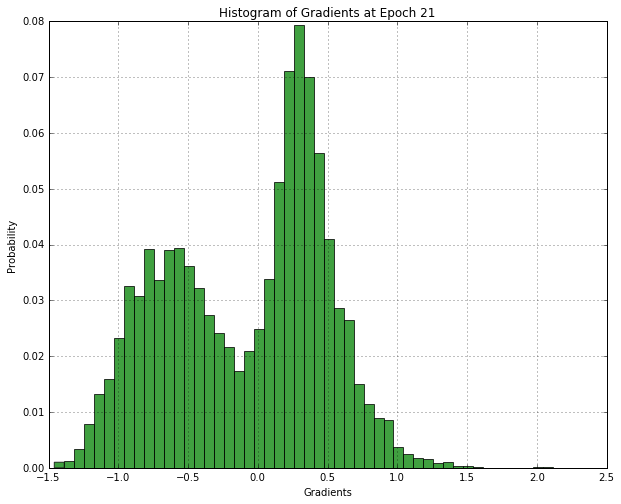

epoch (22 / 24) gain: 84.965759 train acc: 0.992200 val acc: 0.985000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4111/5000


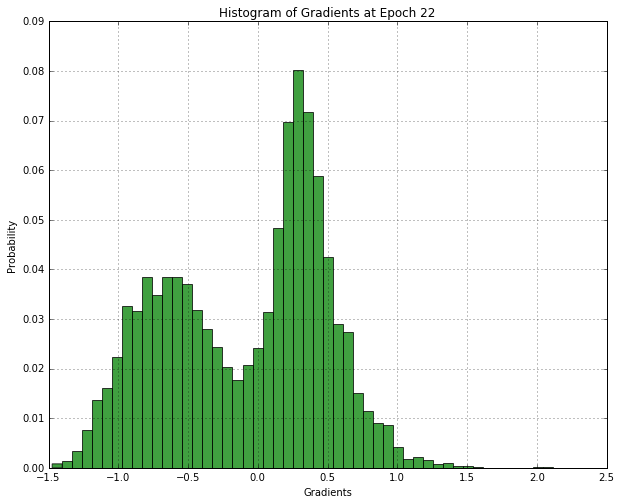

epoch (23 / 24) gain: 86.513503 train acc: 0.992200 val acc: 0.985000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4091/5000


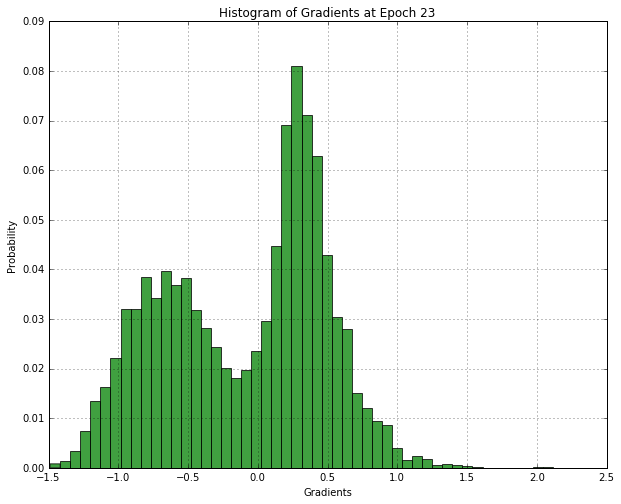

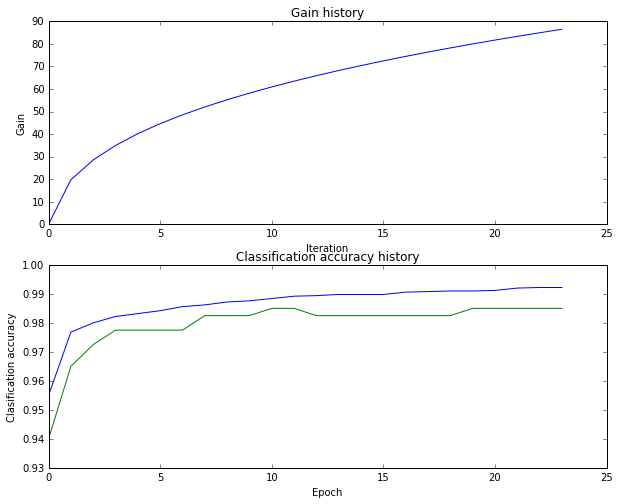

binary training accuracy for digit 0: 0.992200
binary validation accuracy for digit 0: 0.985000
best binary training accuracy for digit 0: 0.992200
best binary validation accuracy for digit 0: 0.985000

Training digit 1...

Pre-calculating kernel...
epoch (0 / 24) gain: 0.000000 train acc: 0.961200 val acc: 0.960000 lr: 0.007000 C: 10.000000 gamma: 0.010000 support vectors: 5000/5000


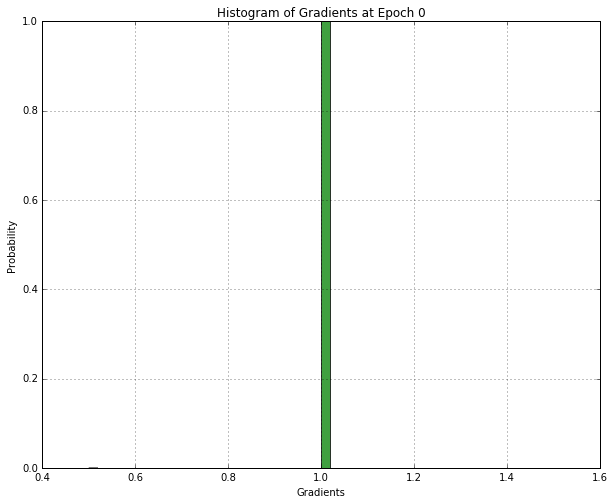

epoch (1 / 24) gain: 0.813261 train acc: 0.964600 val acc: 0.965000 lr: 0.007000 C: 10.000000 gamma: 0.010000 support vectors: 4836/5000


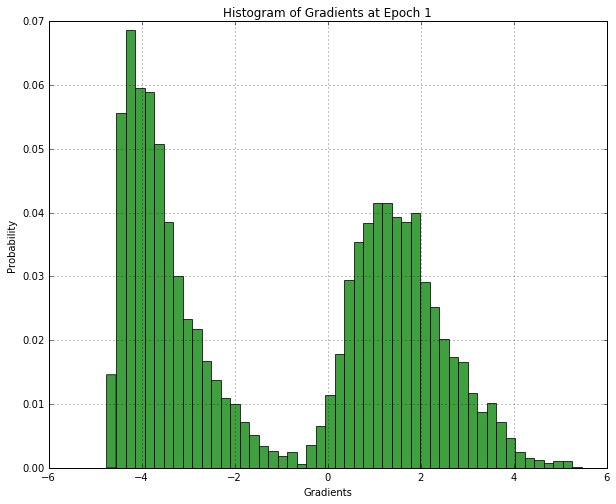

epoch (2 / 24) gain: 6.567230 train acc: 0.963800 val acc: 0.955000 lr: 0.007000 C: 10.000000 gamma: 0.010000 support vectors: 4363/5000


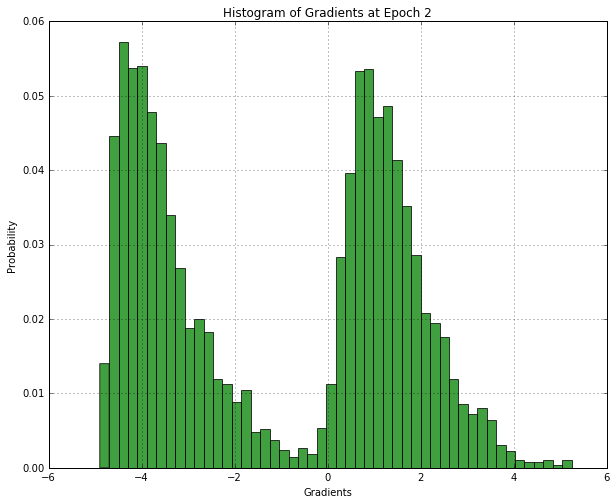

epoch (3 / 24) gain: 17.576230 train acc: 0.965800 val acc: 0.960000 lr: 0.007000 C: 10.000000 gamma: 0.010000 support vectors: 4092/5000


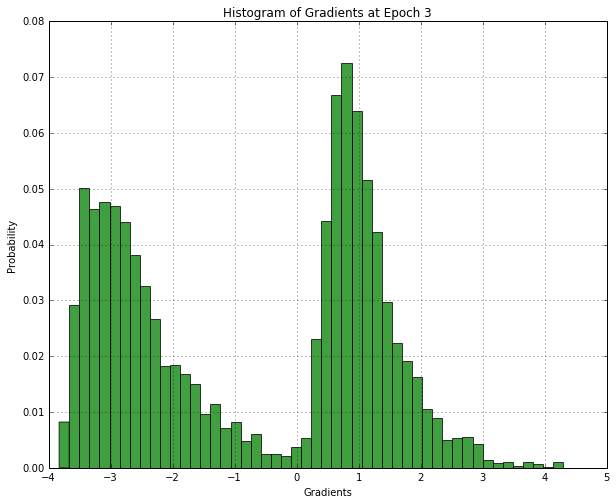

epoch (4 / 24) gain: 25.728947 train acc: 0.975000 val acc: 0.972500 lr: 0.007000 C: 10.000000 gamma: 0.010000 support vectors: 3954/5000


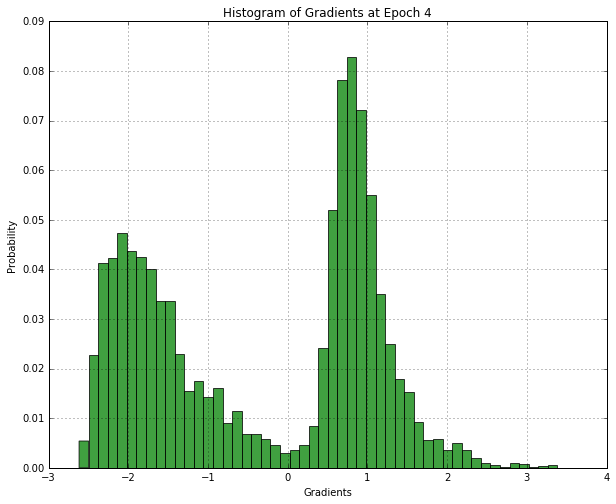

epoch (5 / 24) gain: 30.935995 train acc: 0.980000 val acc: 0.980000 lr: 0.007000 C: 10.000000 gamma: 0.010000 support vectors: 3895/5000


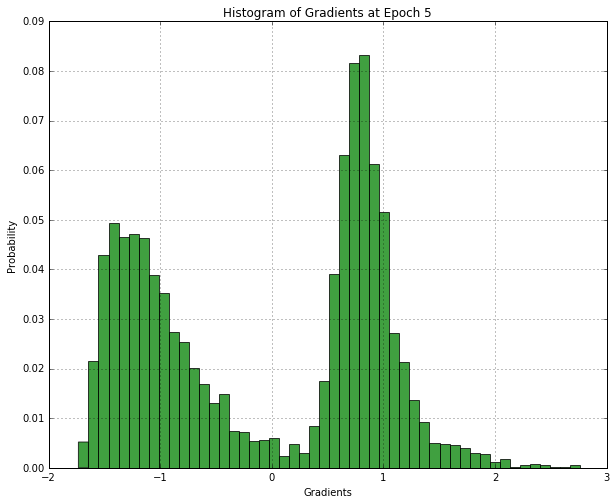

epoch (6 / 24) gain: 34.702612 train acc: 0.980600 val acc: 0.980000 lr: 0.007000 C: 10.000000 gamma: 0.010000 support vectors: 3859/5000


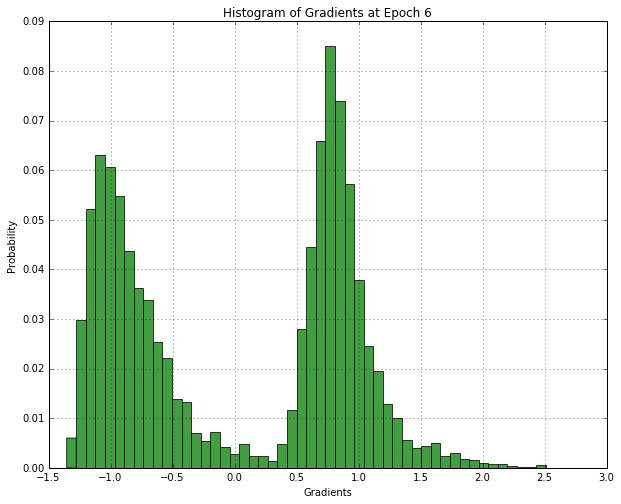

epoch (7 / 24) gain: 37.777611 train acc: 0.981800 val acc: 0.980000 lr: 0.007000 C: 10.000000 gamma: 0.010000 support vectors: 3832/5000


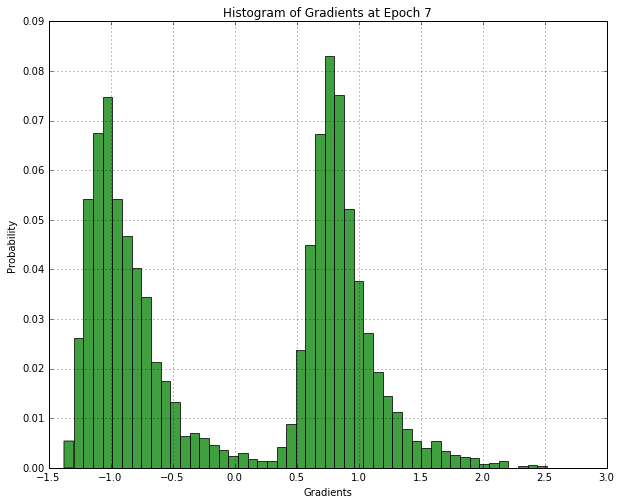

epoch (8 / 24) gain: 40.542208 train acc: 0.982600 val acc: 0.980000 lr: 0.007000 C: 10.000000 gamma: 0.010000 support vectors: 3804/5000


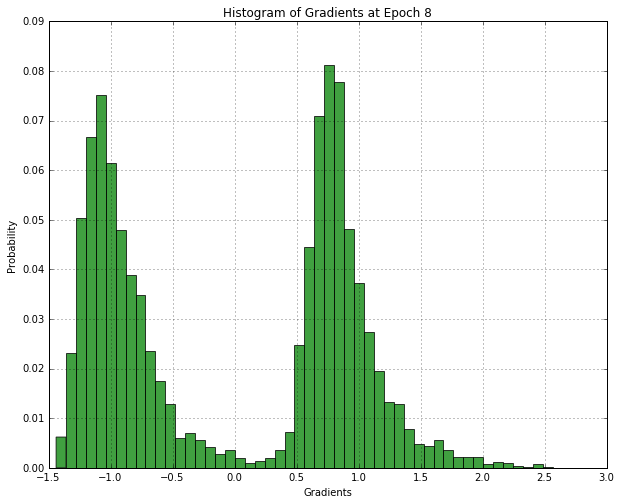

epoch (9 / 24) gain: 43.161292 train acc: 0.982800 val acc: 0.982500 lr: 0.007000 C: 10.000000 gamma: 0.010000 support vectors: 3782/5000


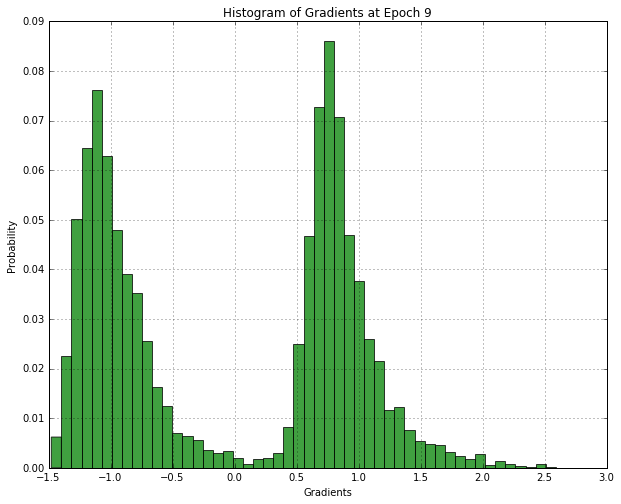

epoch (10 / 24) gain: 45.688351 train acc: 0.983400 val acc: 0.982500 lr: 0.007000 C: 10.000000 gamma: 0.010000 support vectors: 3753/5000


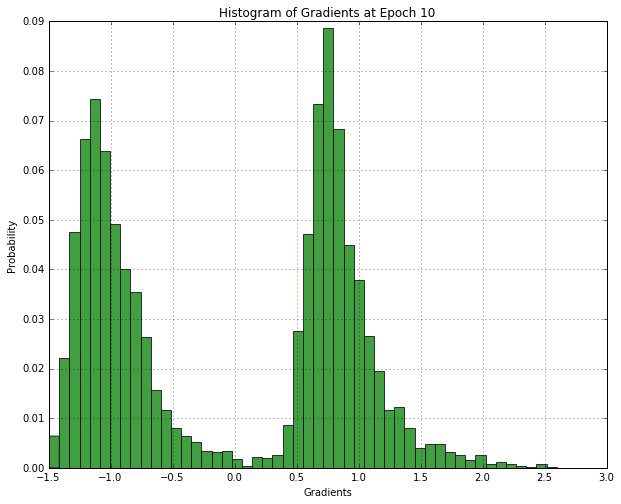

epoch (11 / 24) gain: 48.139017 train acc: 0.983400 val acc: 0.982500 lr: 0.007000 C: 10.000000 gamma: 0.010000 support vectors: 3730/5000


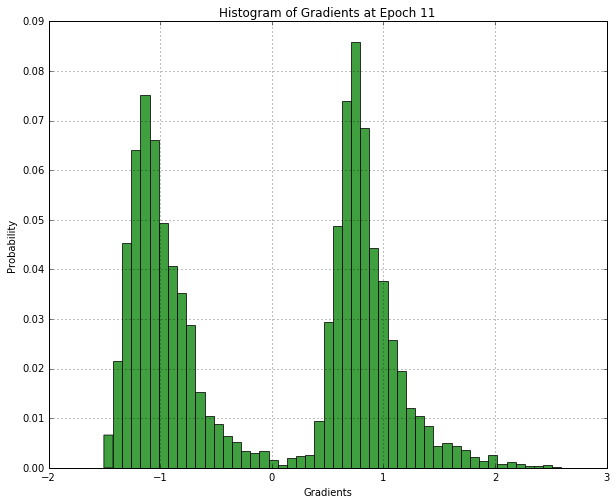

epoch (12 / 24) gain: 50.523641 train acc: 0.983600 val acc: 0.985000 lr: 0.007000 C: 10.000000 gamma: 0.010000 support vectors: 3708/5000


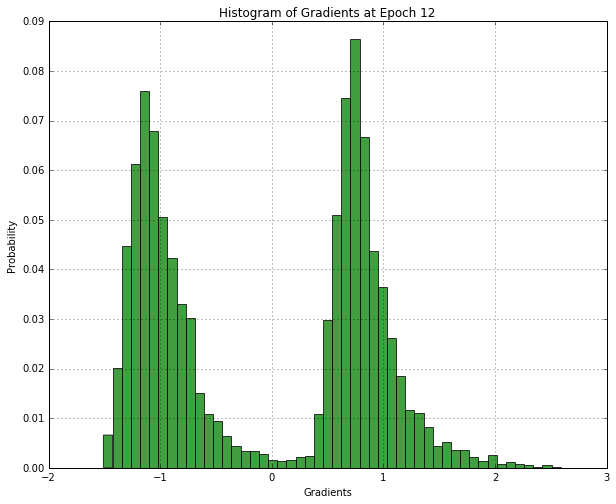

epoch (13 / 24) gain: 52.840756 train acc: 0.984000 val acc: 0.987500 lr: 0.007000 C: 10.000000 gamma: 0.010000 support vectors: 3692/5000


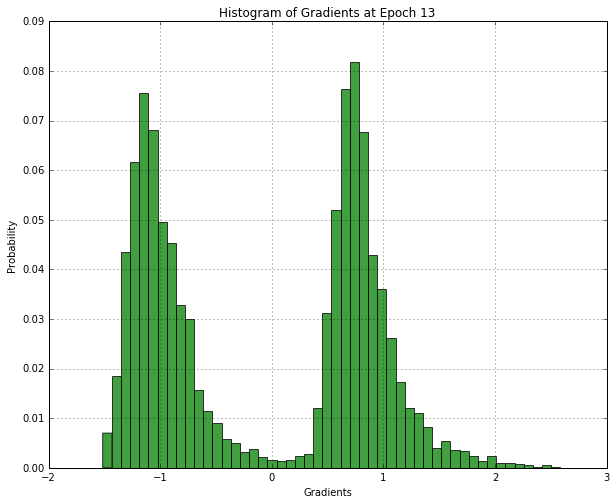

epoch (14 / 24) gain: 55.095836 train acc: 0.984600 val acc: 0.987500 lr: 0.007000 C: 10.000000 gamma: 0.010000 support vectors: 3664/5000


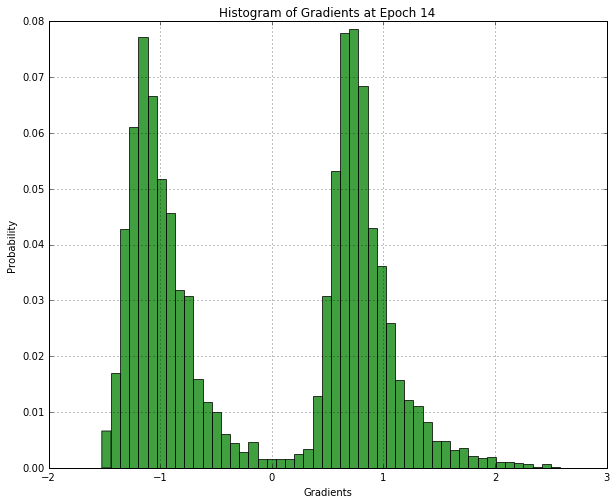

epoch (15 / 24) gain: 57.295911 train acc: 0.985200 val acc: 0.990000 lr: 0.007000 C: 10.000000 gamma: 0.010000 support vectors: 3640/5000


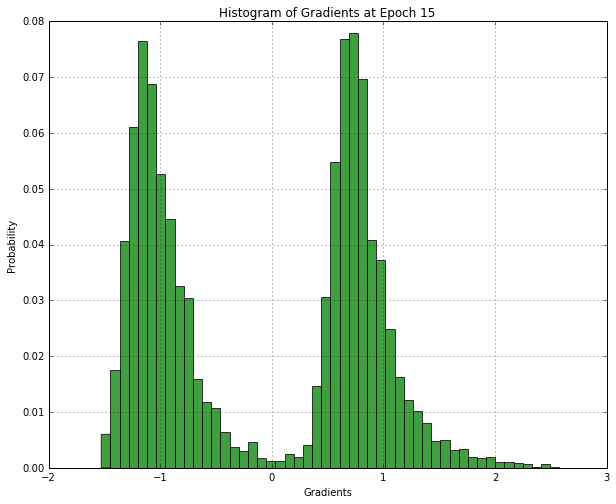

epoch (16 / 24) gain: 59.446532 train acc: 0.985200 val acc: 0.990000 lr: 0.007000 C: 10.000000 gamma: 0.010000 support vectors: 3621/5000


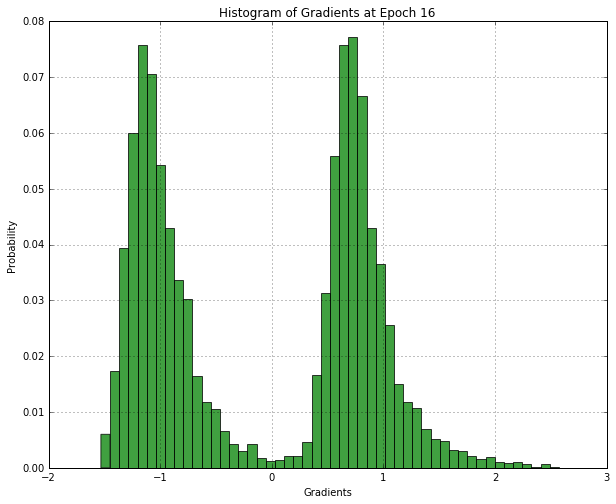

epoch (17 / 24) gain: 61.551198 train acc: 0.985200 val acc: 0.990000 lr: 0.007000 C: 10.000000 gamma: 0.010000 support vectors: 3603/5000


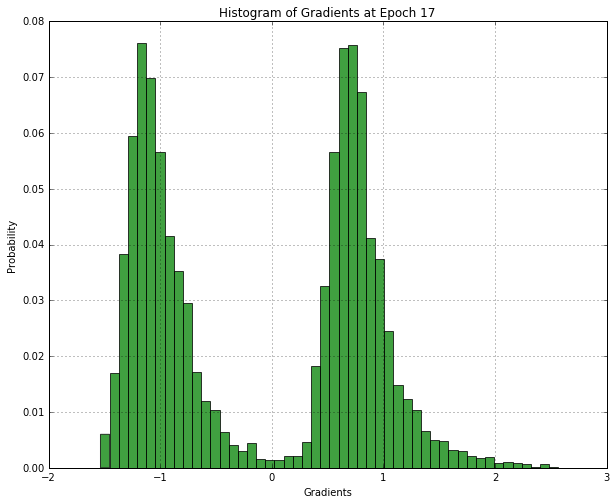

epoch (18 / 24) gain: 63.610649 train acc: 0.985400 val acc: 0.990000 lr: 0.007000 C: 10.000000 gamma: 0.010000 support vectors: 3590/5000


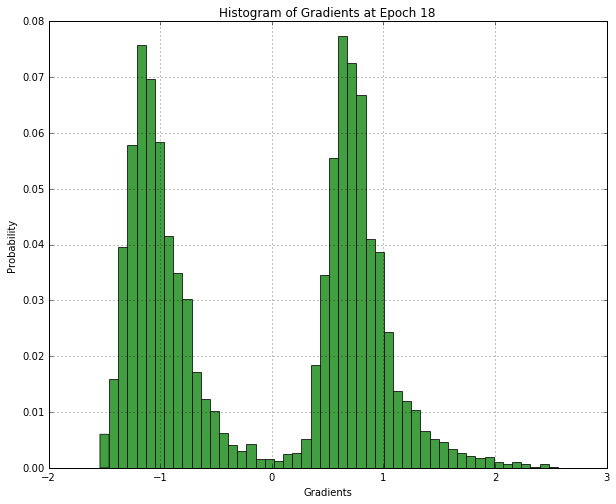

epoch (19 / 24) gain: 65.628422 train acc: 0.985400 val acc: 0.990000 lr: 0.007000 C: 10.000000 gamma: 0.010000 support vectors: 3573/5000


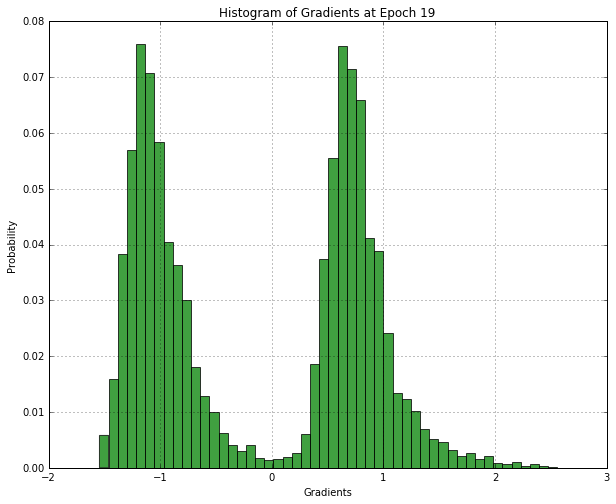

epoch (20 / 24) gain: 67.607455 train acc: 0.985400 val acc: 0.990000 lr: 0.007000 C: 10.000000 gamma: 0.010000 support vectors: 3556/5000


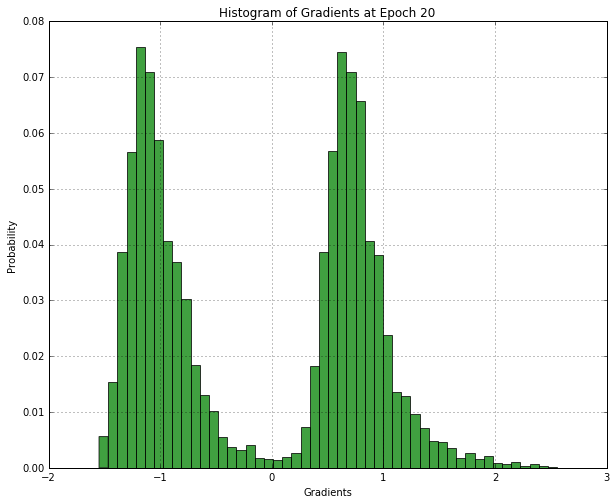

epoch (21 / 24) gain: 69.549466 train acc: 0.985200 val acc: 0.990000 lr: 0.007000 C: 10.000000 gamma: 0.010000 support vectors: 3537/5000


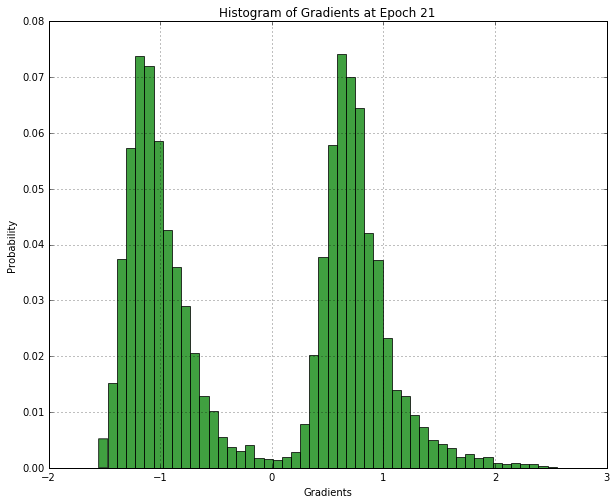

epoch (22 / 24) gain: 71.456956 train acc: 0.985200 val acc: 0.990000 lr: 0.007000 C: 10.000000 gamma: 0.010000 support vectors: 3519/5000


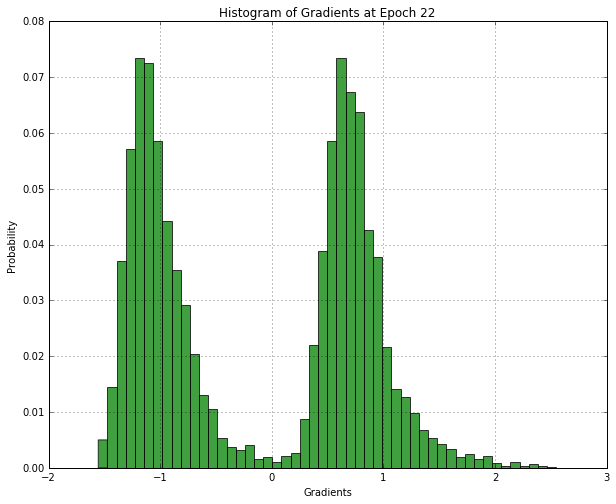

epoch (23 / 24) gain: 73.331747 train acc: 0.985400 val acc: 0.990000 lr: 0.007000 C: 10.000000 gamma: 0.010000 support vectors: 3504/5000


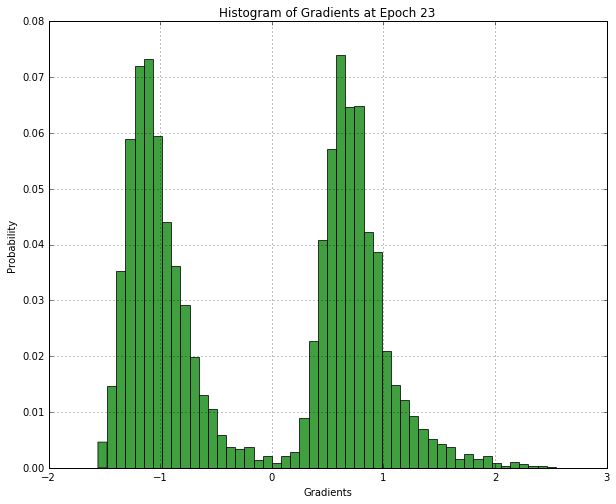

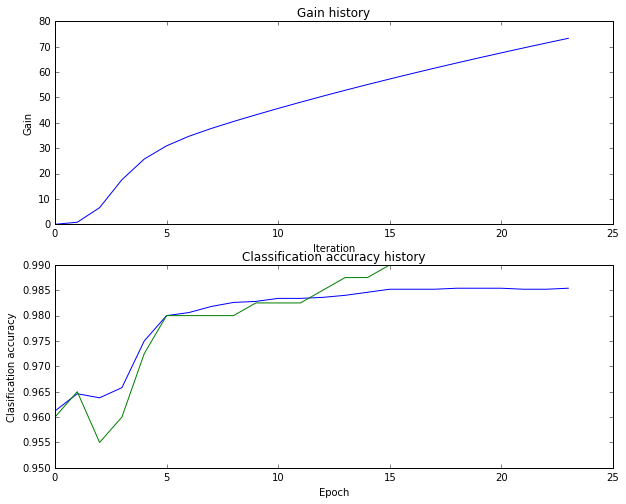

binary training accuracy for digit 1: 0.985400
binary validation accuracy for digit 1: 0.990000
best binary training accuracy for digit 1: 0.985400
best binary validation accuracy for digit 1: 0.990000

Training digit 2...

Pre-calculating kernel...
epoch (0 / 24) gain: 0.000000 train acc: 0.933600 val acc: 0.927500 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 5000/5000


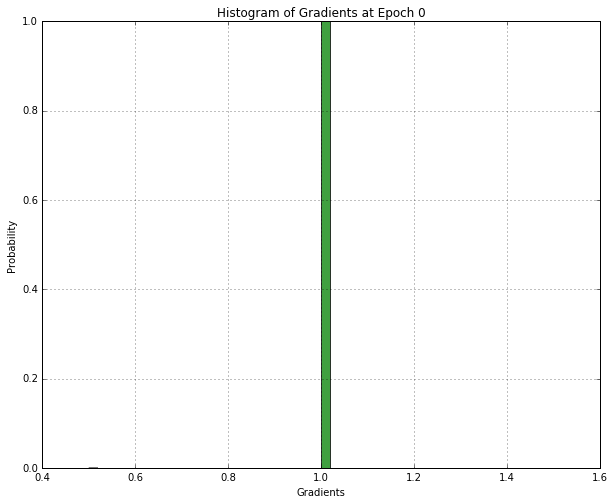

epoch (1 / 24) gain: 30.625559 train acc: 0.948200 val acc: 0.935000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 5000/5000


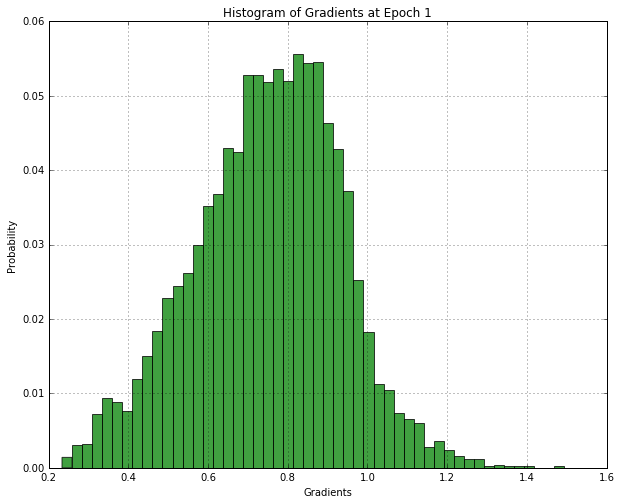

epoch (2 / 24) gain: 49.682205 train acc: 0.954200 val acc: 0.942500 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 5000/5000


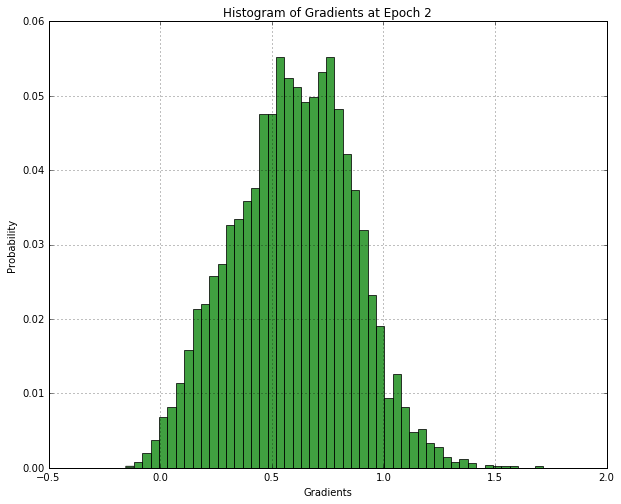

epoch (3 / 24) gain: 63.677828 train acc: 0.960200 val acc: 0.952500 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 5000/5000


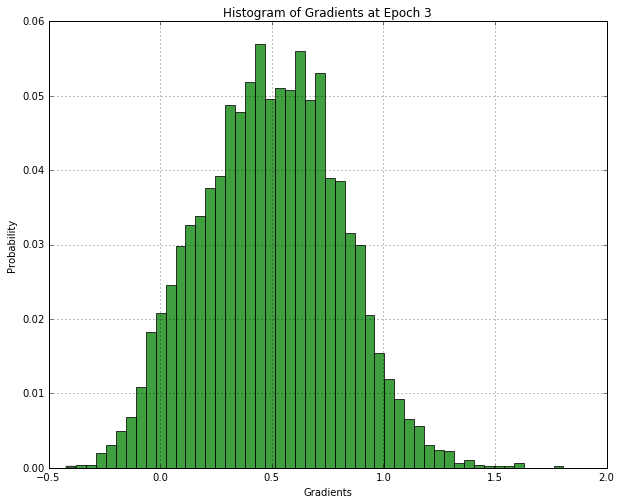

epoch (4 / 24) gain: 75.036980 train acc: 0.965400 val acc: 0.960000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 5000/5000


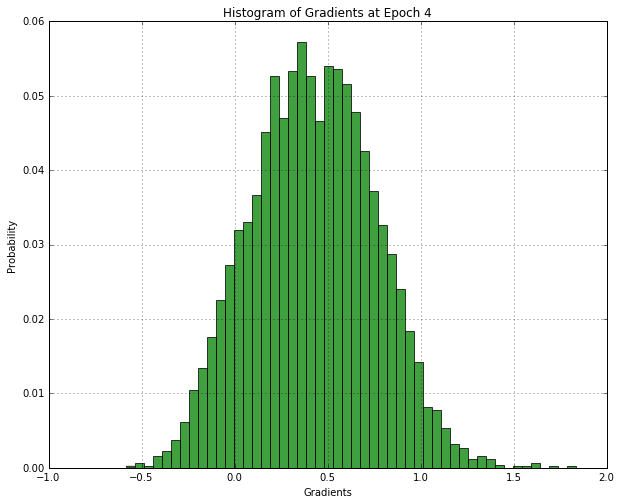

epoch (5 / 24) gain: 84.820470 train acc: 0.968200 val acc: 0.960000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 5000/5000


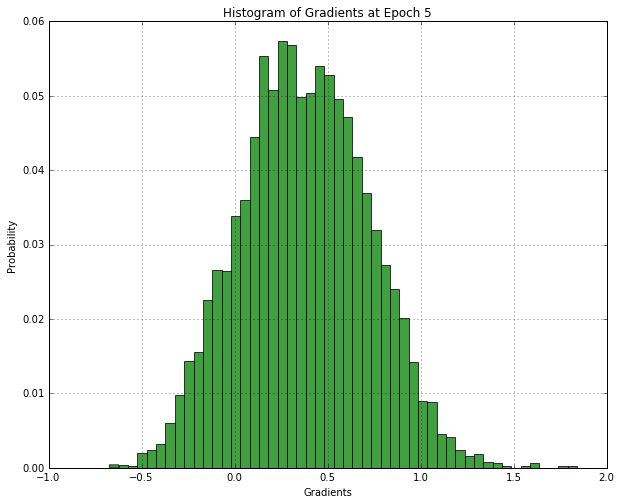

epoch (6 / 24) gain: 93.549740 train acc: 0.971000 val acc: 0.965000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4993/5000


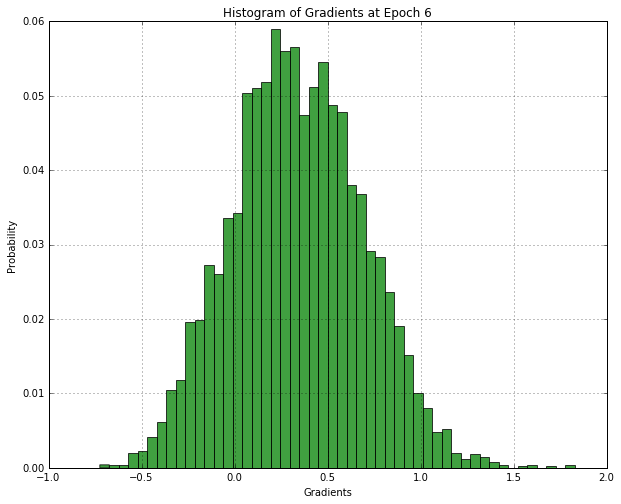

epoch (7 / 24) gain: 101.498735 train acc: 0.972600 val acc: 0.965000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4978/5000


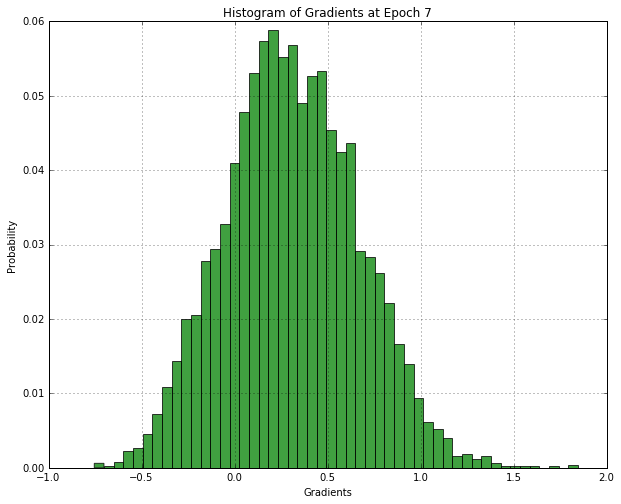

epoch (8 / 24) gain: 108.824256 train acc: 0.976400 val acc: 0.965000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4964/5000


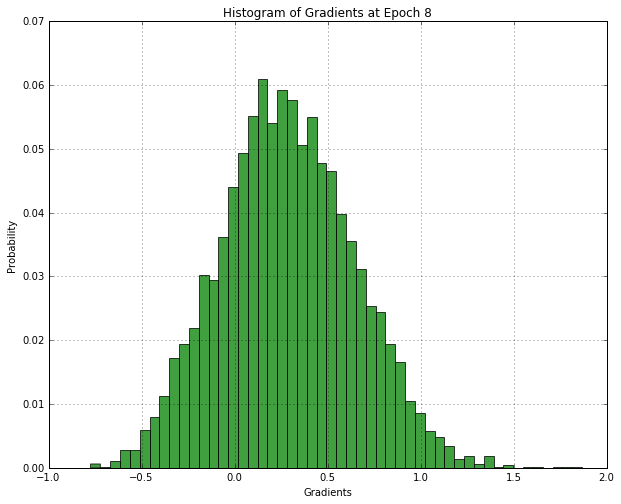

epoch (9 / 24) gain: 115.636443 train acc: 0.979200 val acc: 0.965000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4951/5000


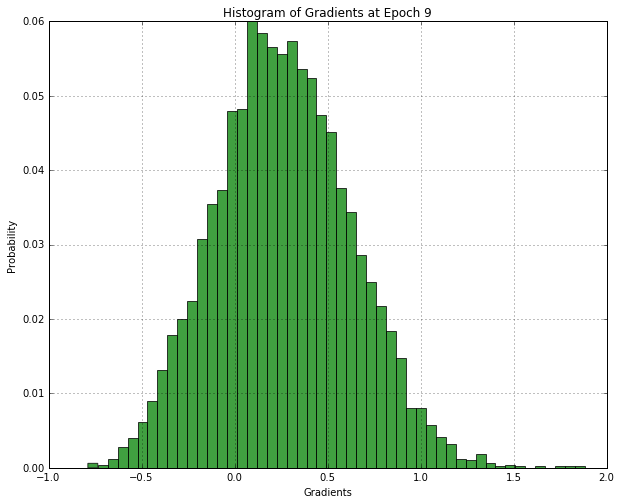

epoch (10 / 24) gain: 122.015925 train acc: 0.979600 val acc: 0.965000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4928/5000


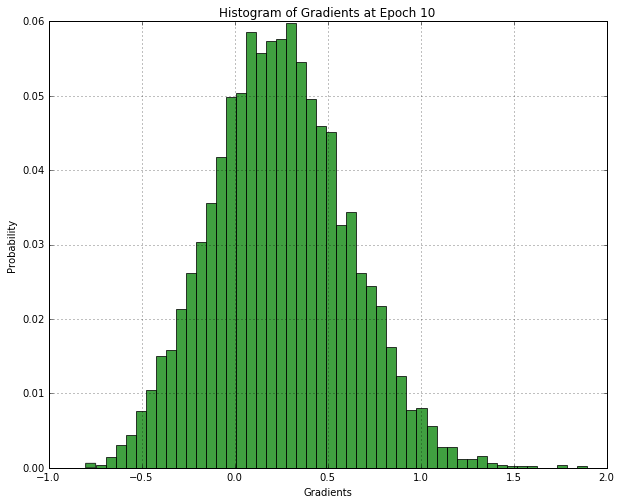

epoch (11 / 24) gain: 128.024822 train acc: 0.980000 val acc: 0.965000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4913/5000


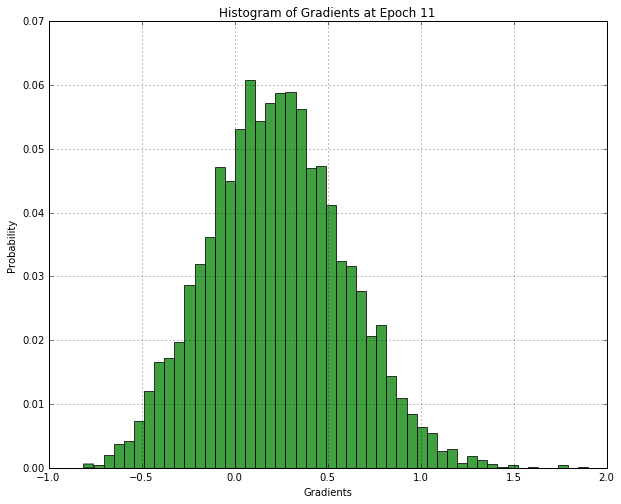

epoch (12 / 24) gain: 133.714470 train acc: 0.980400 val acc: 0.967500 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4894/5000


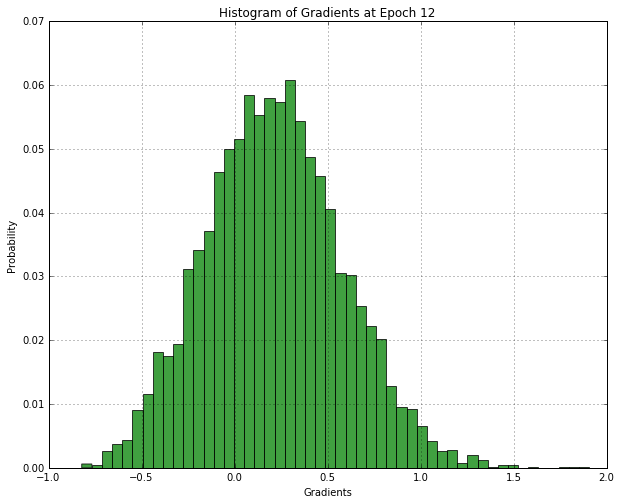

epoch (13 / 24) gain: 139.117419 train acc: 0.981000 val acc: 0.970000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4880/5000


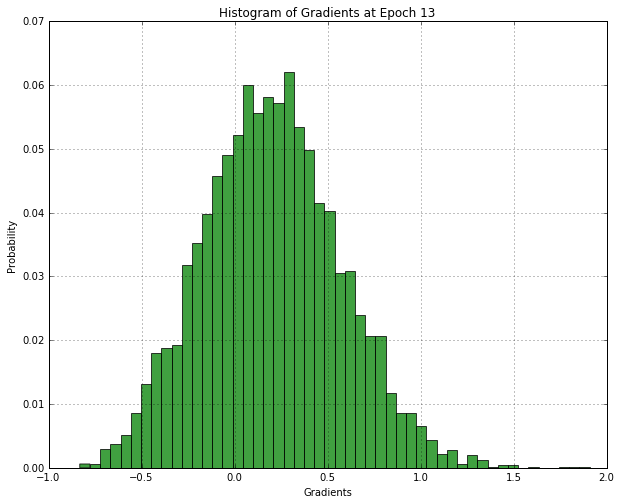

epoch (14 / 24) gain: 144.266729 train acc: 0.981800 val acc: 0.970000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4861/5000


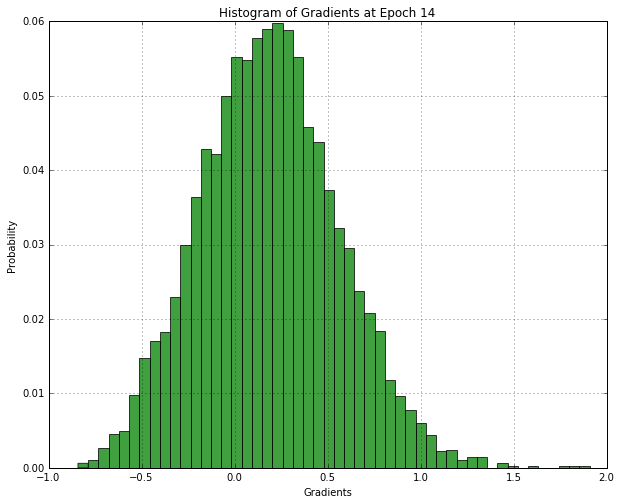

epoch (15 / 24) gain: 149.190533 train acc: 0.982400 val acc: 0.970000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4840/5000


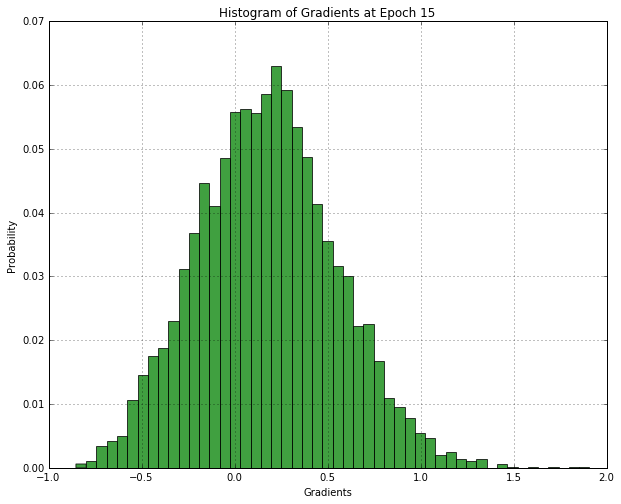

epoch (16 / 24) gain: 153.912978 train acc: 0.983400 val acc: 0.972500 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4830/5000


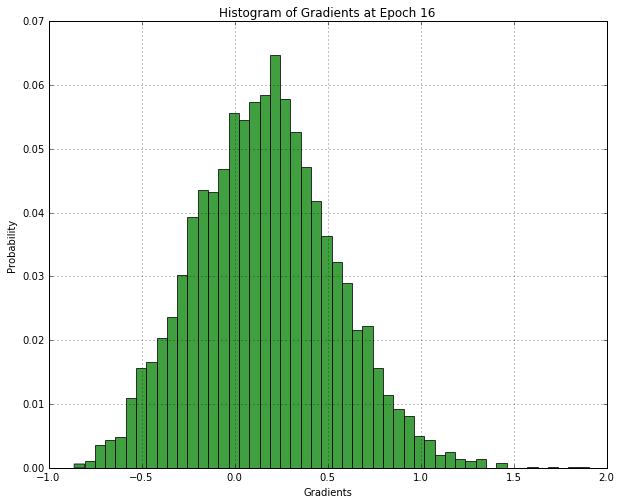

epoch (17 / 24) gain: 158.446951 train acc: 0.984000 val acc: 0.972500 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4810/5000


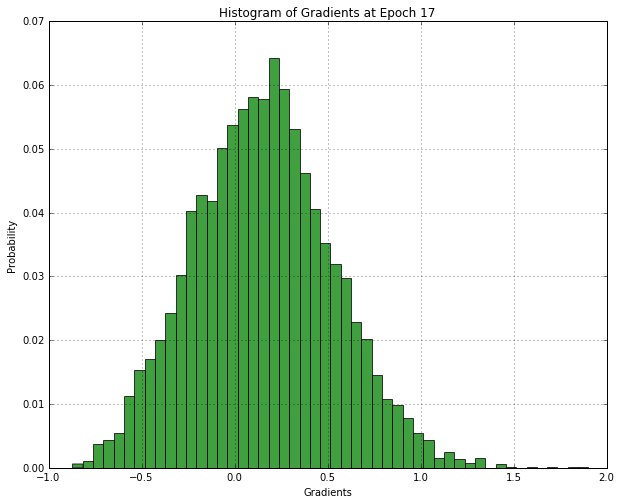

epoch (18 / 24) gain: 162.812199 train acc: 0.985000 val acc: 0.972500 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4796/5000


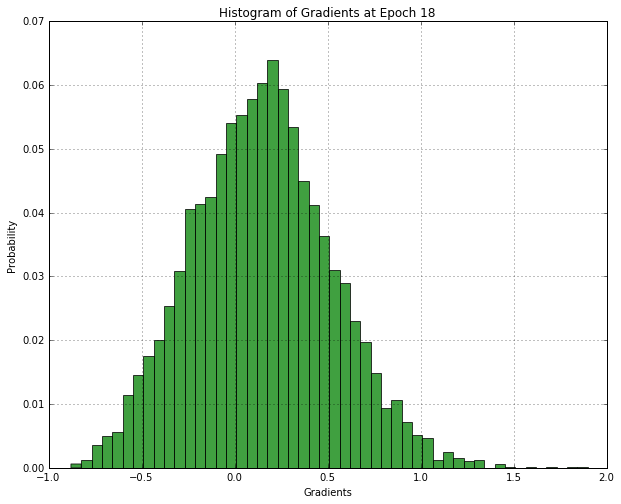

epoch (19 / 24) gain: 167.022674 train acc: 0.985600 val acc: 0.975000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4773/5000


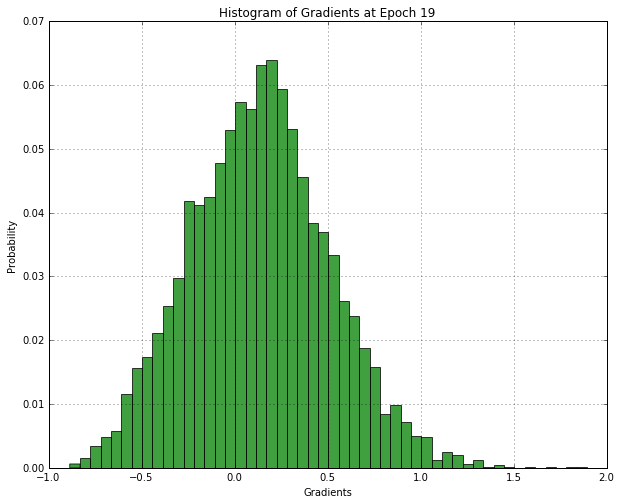

epoch (20 / 24) gain: 171.089432 train acc: 0.986200 val acc: 0.975000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4755/5000


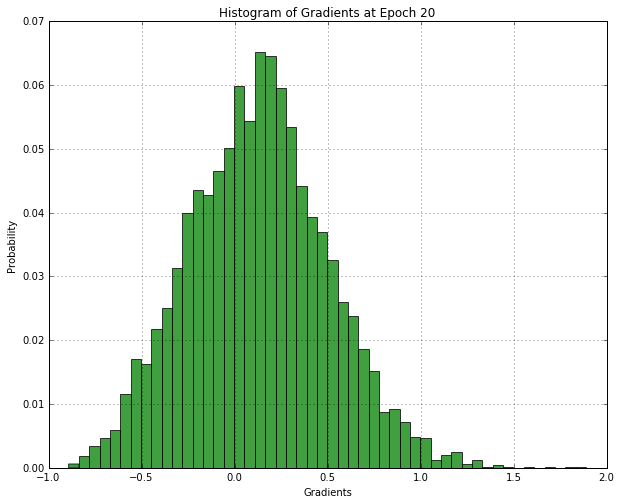

epoch (21 / 24) gain: 175.019537 train acc: 0.986800 val acc: 0.975000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4746/5000


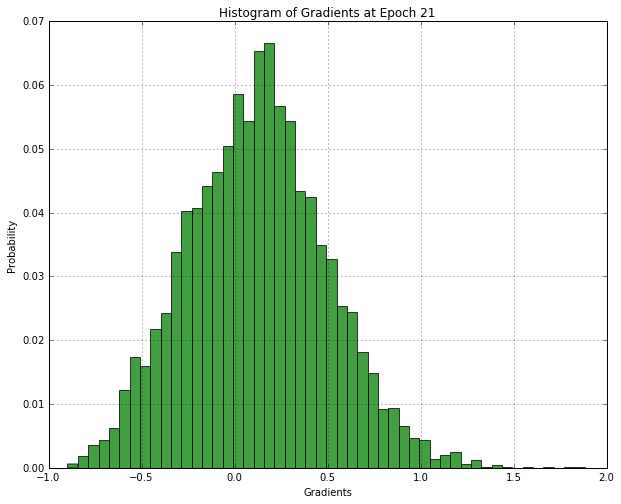

epoch (22 / 24) gain: 178.822307 train acc: 0.988200 val acc: 0.975000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4740/5000


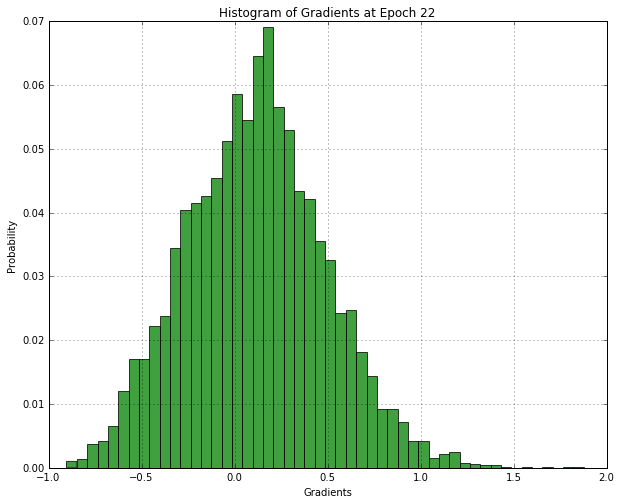

epoch (23 / 24) gain: 182.507851 train acc: 0.988800 val acc: 0.975000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4714/5000


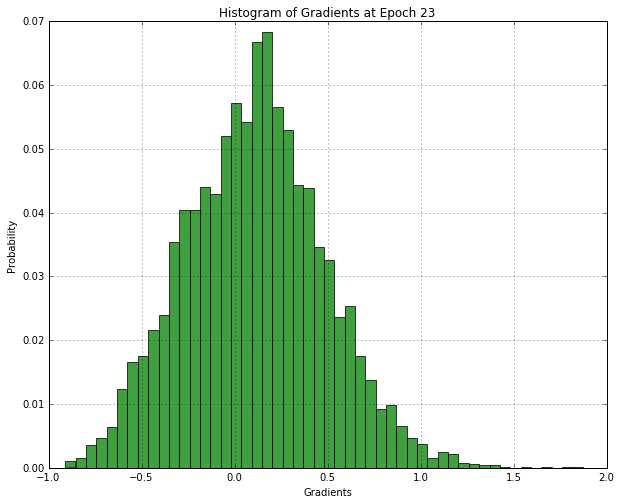

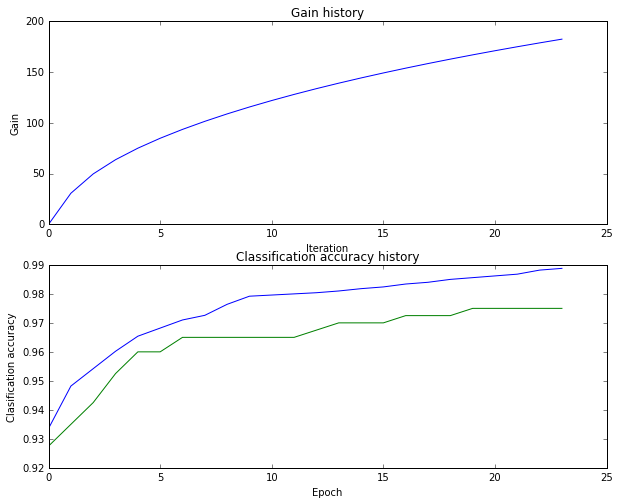

binary training accuracy for digit 2: 0.988800
binary validation accuracy for digit 2: 0.975000
best binary training accuracy for digit 2: 0.988800
best binary validation accuracy for digit 2: 0.975000

Training digit 3...

Pre-calculating kernel...
epoch (0 / 24) gain: 0.000000 train acc: 0.896800 val acc: 0.910000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 5000/5000


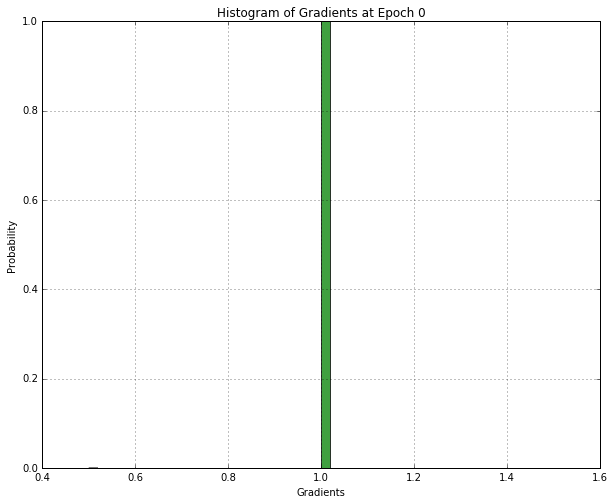

epoch (1 / 24) gain: 25.263871 train acc: 0.914000 val acc: 0.927500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 5000/5000


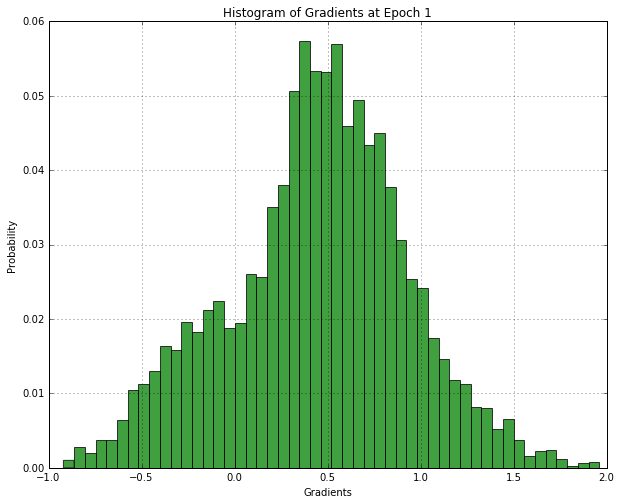

epoch (2 / 24) gain: 37.595500 train acc: 0.926200 val acc: 0.930000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 5000/5000


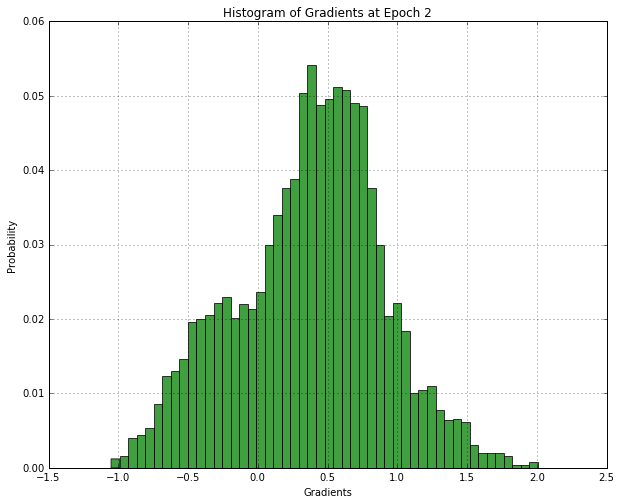

epoch (3 / 24) gain: 48.126423 train acc: 0.935600 val acc: 0.937500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4998/5000


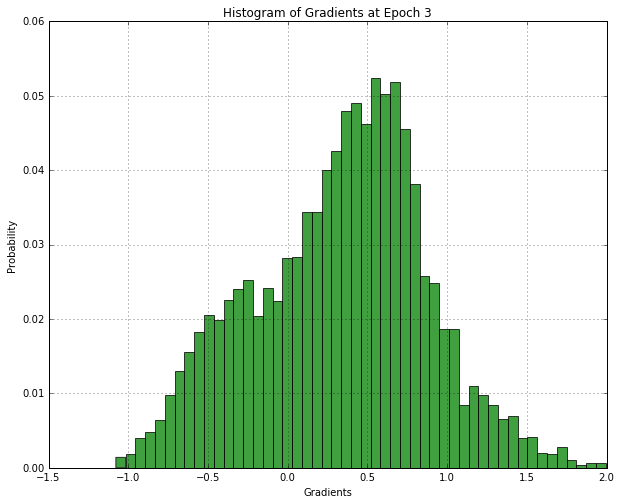

epoch (4 / 24) gain: 57.401250 train acc: 0.940200 val acc: 0.937500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4986/5000


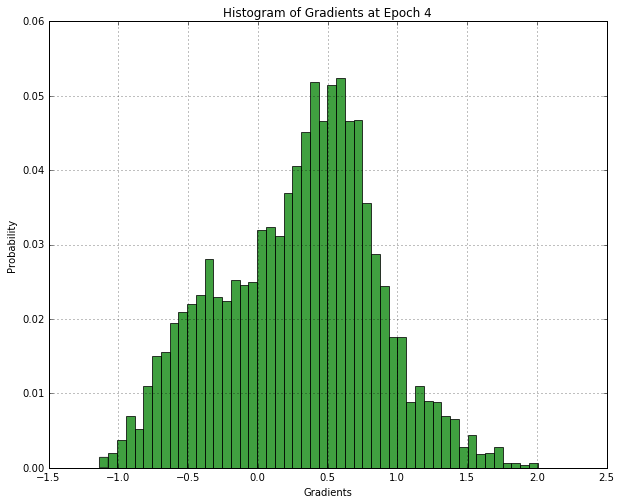

epoch (5 / 24) gain: 65.799965 train acc: 0.945000 val acc: 0.940000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4961/5000


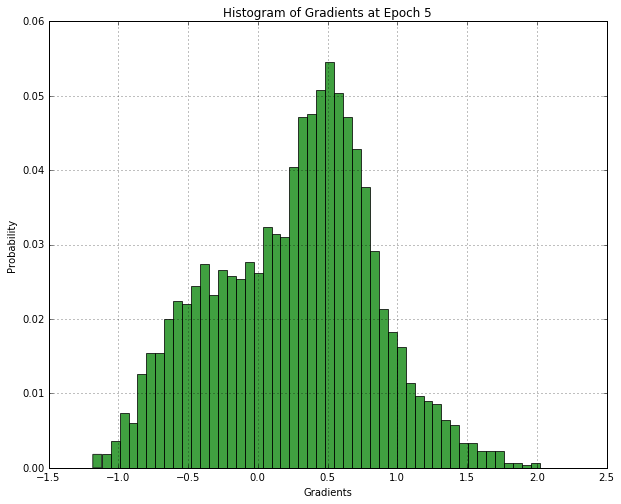

epoch (6 / 24) gain: 73.535940 train acc: 0.949800 val acc: 0.945000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4924/5000


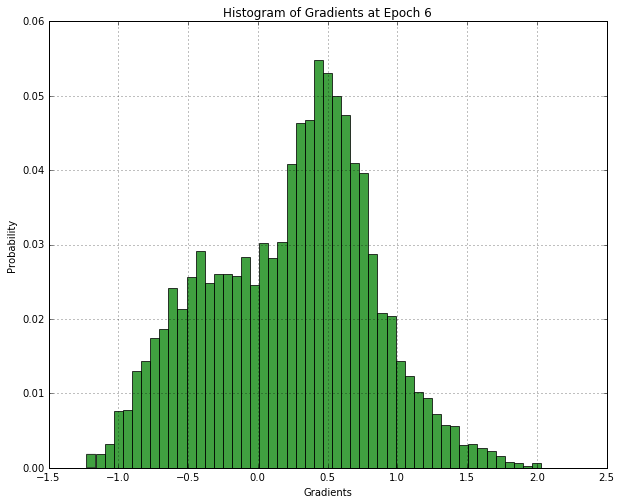

epoch (7 / 24) gain: 80.740334 train acc: 0.952400 val acc: 0.950000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4897/5000


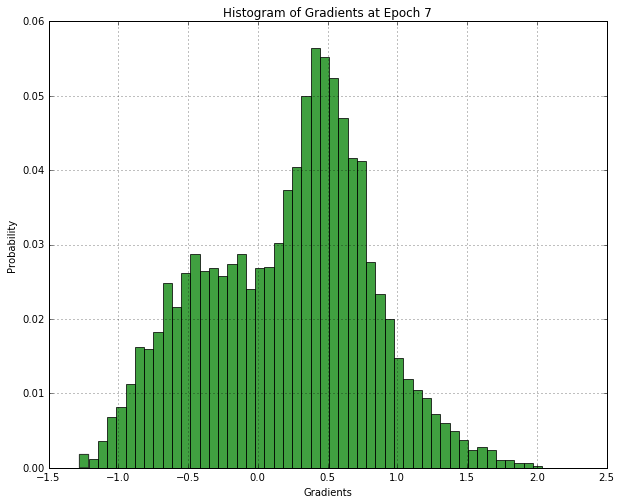

epoch (8 / 24) gain: 87.503861 train acc: 0.955400 val acc: 0.955000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4859/5000


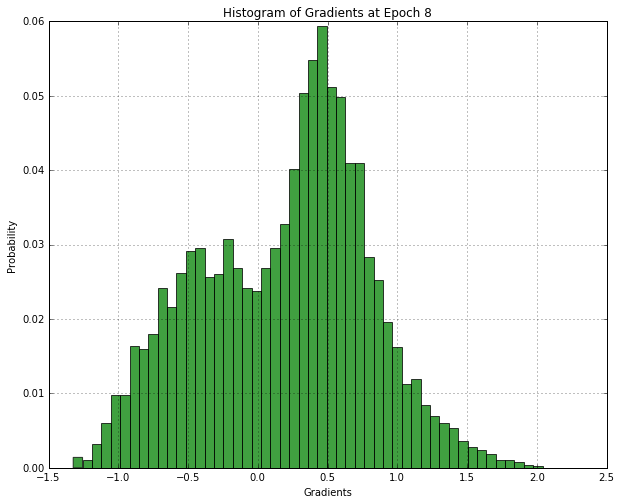

epoch (9 / 24) gain: 93.891445 train acc: 0.957200 val acc: 0.957500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4835/5000


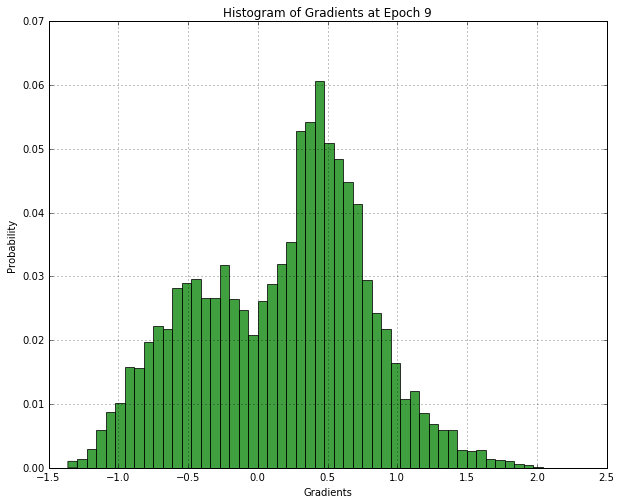

epoch (10 / 24) gain: 99.963168 train acc: 0.959200 val acc: 0.955000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4805/5000


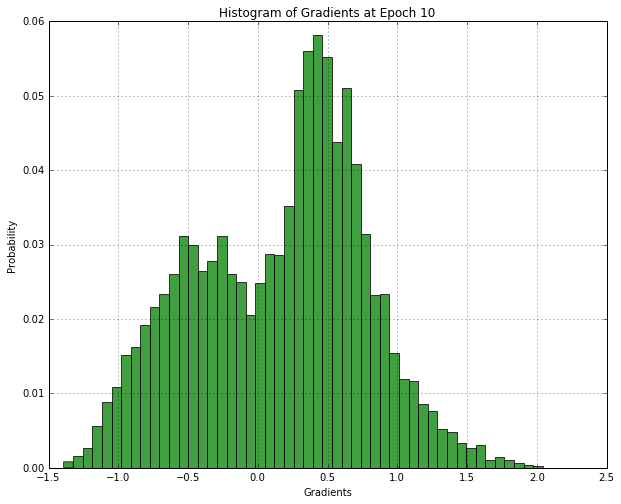

epoch (11 / 24) gain: 105.755847 train acc: 0.960600 val acc: 0.957500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4769/5000


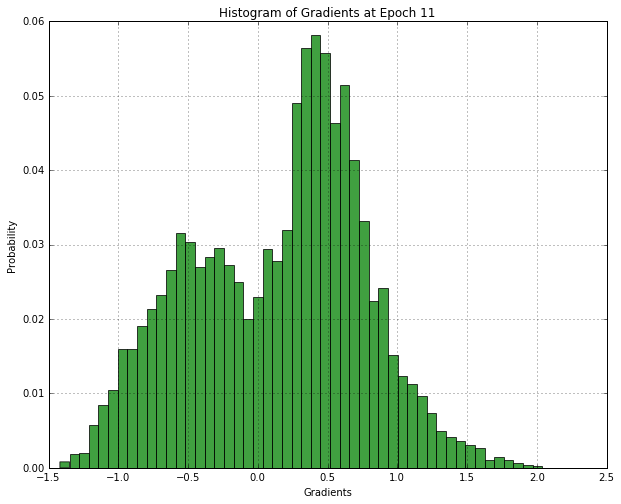

epoch (12 / 24) gain: 111.301363 train acc: 0.961400 val acc: 0.960000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4748/5000


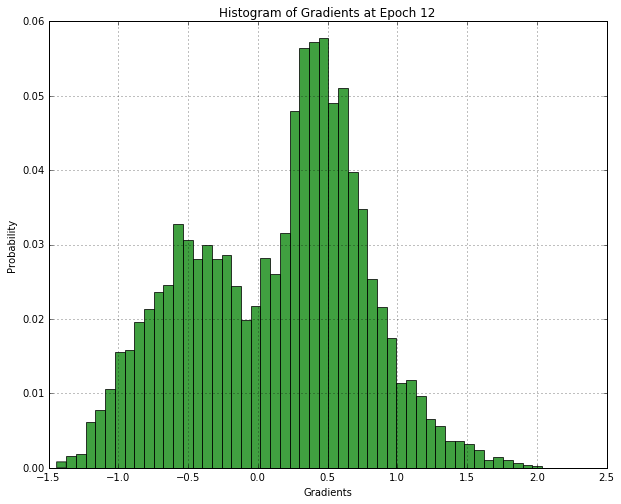

epoch (13 / 24) gain: 116.624431 train acc: 0.962800 val acc: 0.960000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4717/5000


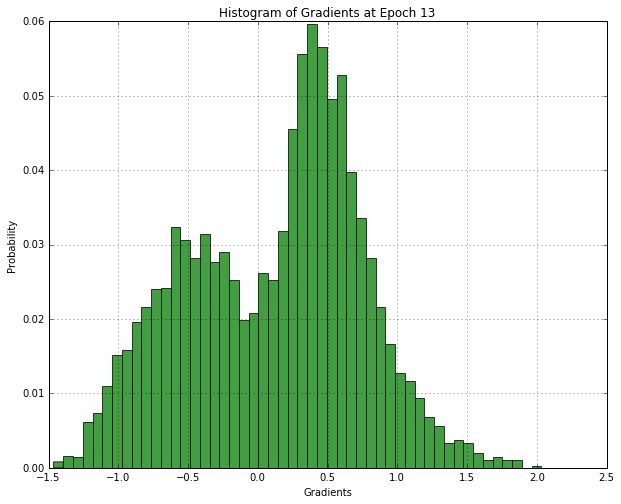

epoch (14 / 24) gain: 121.741082 train acc: 0.964600 val acc: 0.960000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4691/5000


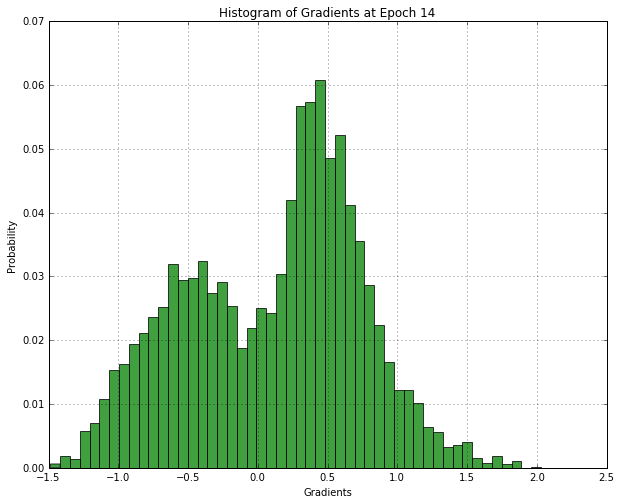

epoch (15 / 24) gain: 126.672650 train acc: 0.965800 val acc: 0.960000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4671/5000


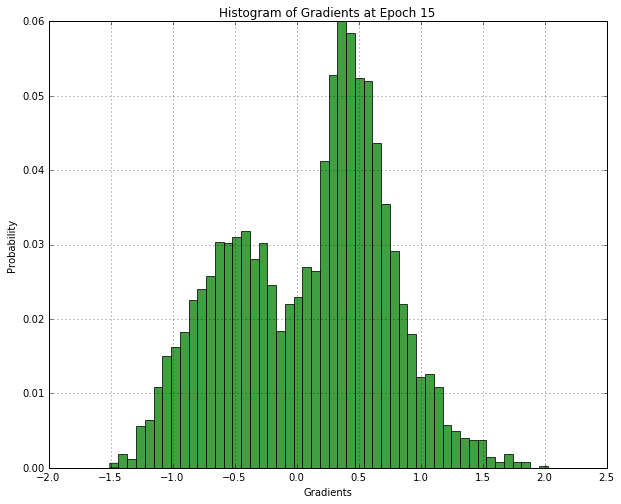

epoch (16 / 24) gain: 131.435606 train acc: 0.967800 val acc: 0.962500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4648/5000


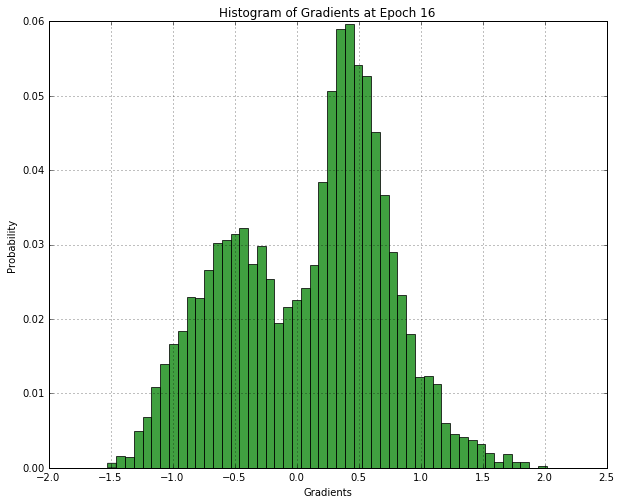

epoch (17 / 24) gain: 136.043663 train acc: 0.968800 val acc: 0.962500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4618/5000


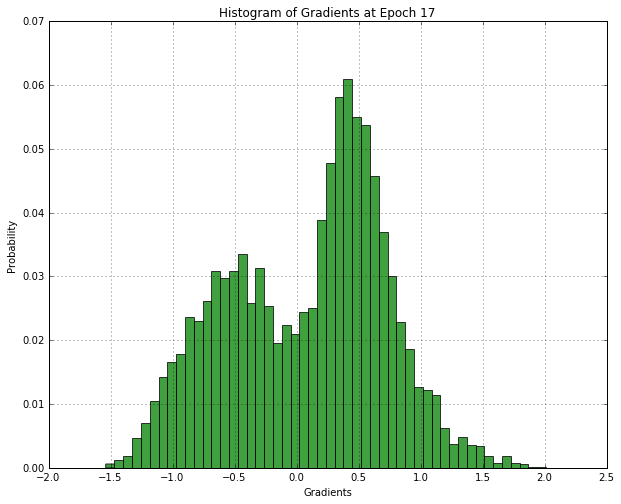

epoch (18 / 24) gain: 140.506708 train acc: 0.969600 val acc: 0.962500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4593/5000


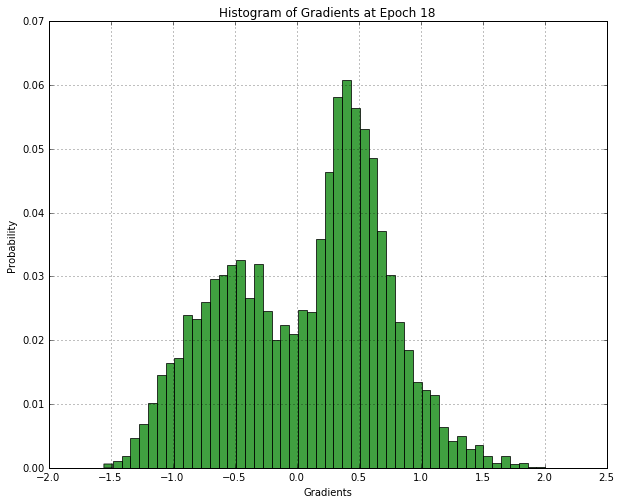

epoch (19 / 24) gain: 144.838073 train acc: 0.971200 val acc: 0.960000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4570/5000


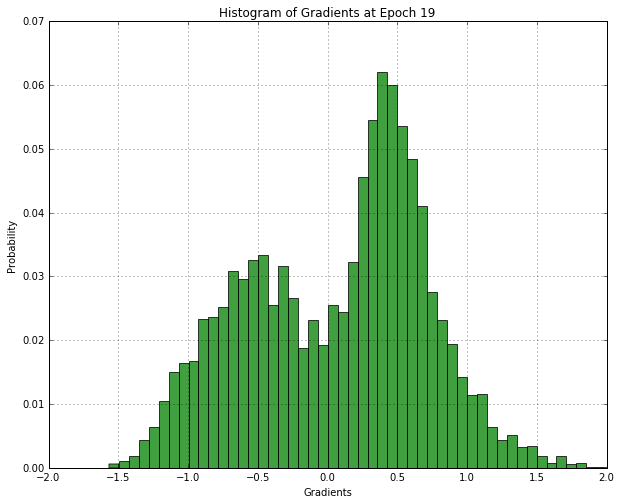

epoch (20 / 24) gain: 149.041283 train acc: 0.972200 val acc: 0.962500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4550/5000


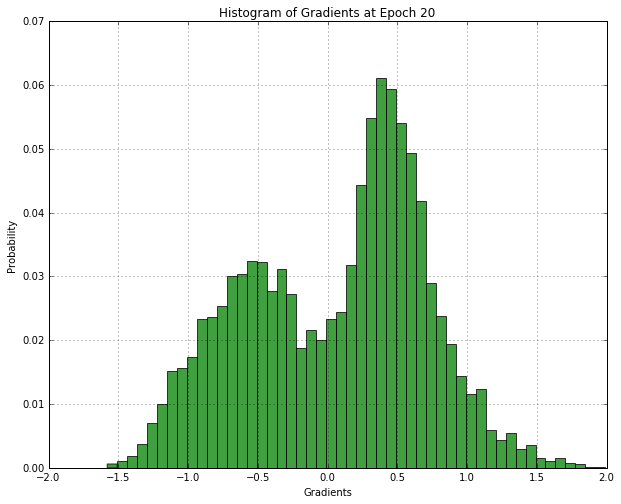

epoch (21 / 24) gain: 153.120950 train acc: 0.972600 val acc: 0.962500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4539/5000


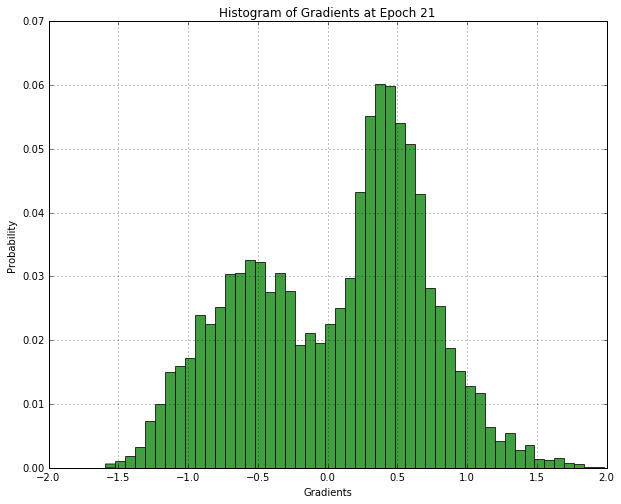

epoch (22 / 24) gain: 157.087678 train acc: 0.973200 val acc: 0.962500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4518/5000


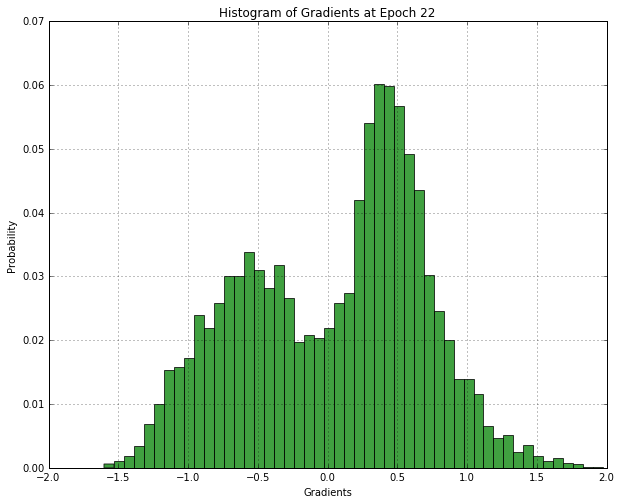

epoch (23 / 24) gain: 160.948129 train acc: 0.973600 val acc: 0.965000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4495/5000


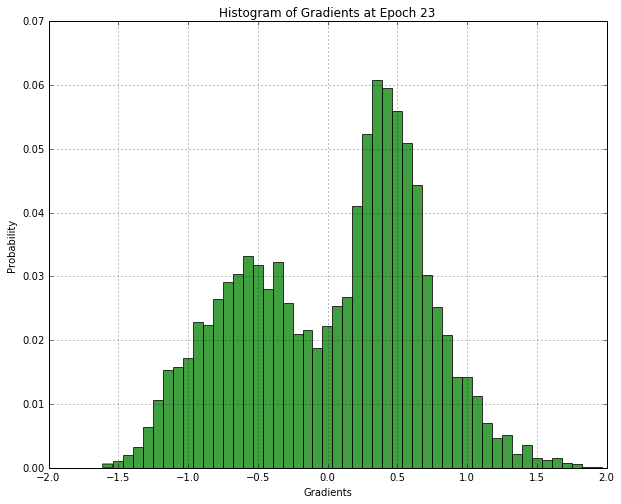

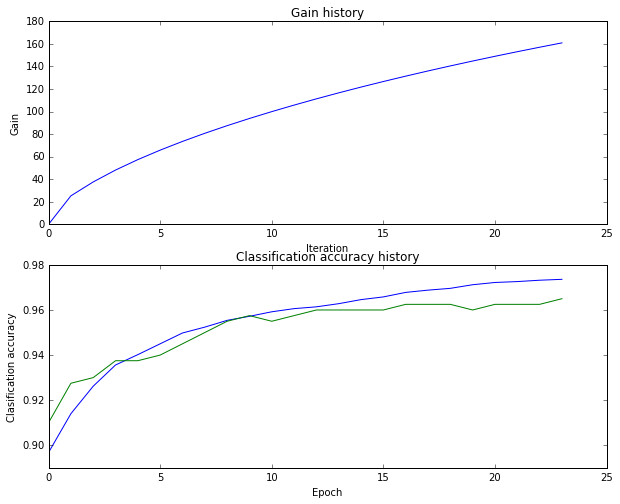

binary training accuracy for digit 3: 0.973600
binary validation accuracy for digit 3: 0.965000
best binary training accuracy for digit 3: 0.973600
best binary validation accuracy for digit 3: 0.965000

Training digit 4...

Pre-calculating kernel...
epoch (0 / 24) gain: 0.000000 train acc: 0.911400 val acc: 0.945000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 5000/5000


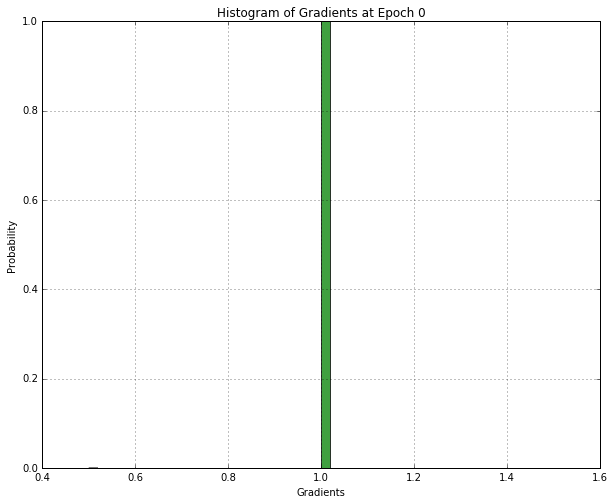

epoch (1 / 24) gain: 28.941315 train acc: 0.924400 val acc: 0.955000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 5000/5000


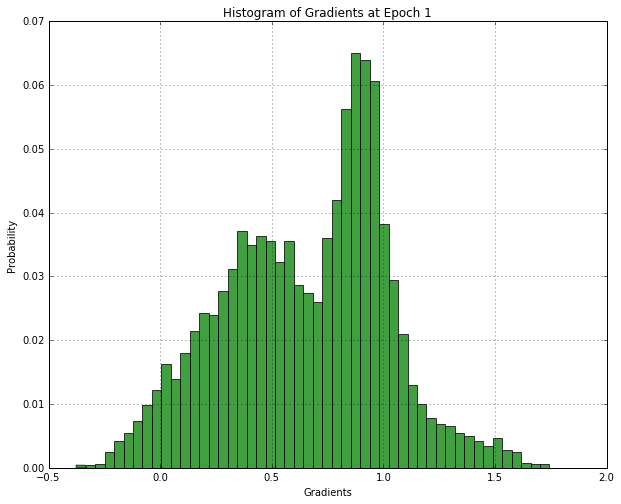

epoch (2 / 24) gain: 44.598655 train acc: 0.936800 val acc: 0.960000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 5000/5000


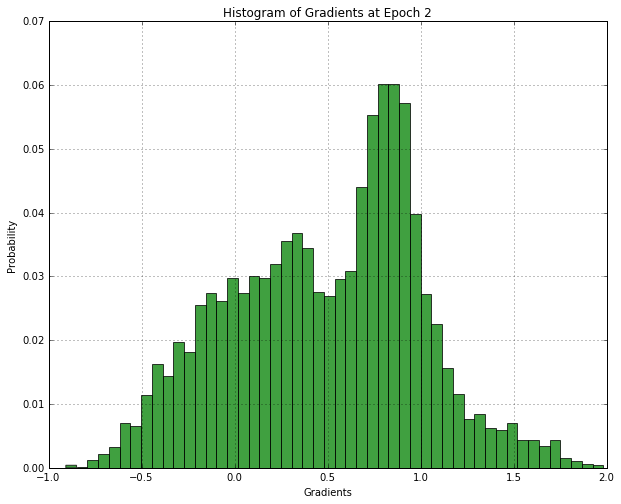

epoch (3 / 24) gain: 56.212384 train acc: 0.946800 val acc: 0.975000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 5000/5000


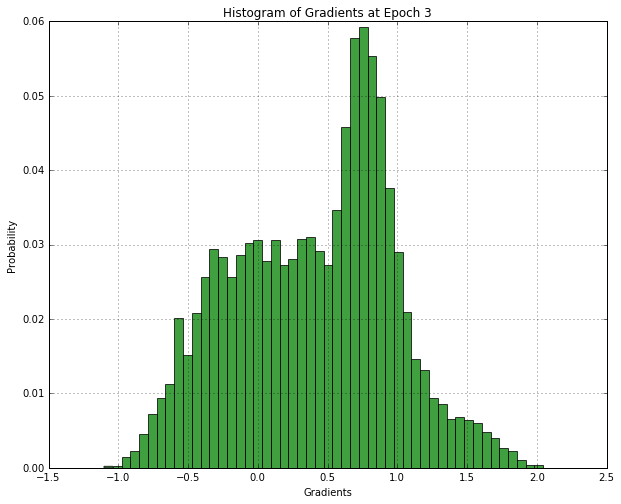

epoch (4 / 24) gain: 65.835583 train acc: 0.955800 val acc: 0.980000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 5000/5000


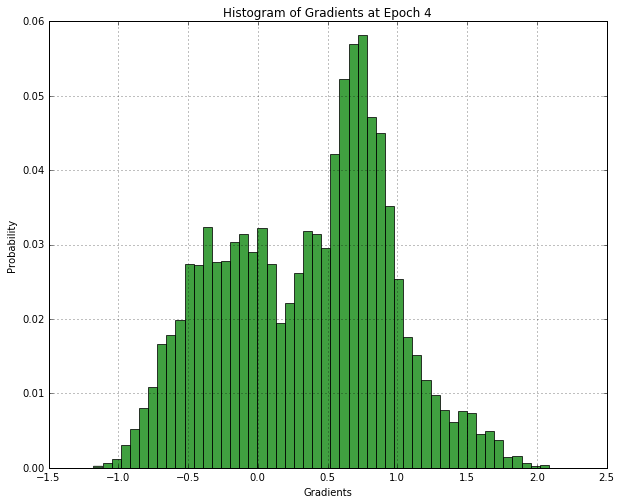

epoch (5 / 24) gain: 74.159908 train acc: 0.962000 val acc: 0.980000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4998/5000


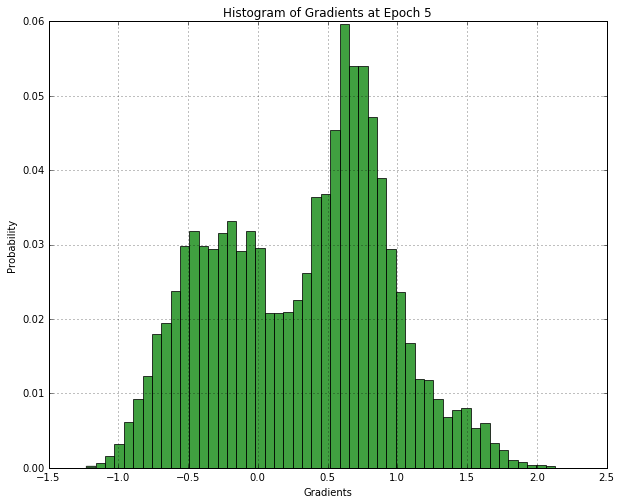

epoch (6 / 24) gain: 81.559579 train acc: 0.967000 val acc: 0.982500 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4988/5000


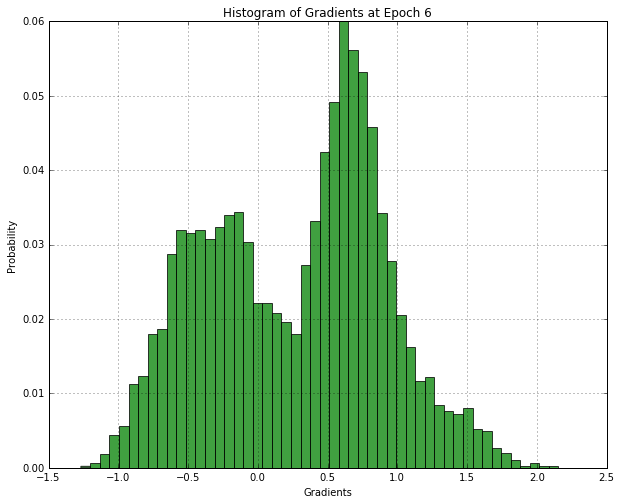

epoch (7 / 24) gain: 88.264117 train acc: 0.970800 val acc: 0.982500 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4983/5000


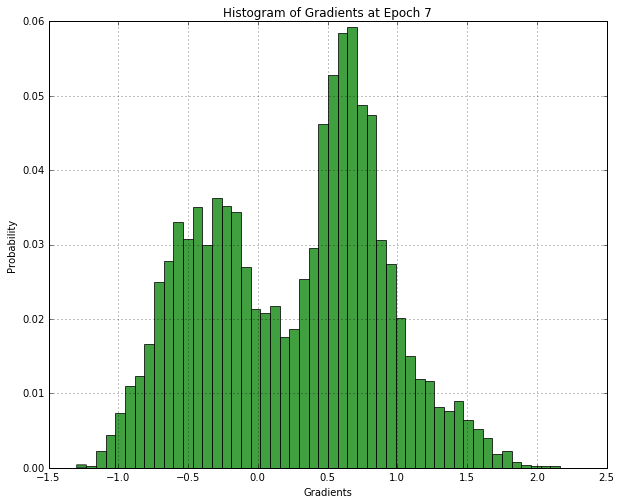

epoch (8 / 24) gain: 94.412232 train acc: 0.975200 val acc: 0.987500 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4971/5000


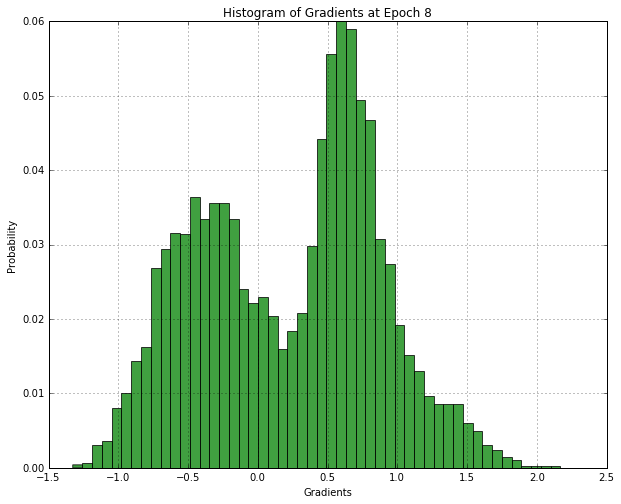

epoch (9 / 24) gain: 100.117422 train acc: 0.976200 val acc: 0.987500 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4961/5000


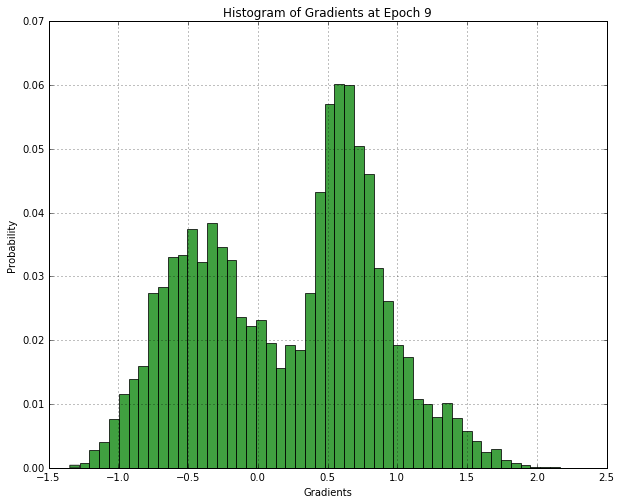

epoch (10 / 24) gain: 105.456643 train acc: 0.977200 val acc: 0.987500 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4944/5000


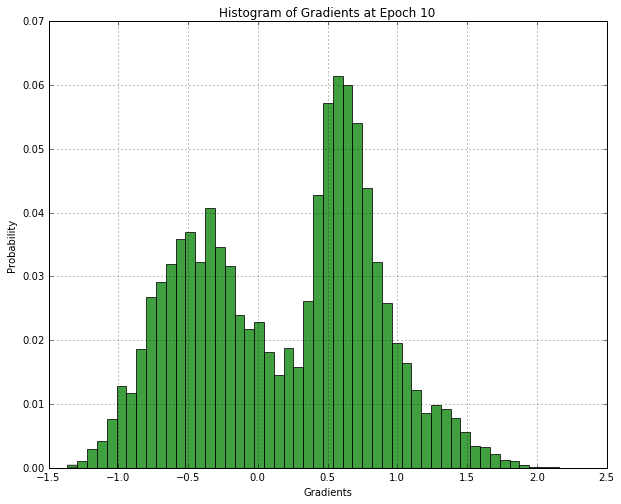

epoch (11 / 24) gain: 110.483214 train acc: 0.978400 val acc: 0.987500 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4924/5000


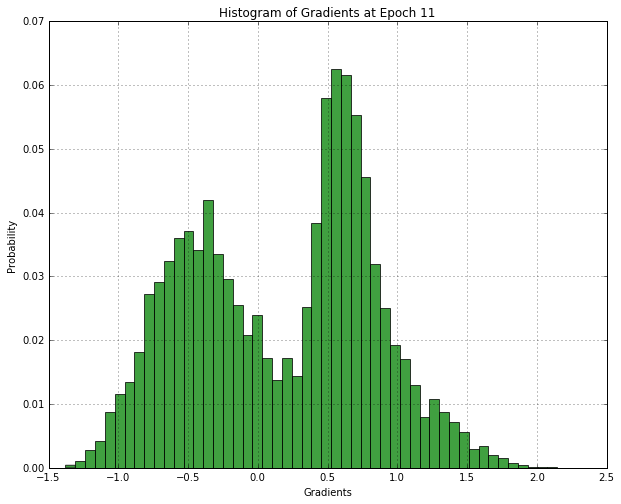

epoch (12 / 24) gain: 115.234757 train acc: 0.979200 val acc: 0.987500 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4908/5000


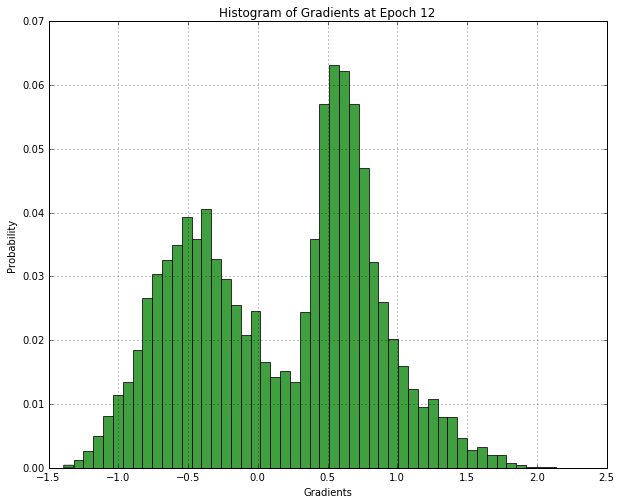

epoch (13 / 24) gain: 119.740637 train acc: 0.980200 val acc: 0.987500 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4882/5000


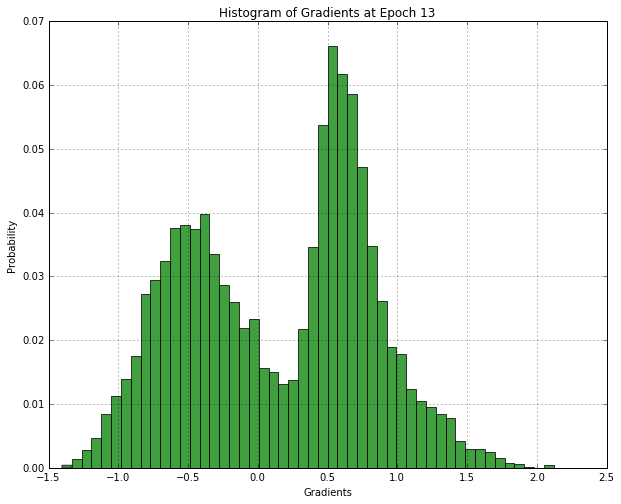

epoch (14 / 24) gain: 124.025064 train acc: 0.981200 val acc: 0.987500 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4850/5000


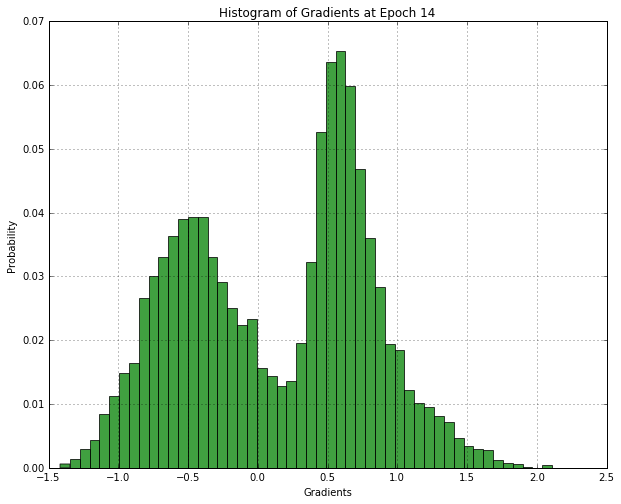

epoch (15 / 24) gain: 128.111318 train acc: 0.983200 val acc: 0.990000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4829/5000


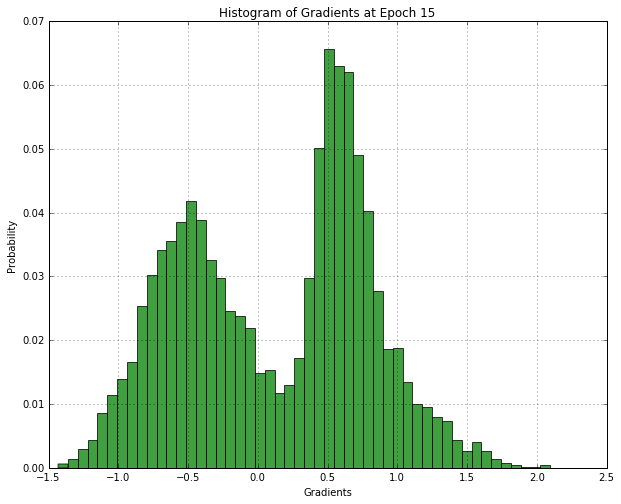

epoch (16 / 24) gain: 132.013523 train acc: 0.984600 val acc: 0.992500 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4811/5000


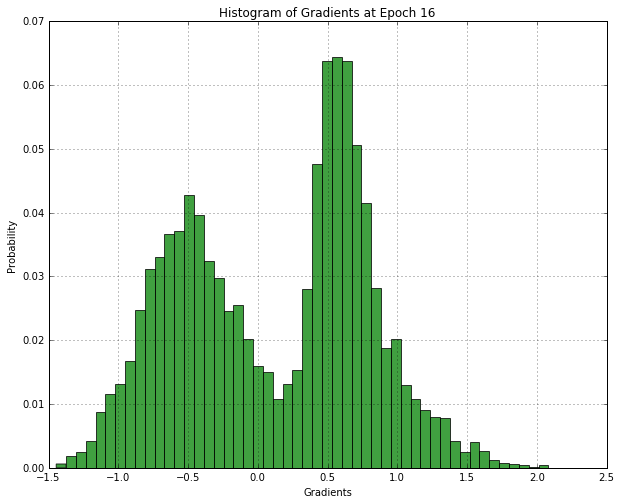

epoch (17 / 24) gain: 135.746171 train acc: 0.985800 val acc: 0.992500 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4793/5000


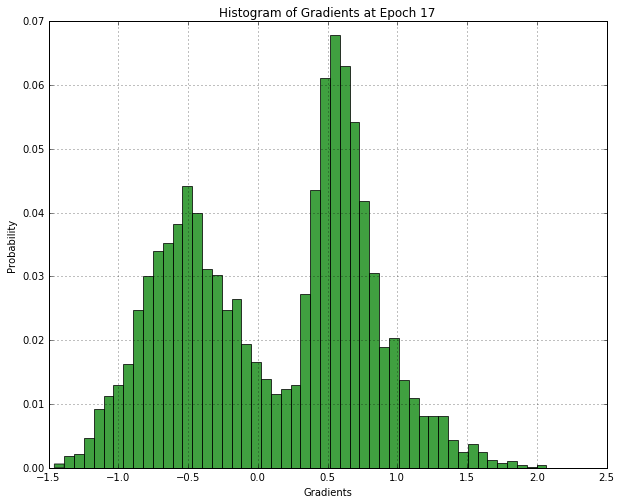

epoch (18 / 24) gain: 139.328771 train acc: 0.987200 val acc: 0.992500 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4773/5000


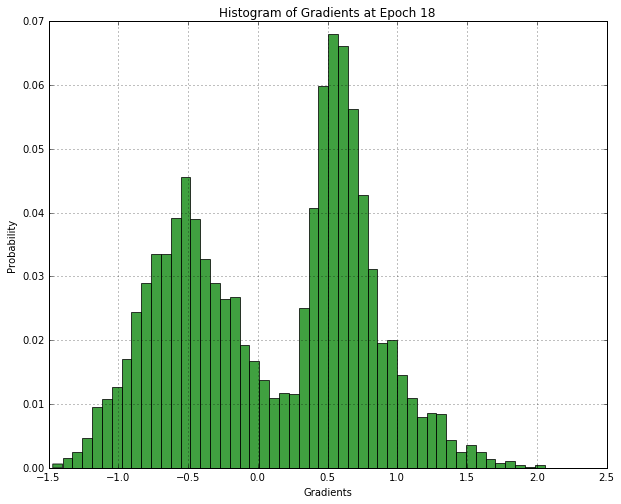

epoch (19 / 24) gain: 142.776273 train acc: 0.987600 val acc: 0.992500 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4751/5000


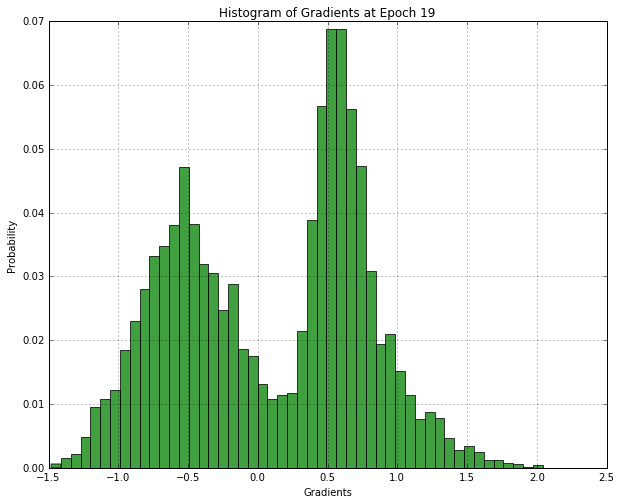

epoch (20 / 24) gain: 146.100630 train acc: 0.988000 val acc: 0.992500 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4736/5000


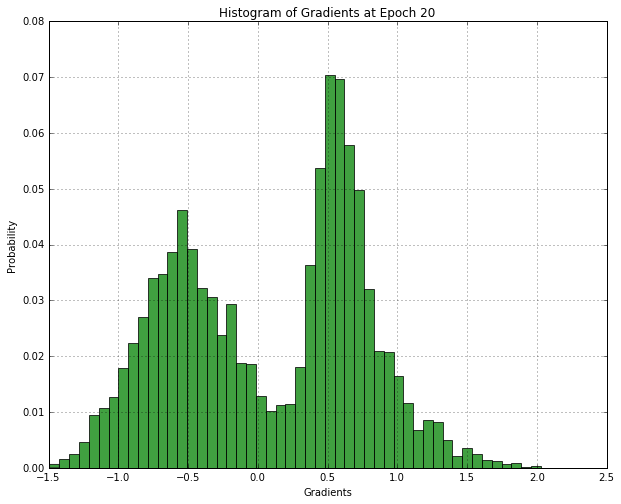

epoch (21 / 24) gain: 149.310778 train acc: 0.989000 val acc: 0.992500 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4718/5000


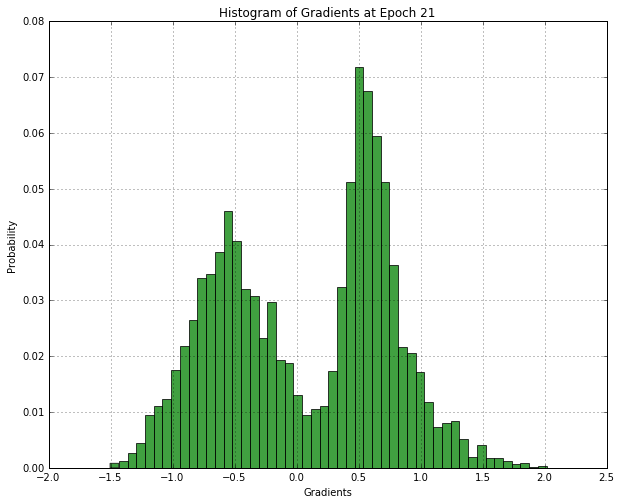

epoch (22 / 24) gain: 152.411602 train acc: 0.989000 val acc: 0.992500 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4692/5000


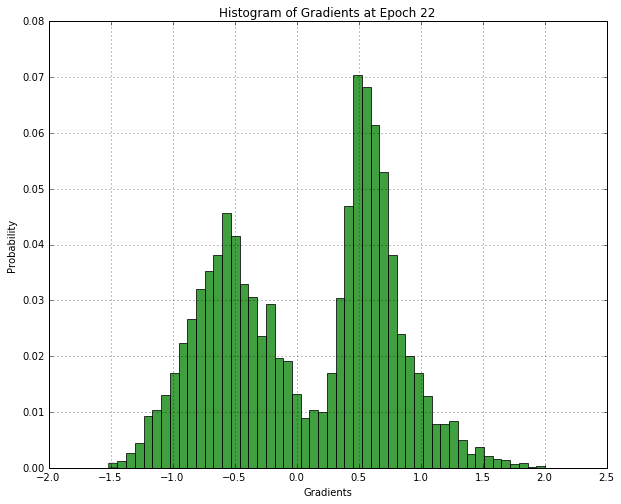

epoch (23 / 24) gain: 155.412784 train acc: 0.989400 val acc: 0.990000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4672/5000


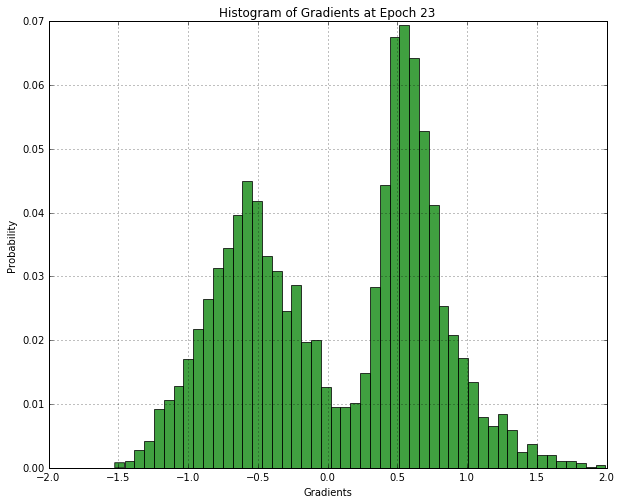

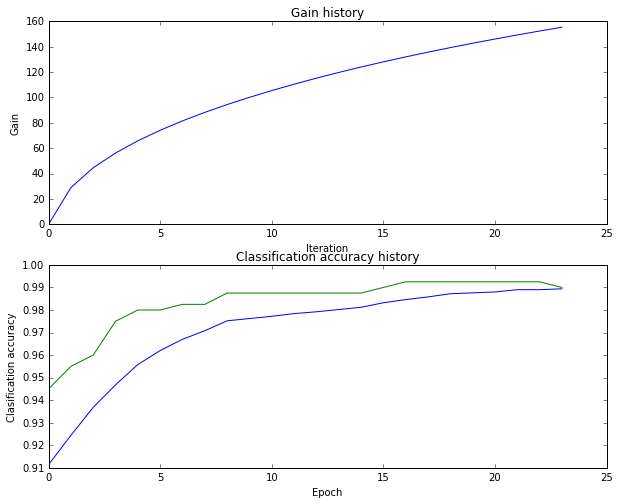

binary training accuracy for digit 4: 0.989400
binary validation accuracy for digit 4: 0.990000
best binary training accuracy for digit 4: 0.989400
best binary validation accuracy for digit 4: 0.990000

Training digit 5...

Pre-calculating kernel...
epoch (0 / 24) gain: 0.000000 train acc: 0.910400 val acc: 0.855000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 5000/5000


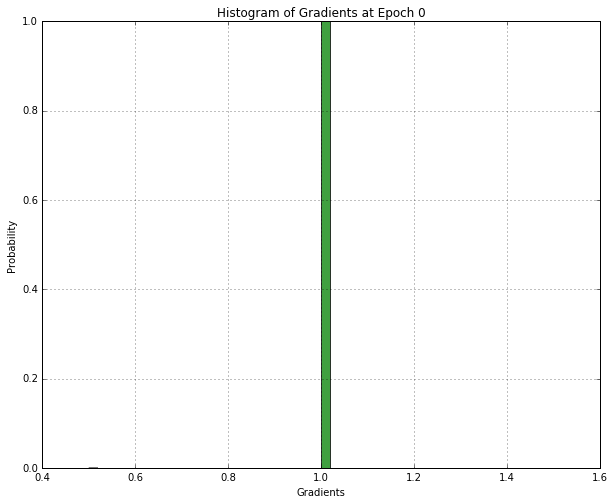

epoch (1 / 24) gain: 28.946182 train acc: 0.934400 val acc: 0.885000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 5000/5000


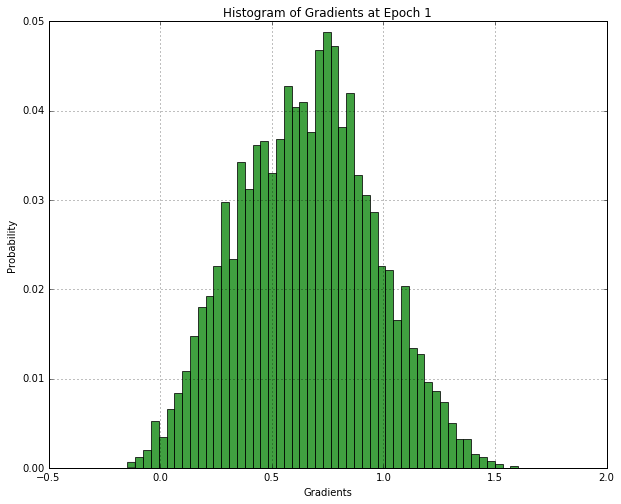

epoch (2 / 24) gain: 44.414967 train acc: 0.946600 val acc: 0.902500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 5000/5000


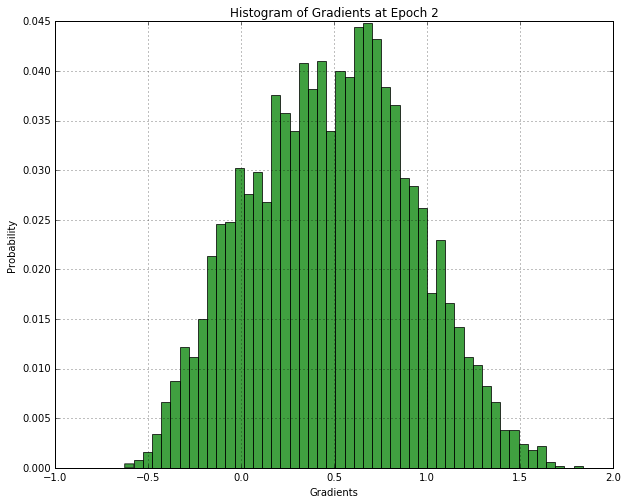

epoch (3 / 24) gain: 55.635831 train acc: 0.955200 val acc: 0.920000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 5000/5000


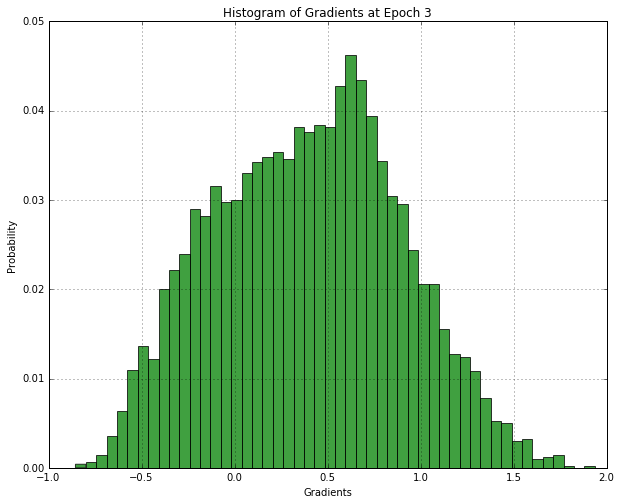

epoch (4 / 24) gain: 64.986908 train acc: 0.960200 val acc: 0.927500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4995/5000


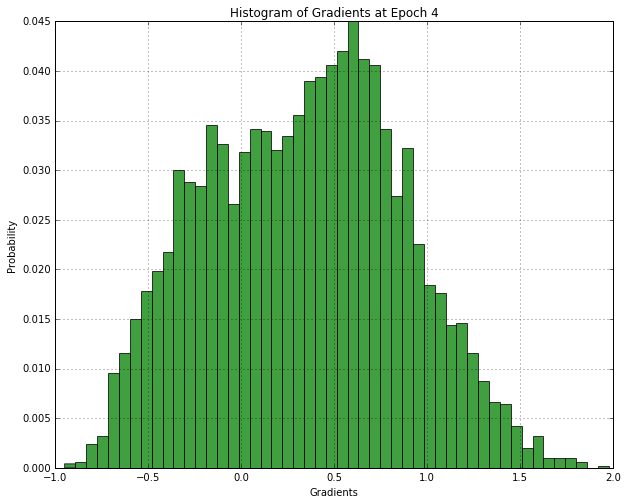

epoch (5 / 24) gain: 73.257749 train acc: 0.965000 val acc: 0.935000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4979/5000


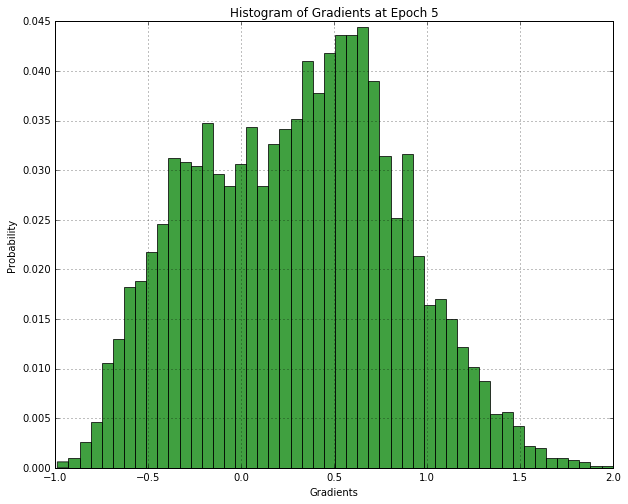

epoch (6 / 24) gain: 80.755373 train acc: 0.969000 val acc: 0.942500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4948/5000


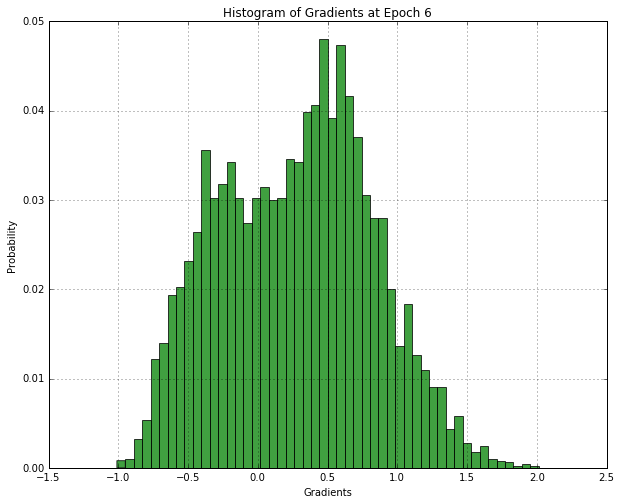

epoch (7 / 24) gain: 87.641112 train acc: 0.971600 val acc: 0.950000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4912/5000


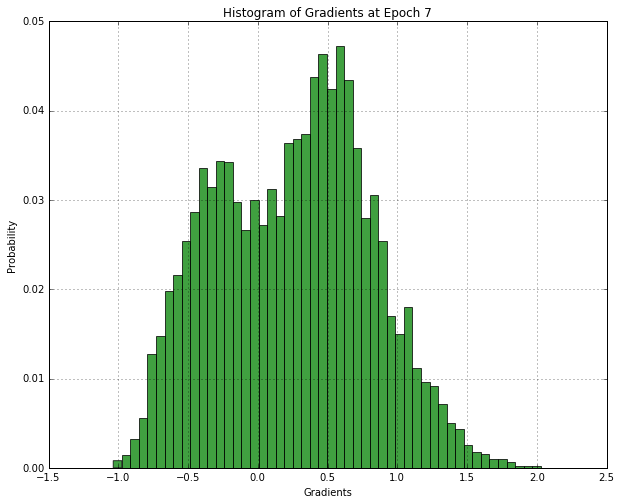

epoch (8 / 24) gain: 94.024137 train acc: 0.971800 val acc: 0.950000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4885/5000


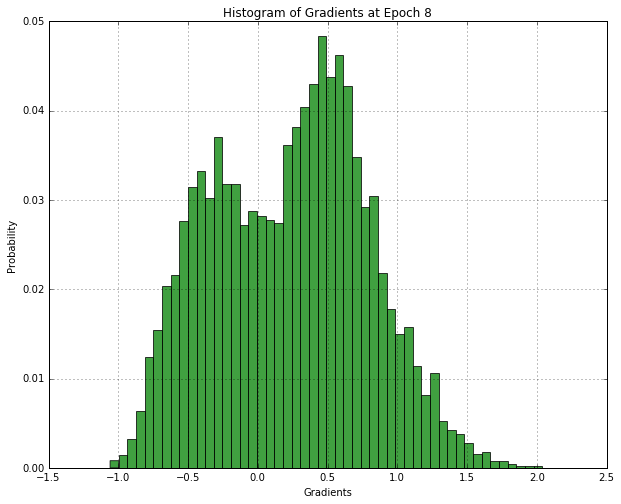

epoch (9 / 24) gain: 99.983846 train acc: 0.974000 val acc: 0.950000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4859/5000


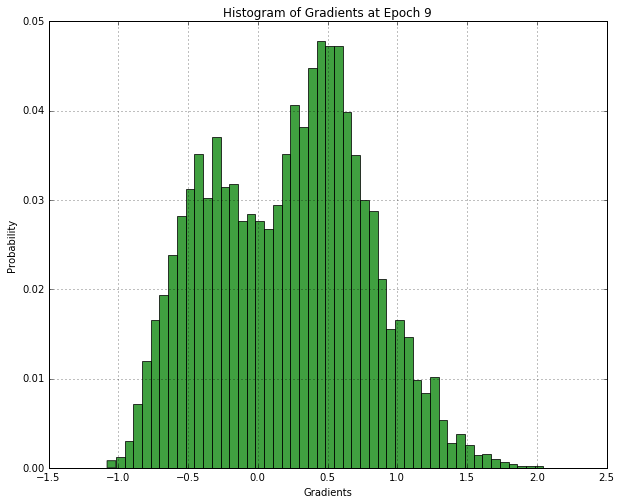

epoch (10 / 24) gain: 105.580770 train acc: 0.976200 val acc: 0.952500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4820/5000


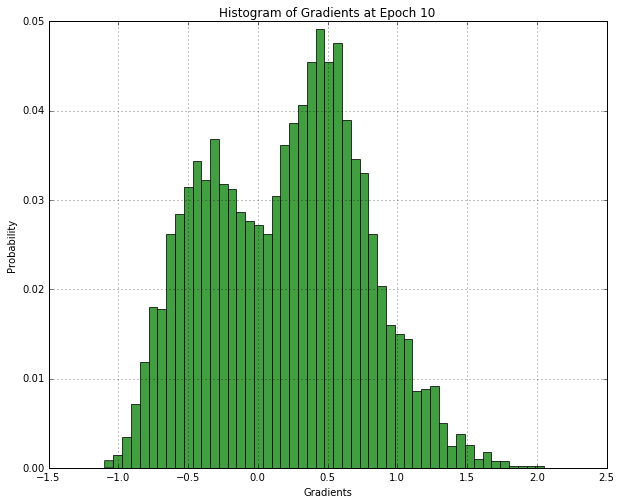

epoch (11 / 24) gain: 110.869855 train acc: 0.977000 val acc: 0.952500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4783/5000


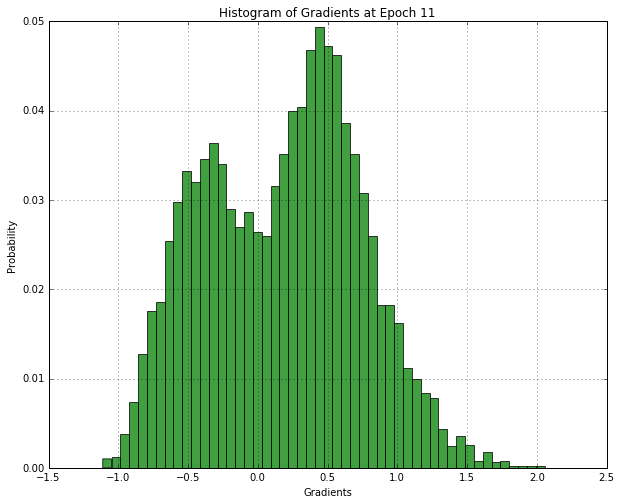

epoch (12 / 24) gain: 115.890632 train acc: 0.978400 val acc: 0.952500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4756/5000


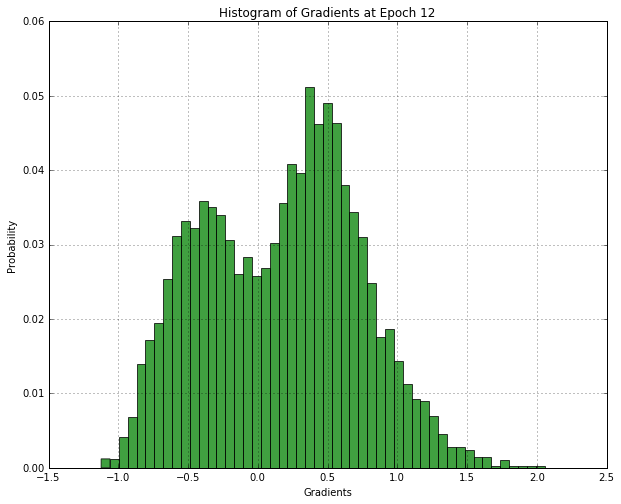

epoch (13 / 24) gain: 120.669025 train acc: 0.979400 val acc: 0.952500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4727/5000


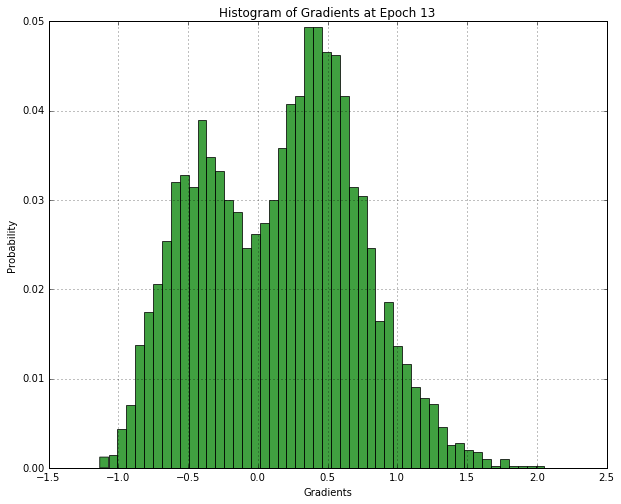

epoch (14 / 24) gain: 125.236757 train acc: 0.981400 val acc: 0.952500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4704/5000


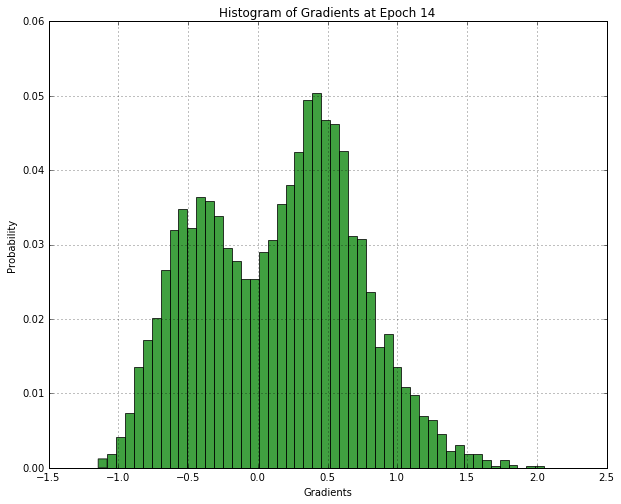

epoch (15 / 24) gain: 129.614649 train acc: 0.982000 val acc: 0.952500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4685/5000


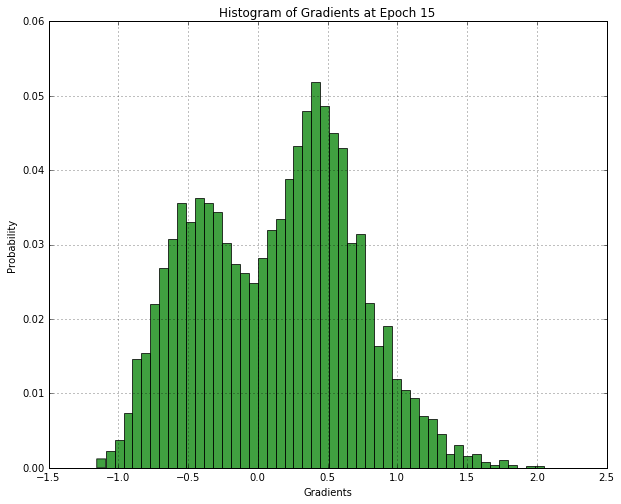

epoch (16 / 24) gain: 133.819354 train acc: 0.982800 val acc: 0.952500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4654/5000


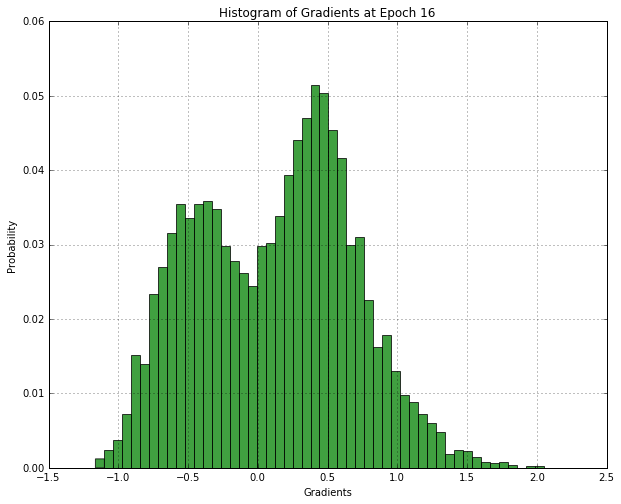

epoch (17 / 24) gain: 137.871184 train acc: 0.983600 val acc: 0.955000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4629/5000


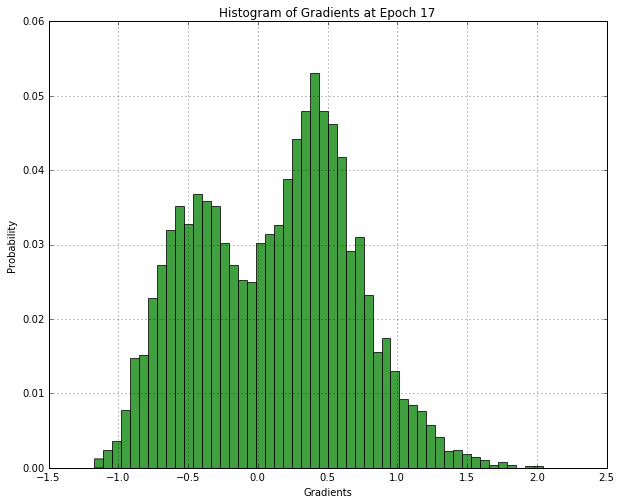

epoch (18 / 24) gain: 141.781079 train acc: 0.984200 val acc: 0.955000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4604/5000


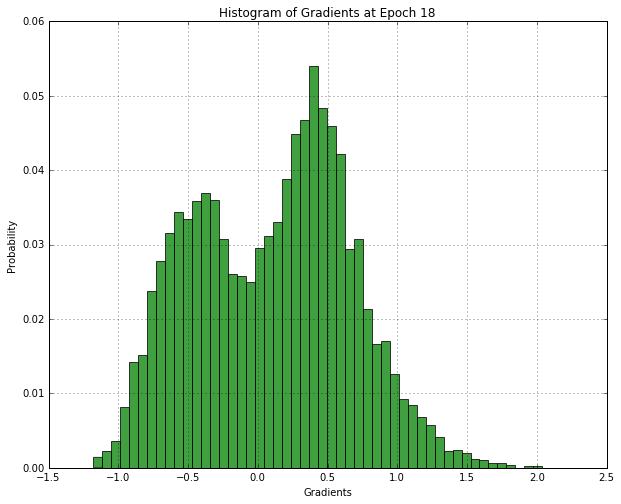

epoch (19 / 24) gain: 145.557288 train acc: 0.984800 val acc: 0.955000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4584/5000


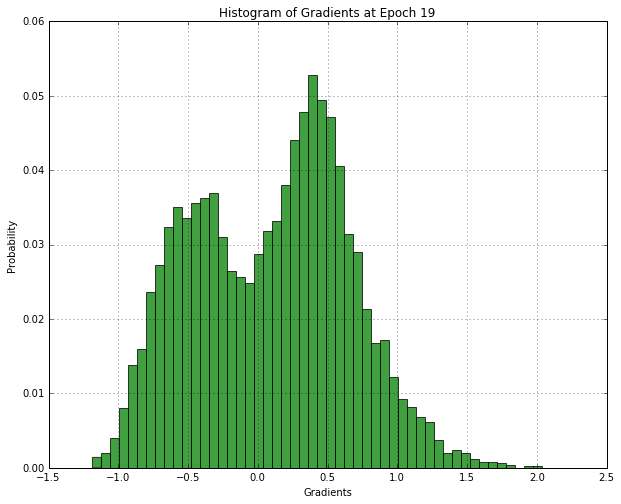

epoch (20 / 24) gain: 149.210103 train acc: 0.985000 val acc: 0.955000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4561/5000


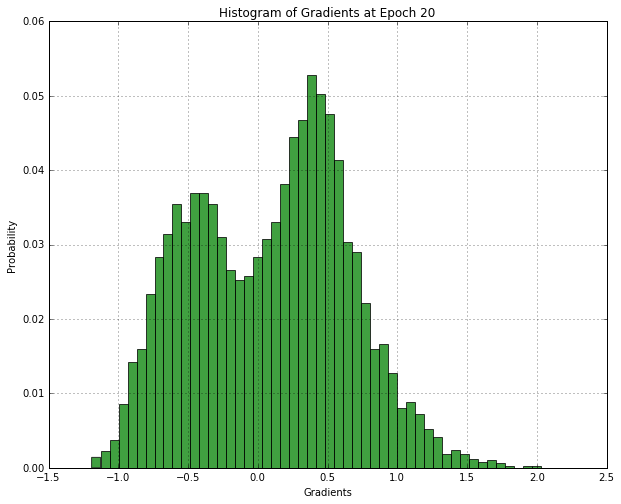

epoch (21 / 24) gain: 152.747242 train acc: 0.985400 val acc: 0.955000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4545/5000


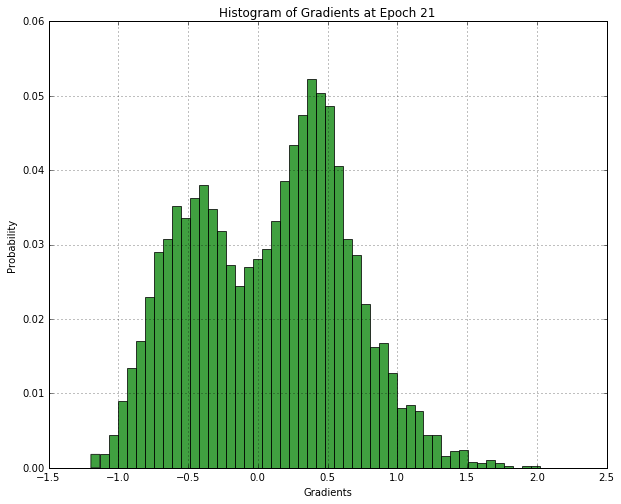

epoch (22 / 24) gain: 156.174617 train acc: 0.985600 val acc: 0.960000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4522/5000


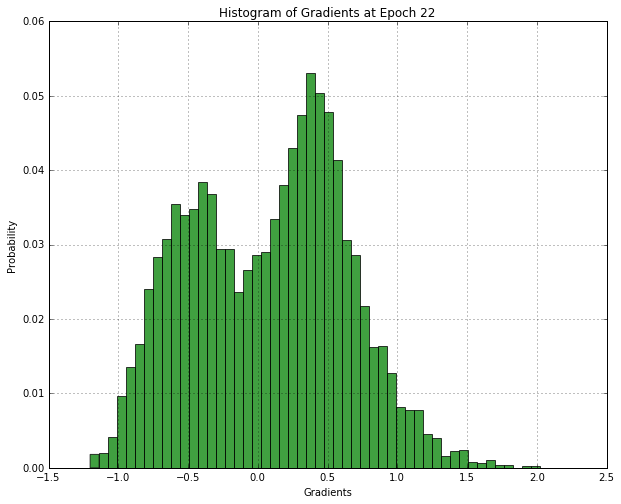

epoch (23 / 24) gain: 159.498725 train acc: 0.986200 val acc: 0.960000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4498/5000


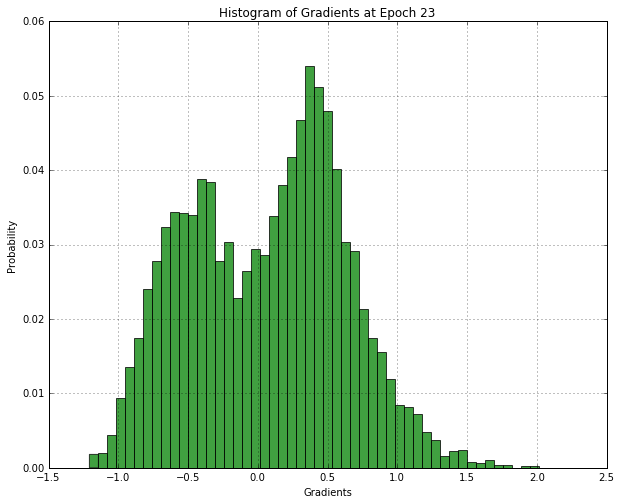

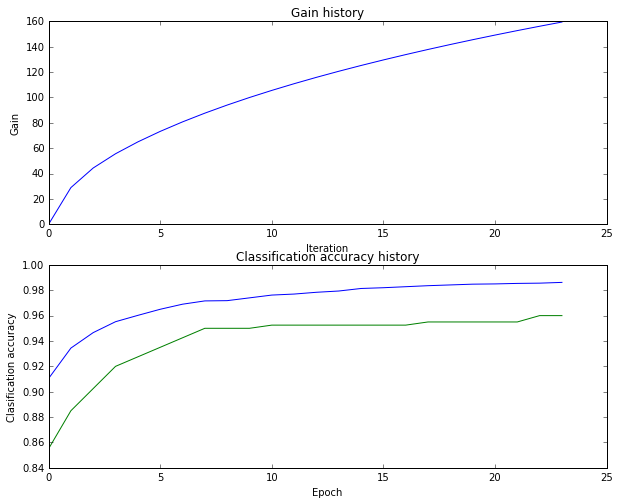

binary training accuracy for digit 5: 0.986200
binary validation accuracy for digit 5: 0.960000
best binary training accuracy for digit 5: 0.986200
best binary validation accuracy for digit 5: 0.960000

Training digit 6...

Pre-calculating kernel...
epoch (0 / 24) gain: 0.000000 train acc: 0.935200 val acc: 0.925000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 5000/5000


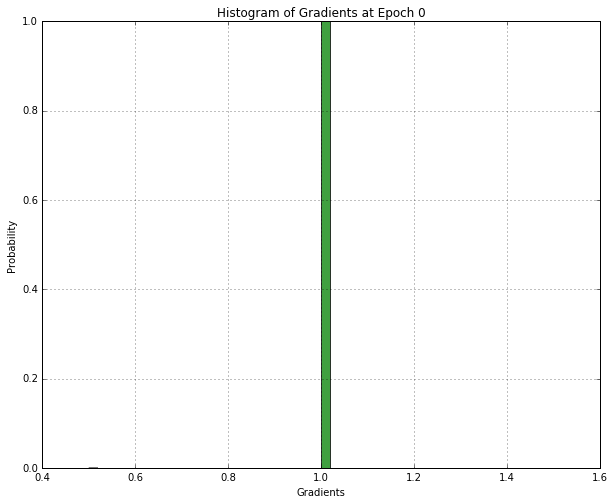

epoch (1 / 24) gain: 26.695130 train acc: 0.952800 val acc: 0.942500 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 5000/5000


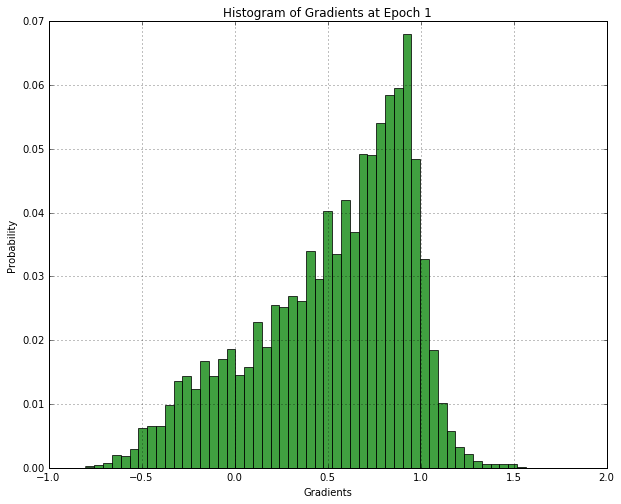

epoch (2 / 24) gain: 38.629460 train acc: 0.962800 val acc: 0.952500 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 5000/5000


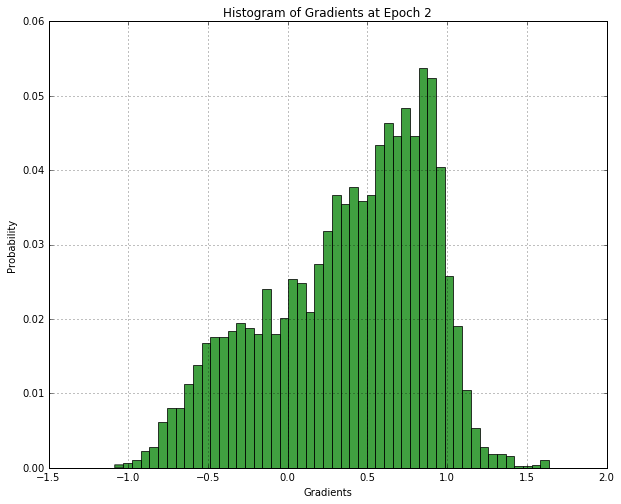

epoch (3 / 24) gain: 47.542790 train acc: 0.968200 val acc: 0.970000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 5000/5000


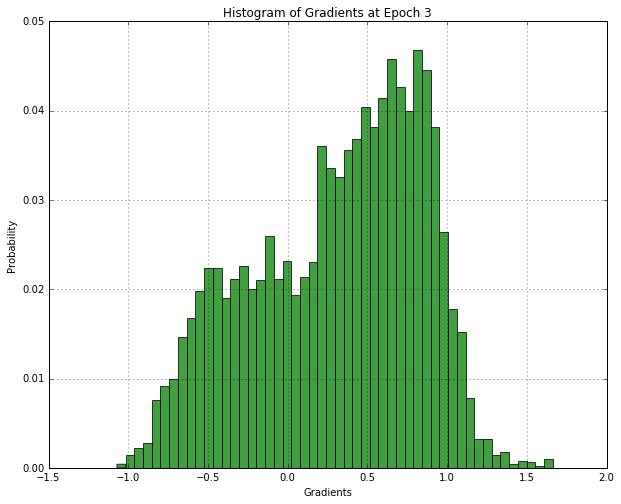

epoch (4 / 24) gain: 54.832773 train acc: 0.971200 val acc: 0.970000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4999/5000


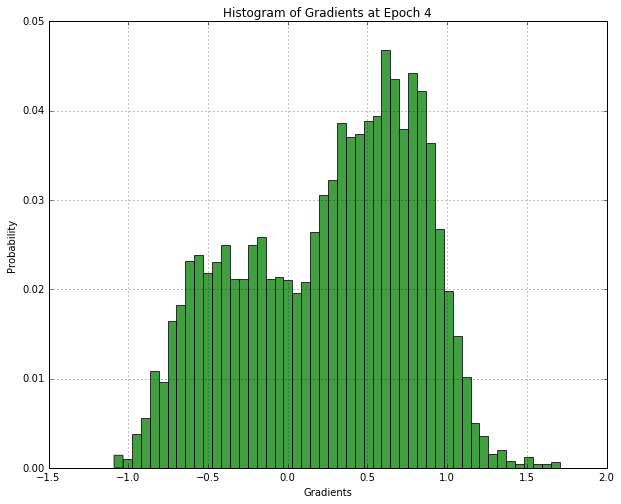

epoch (5 / 24) gain: 61.096798 train acc: 0.973000 val acc: 0.970000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4989/5000


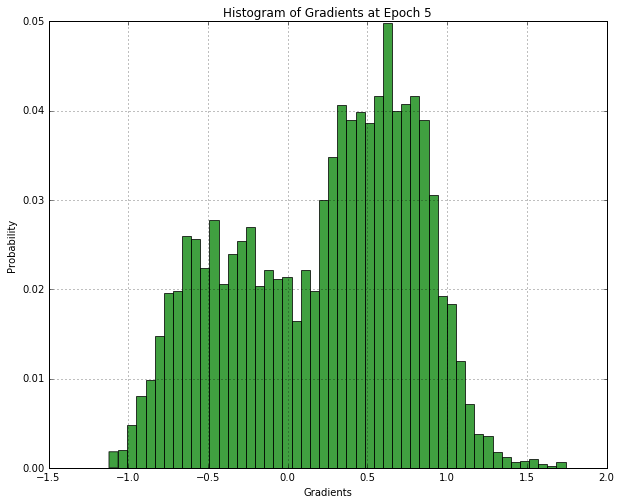

epoch (6 / 24) gain: 66.643114 train acc: 0.975200 val acc: 0.975000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4971/5000


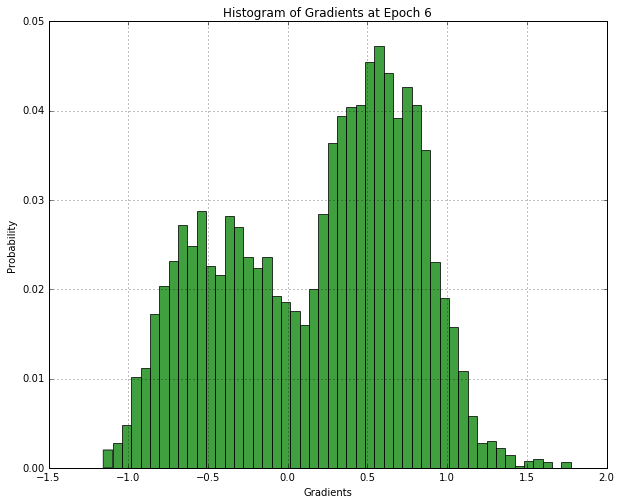

epoch (7 / 24) gain: 71.657366 train acc: 0.976600 val acc: 0.975000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4947/5000


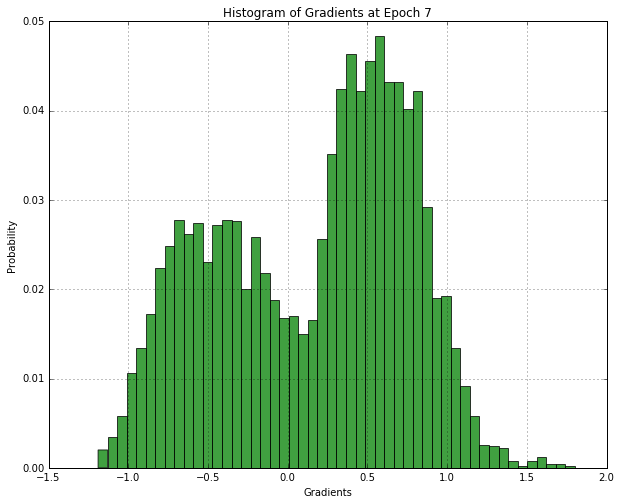

epoch (8 / 24) gain: 76.245814 train acc: 0.978000 val acc: 0.975000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4920/5000


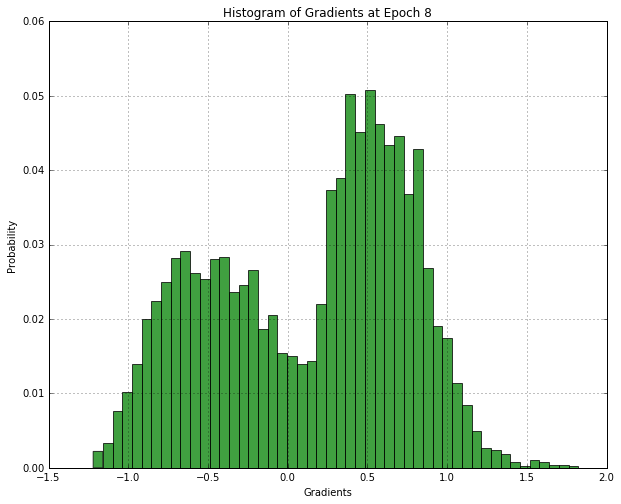

epoch (9 / 24) gain: 80.488216 train acc: 0.979400 val acc: 0.975000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4876/5000


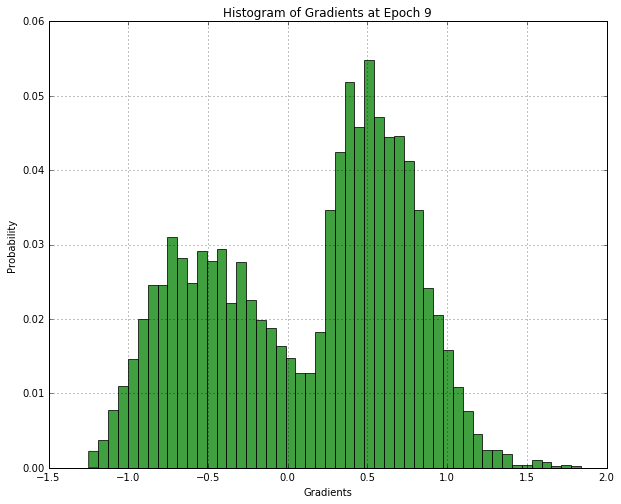

epoch (10 / 24) gain: 84.446397 train acc: 0.981200 val acc: 0.972500 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4841/5000


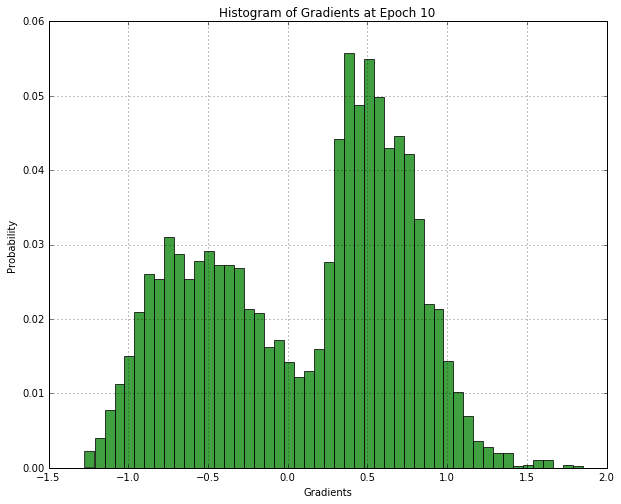

epoch (11 / 24) gain: 88.162857 train acc: 0.982000 val acc: 0.972500 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4815/5000


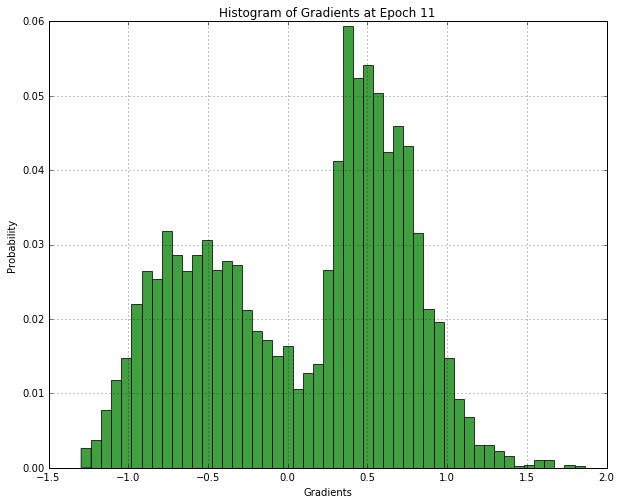

epoch (12 / 24) gain: 91.668955 train acc: 0.983600 val acc: 0.975000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4786/5000


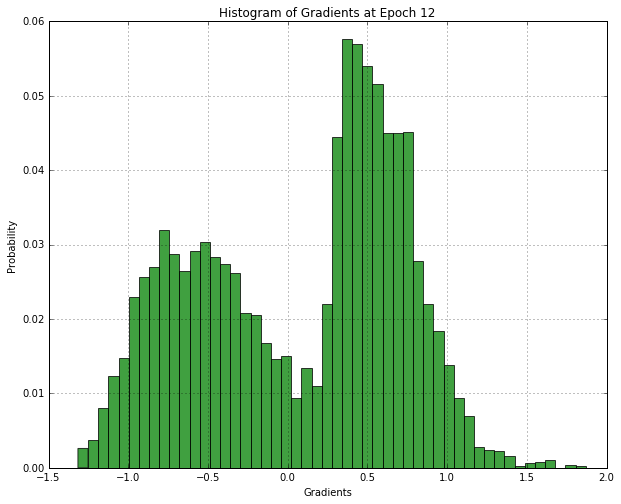

epoch (13 / 24) gain: 94.984495 train acc: 0.984600 val acc: 0.975000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4758/5000


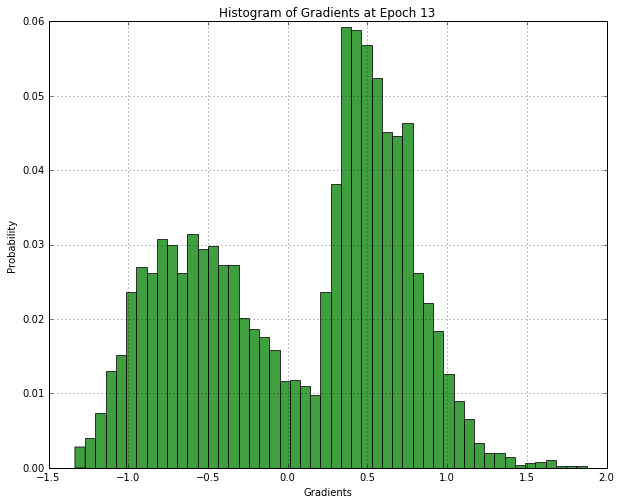

epoch (14 / 24) gain: 98.133391 train acc: 0.985000 val acc: 0.975000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4724/5000


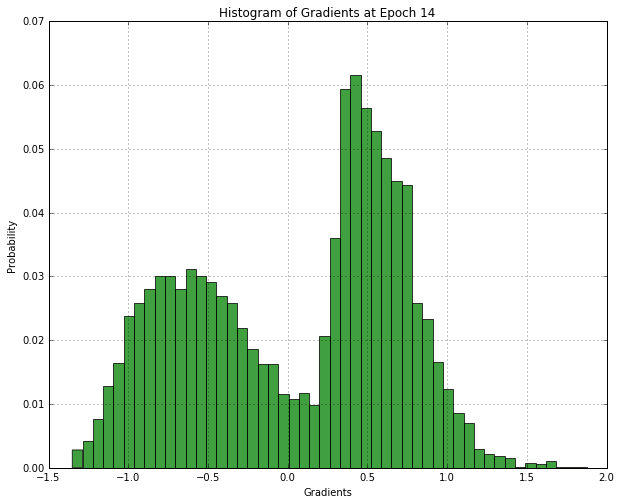

epoch (15 / 24) gain: 101.135995 train acc: 0.985600 val acc: 0.975000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4694/5000


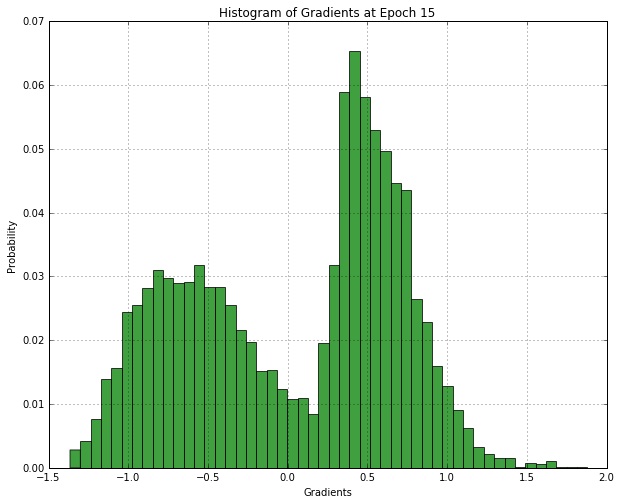

epoch (16 / 24) gain: 104.010186 train acc: 0.986600 val acc: 0.975000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4671/5000


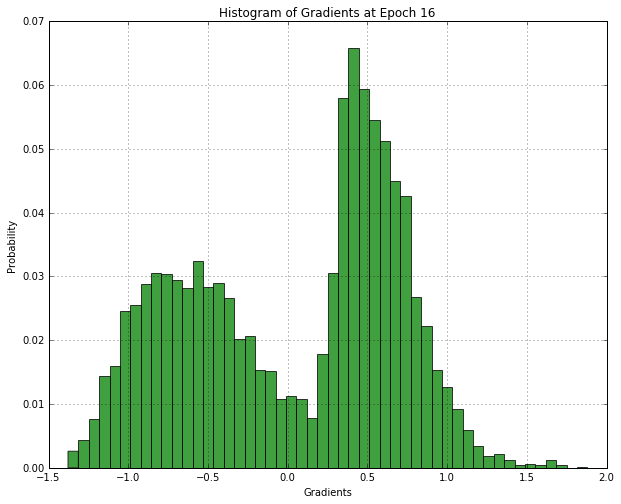

epoch (17 / 24) gain: 106.763520 train acc: 0.987400 val acc: 0.975000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4642/5000


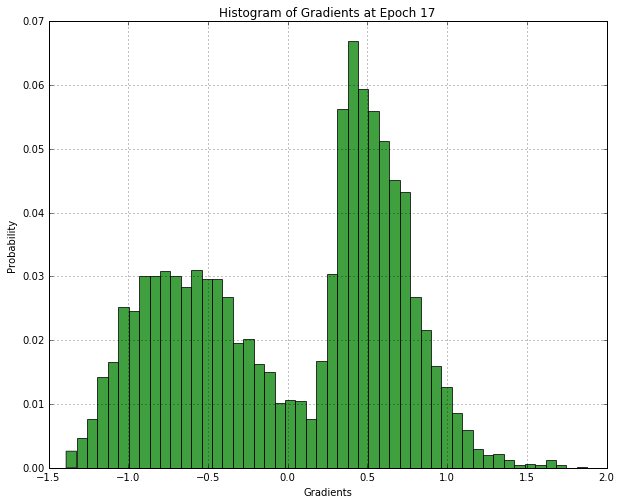

epoch (18 / 24) gain: 109.404458 train acc: 0.987800 val acc: 0.975000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4618/5000


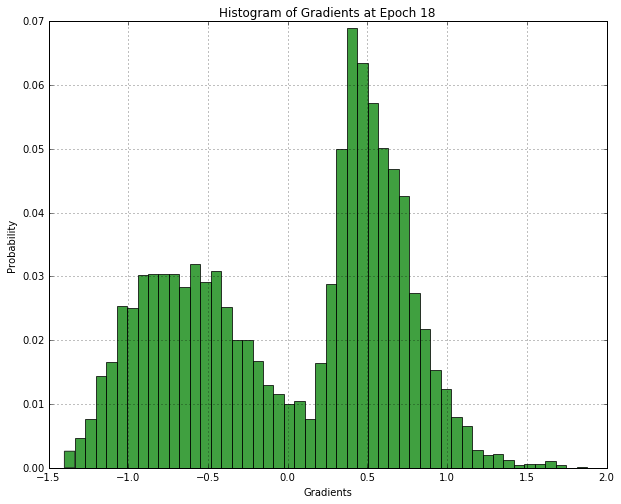

epoch (19 / 24) gain: 111.945895 train acc: 0.988400 val acc: 0.975000 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4598/5000


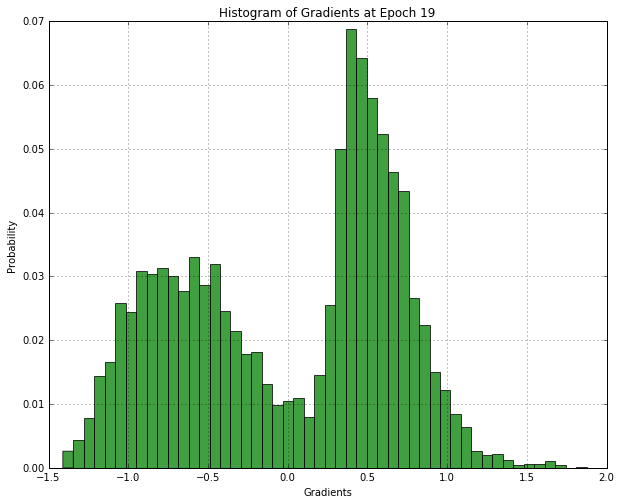

epoch (20 / 24) gain: 114.396232 train acc: 0.988600 val acc: 0.977500 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4573/5000


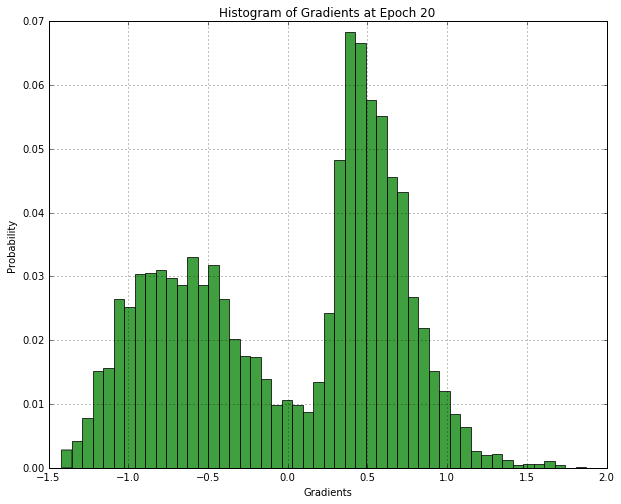

epoch (21 / 24) gain: 116.759897 train acc: 0.988800 val acc: 0.977500 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4552/5000


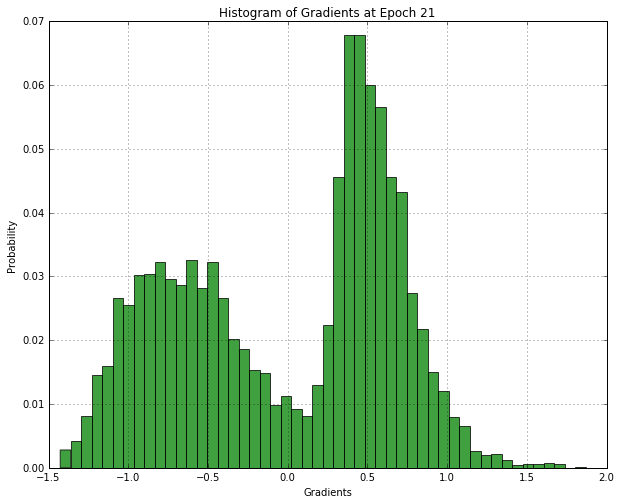

epoch (22 / 24) gain: 119.041524 train acc: 0.989000 val acc: 0.977500 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4539/5000


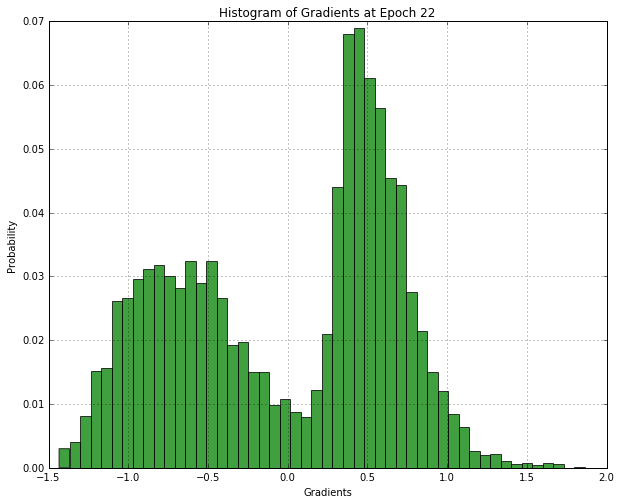

epoch (23 / 24) gain: 121.249814 train acc: 0.989000 val acc: 0.977500 lr: 0.007000 C: 10.000000 gamma: 0.037276 support vectors: 4506/5000


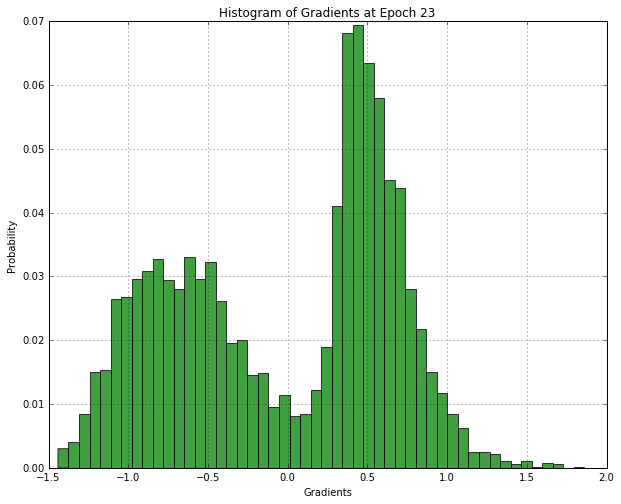

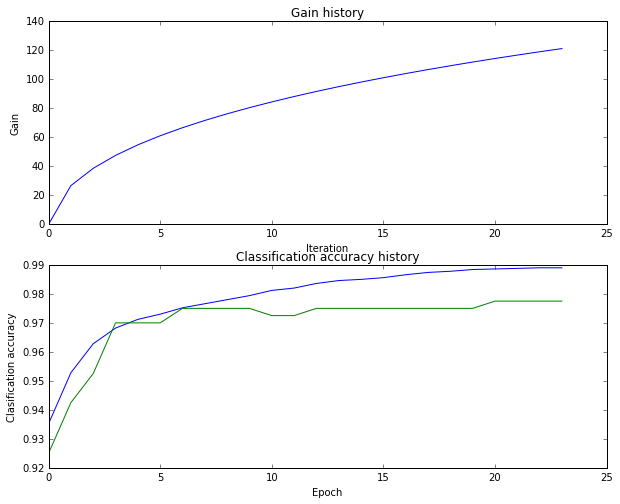

binary training accuracy for digit 6: 0.989000
binary validation accuracy for digit 6: 0.977500
best binary training accuracy for digit 6: 0.989000
best binary validation accuracy for digit 6: 0.977500

Training digit 7...

Pre-calculating kernel...
epoch (0 / 24) gain: 0.000000 train acc: 0.913600 val acc: 0.947500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 5000/5000


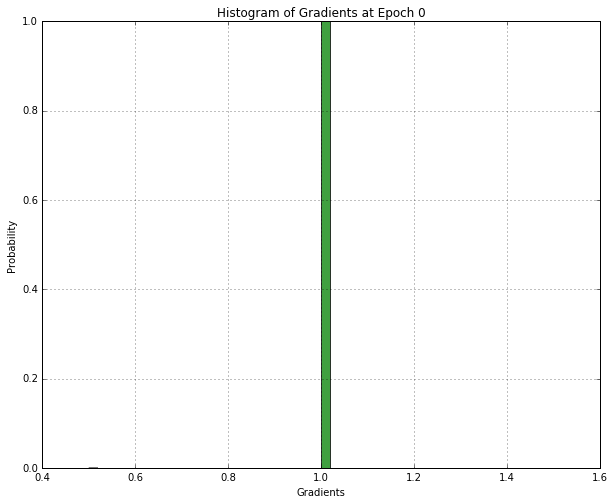

epoch (1 / 24) gain: 20.839001 train acc: 0.948400 val acc: 0.967500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 5000/5000


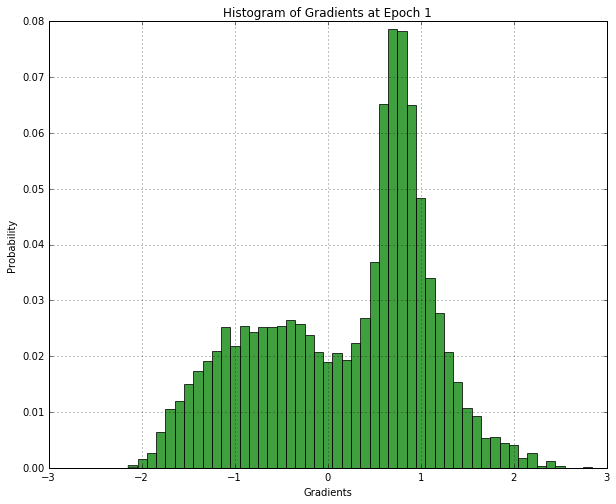

epoch (2 / 24) gain: 30.193878 train acc: 0.959400 val acc: 0.977500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 5000/5000


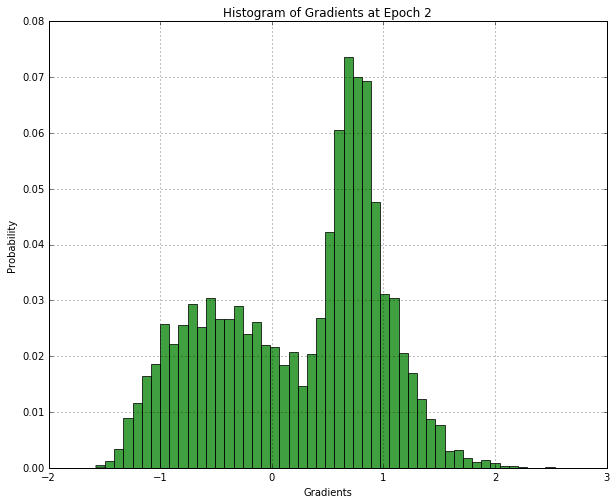

epoch (3 / 24) gain: 37.524150 train acc: 0.963200 val acc: 0.985000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4995/5000


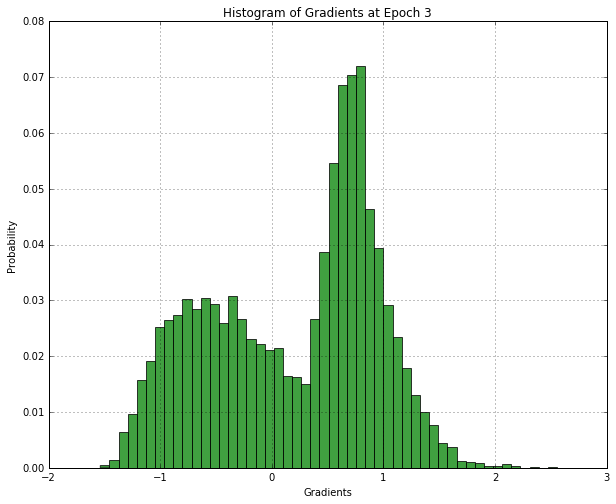

epoch (4 / 24) gain: 43.722252 train acc: 0.966600 val acc: 0.985000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4975/5000


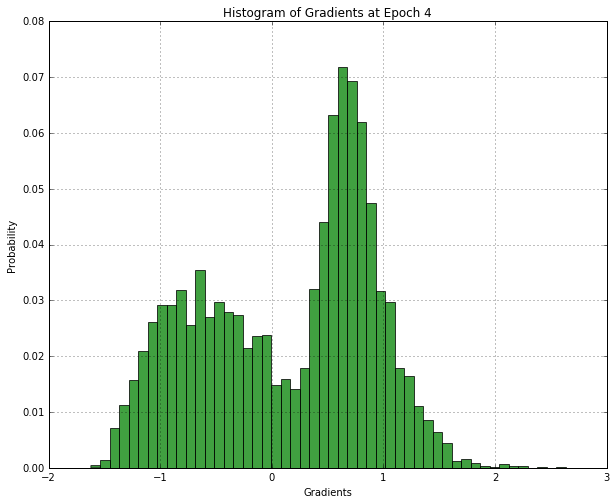

epoch (5 / 24) gain: 49.237102 train acc: 0.968200 val acc: 0.987500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4930/5000


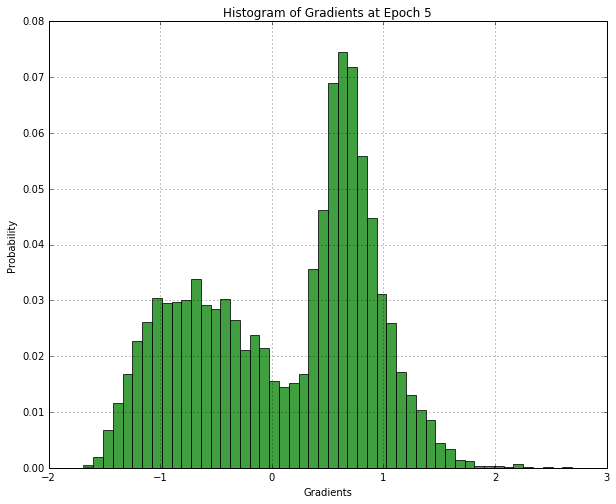

epoch (6 / 24) gain: 54.306454 train acc: 0.970600 val acc: 0.987500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4868/5000


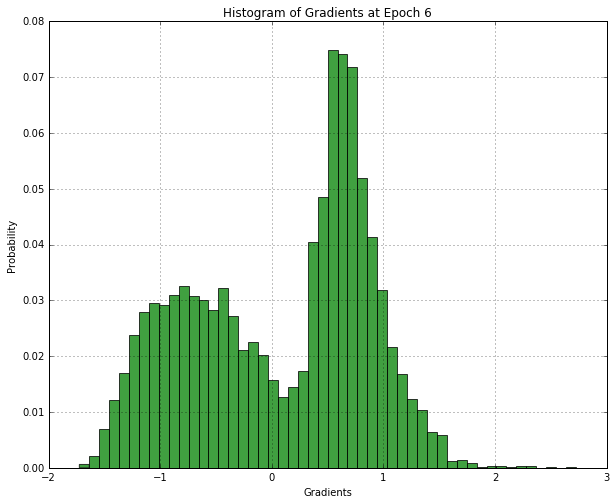

epoch (7 / 24) gain: 59.039953 train acc: 0.973800 val acc: 0.987500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4825/5000


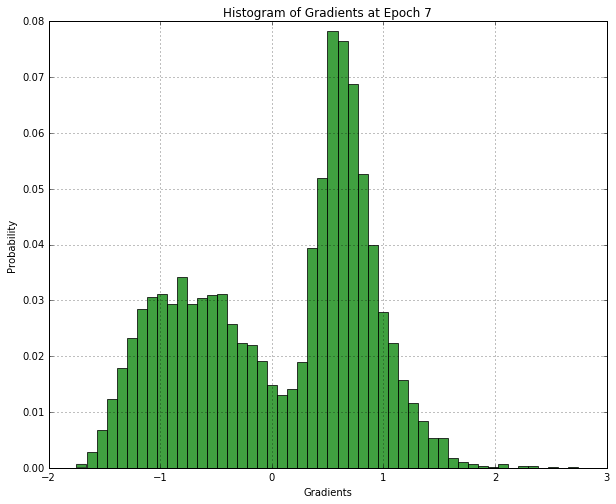

epoch (8 / 24) gain: 63.493119 train acc: 0.974400 val acc: 0.987500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4778/5000


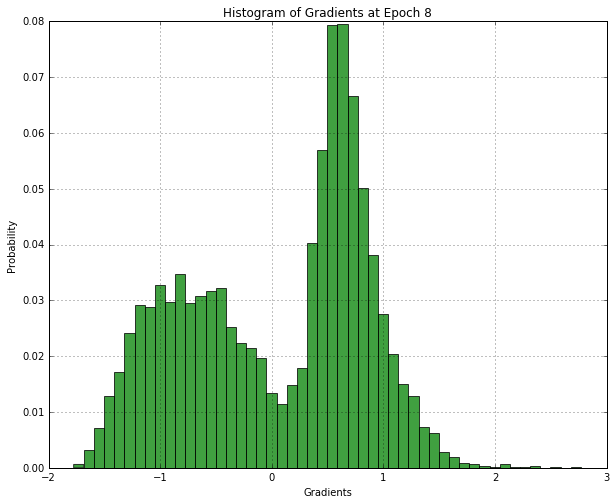

epoch (9 / 24) gain: 67.704886 train acc: 0.974600 val acc: 0.987500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4728/5000


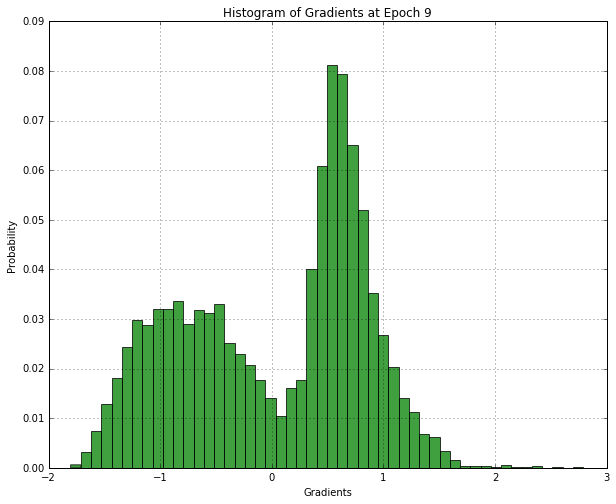

epoch (10 / 24) gain: 71.699432 train acc: 0.974800 val acc: 0.987500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4687/5000


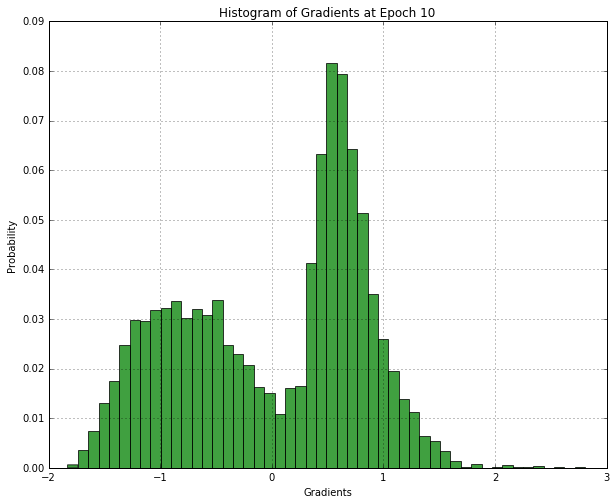

epoch (11 / 24) gain: 75.516950 train acc: 0.975800 val acc: 0.987500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4659/5000


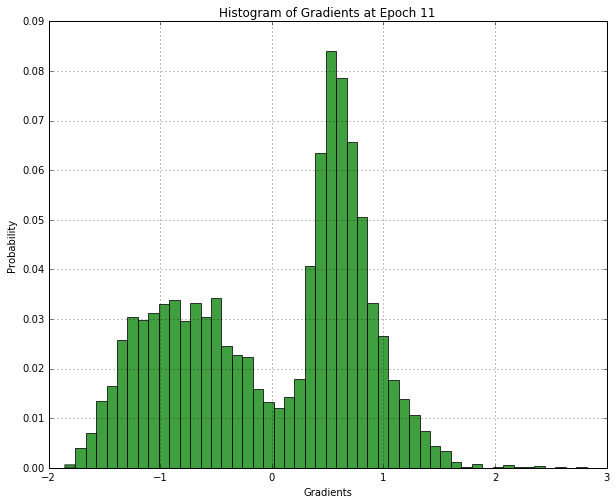

epoch (12 / 24) gain: 79.172839 train acc: 0.976200 val acc: 0.987500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4617/5000


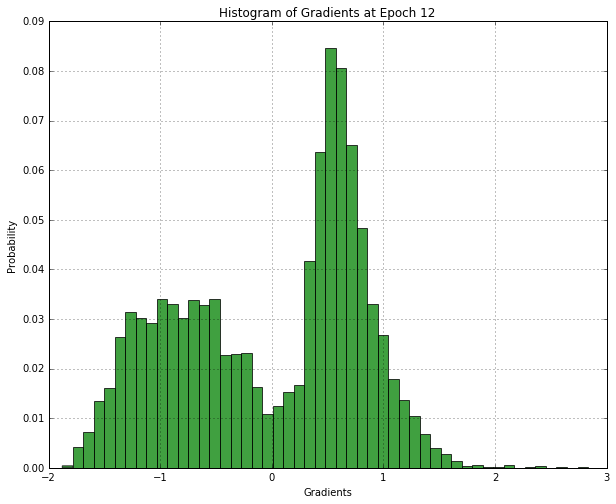

epoch (13 / 24) gain: 82.684683 train acc: 0.976400 val acc: 0.990000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4578/5000


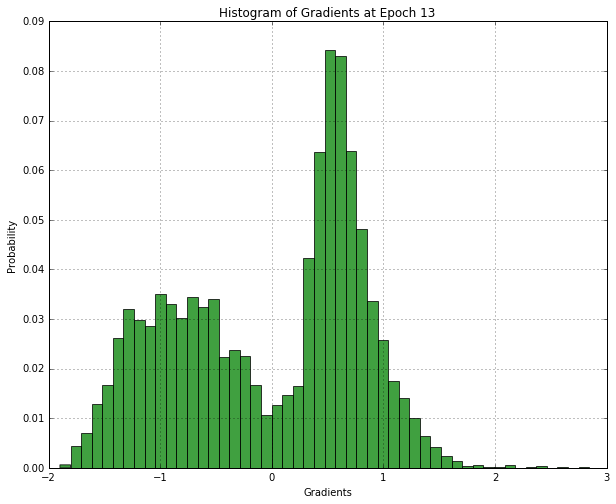

epoch (14 / 24) gain: 86.072762 train acc: 0.977000 val acc: 0.990000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4550/5000


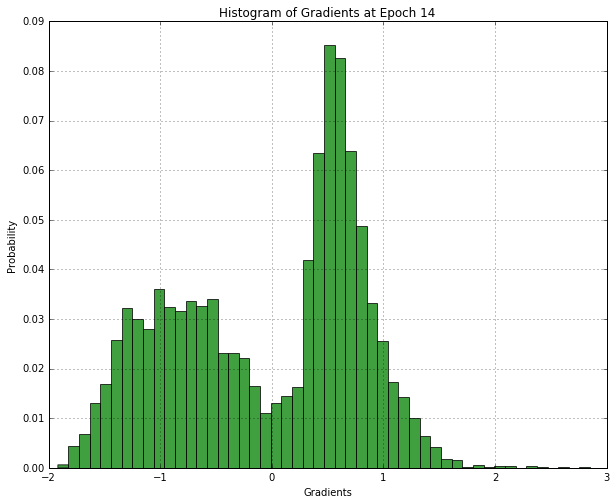

epoch (15 / 24) gain: 89.352693 train acc: 0.977800 val acc: 0.990000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4519/5000


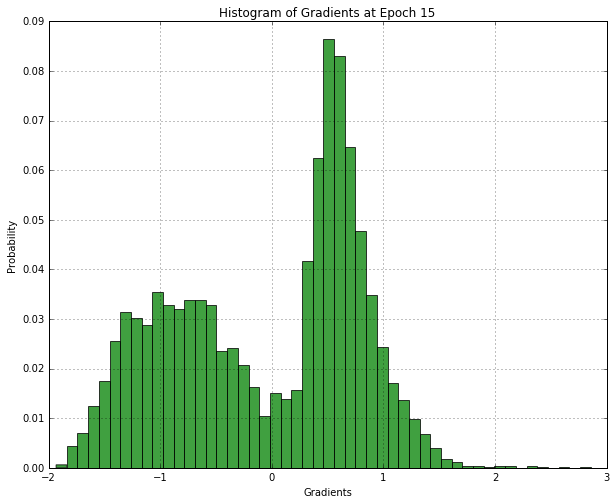

epoch (16 / 24) gain: 92.530604 train acc: 0.978400 val acc: 0.990000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4482/5000


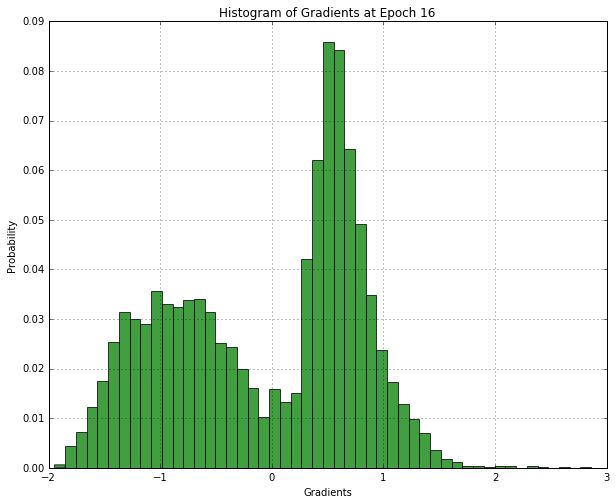

epoch (17 / 24) gain: 95.612030 train acc: 0.978800 val acc: 0.987500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4446/5000


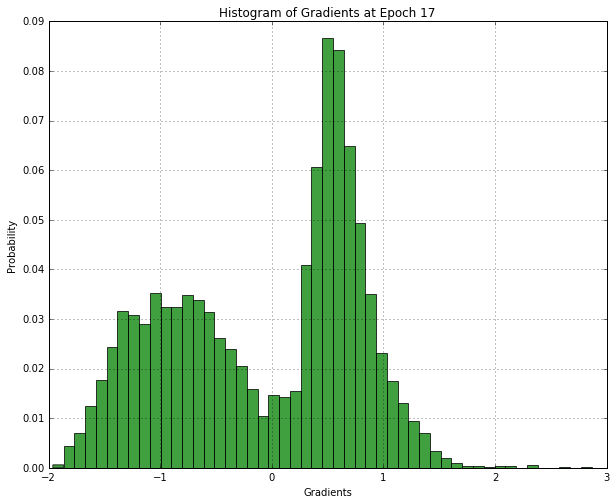

epoch (18 / 24) gain: 98.606562 train acc: 0.979200 val acc: 0.987500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4408/5000


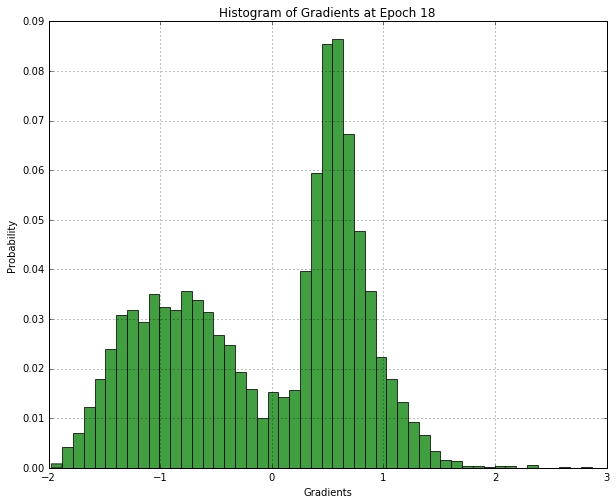

epoch (19 / 24) gain: 101.518912 train acc: 0.979400 val acc: 0.987500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4381/5000


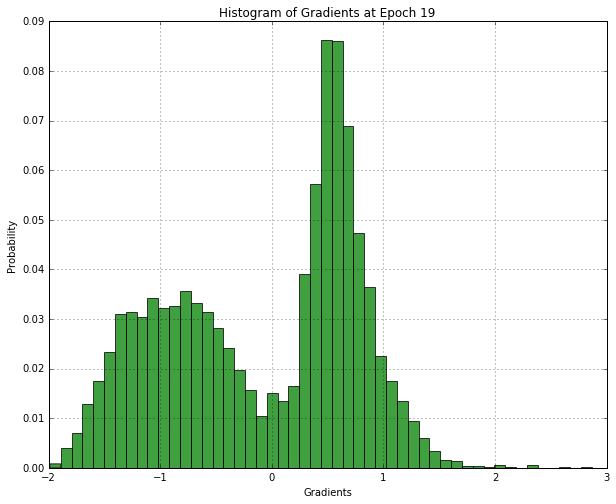

epoch (20 / 24) gain: 104.352619 train acc: 0.979400 val acc: 0.990000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4356/5000


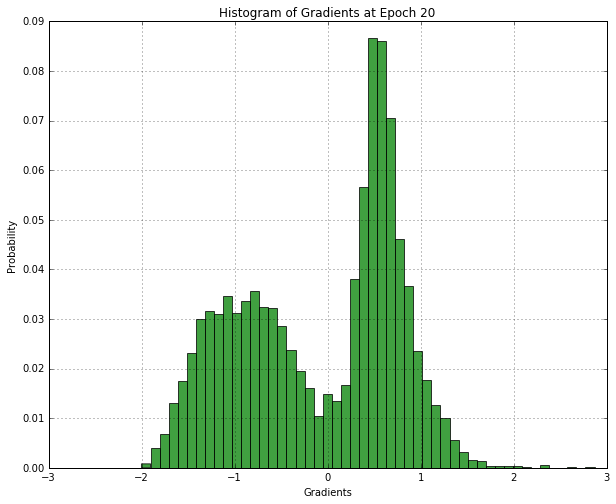

epoch (21 / 24) gain: 107.111532 train acc: 0.979600 val acc: 0.990000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4324/5000


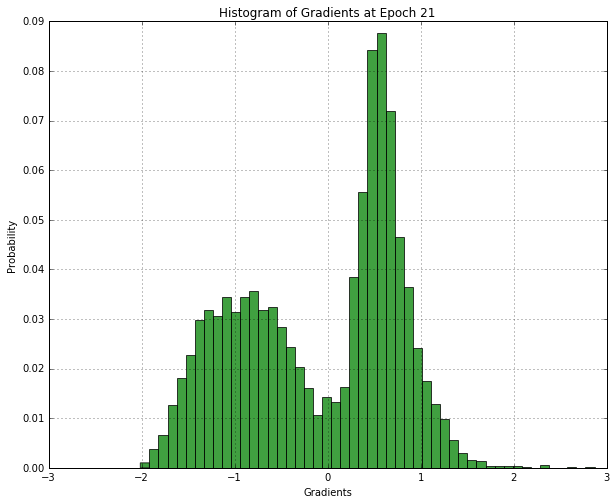

epoch (22 / 24) gain: 109.797575 train acc: 0.980200 val acc: 0.990000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4294/5000


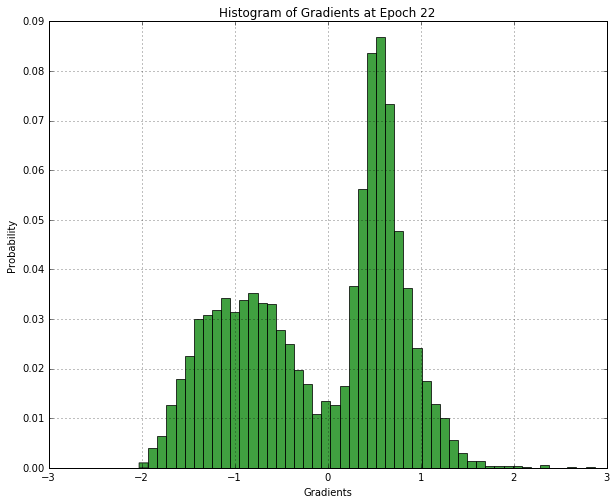

epoch (23 / 24) gain: 112.416779 train acc: 0.980600 val acc: 0.990000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4270/5000


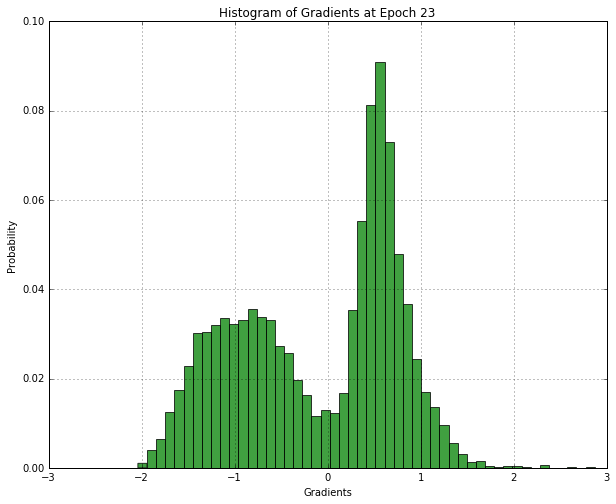

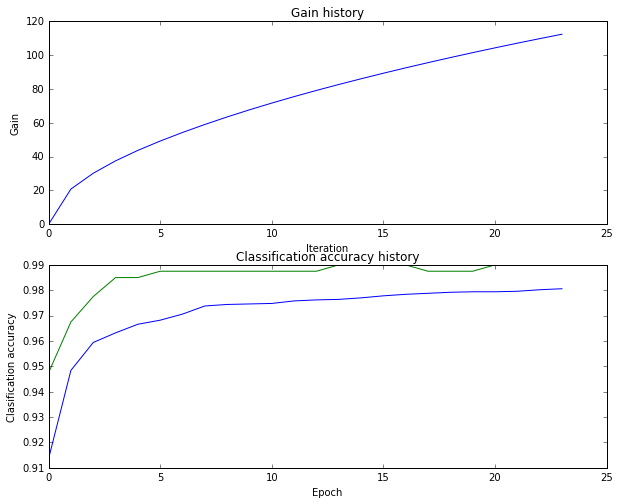

binary training accuracy for digit 7: 0.980600
binary validation accuracy for digit 7: 0.990000
best binary training accuracy for digit 7: 0.980600
best binary validation accuracy for digit 7: 0.990000

Training digit 8...

Pre-calculating kernel...
epoch (0 / 24) gain: 0.000000 train acc: 0.878800 val acc: 0.897500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 5000/5000


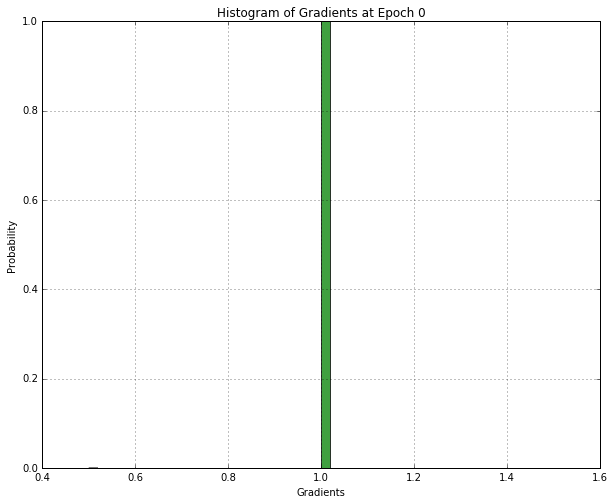

epoch (1 / 24) gain: 28.334049 train acc: 0.899800 val acc: 0.907500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 5000/5000


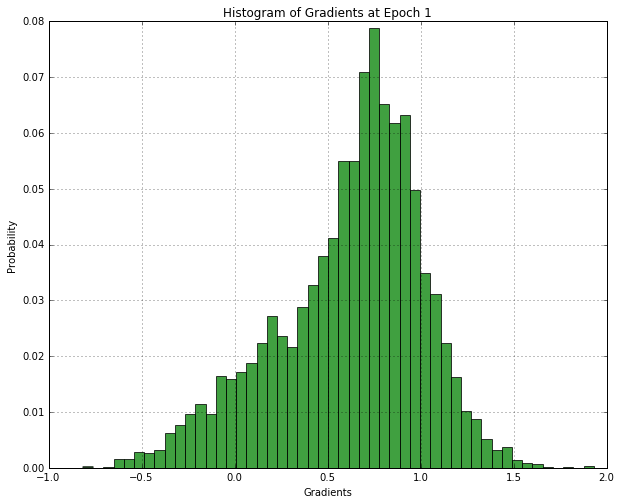

epoch (2 / 24) gain: 44.211272 train acc: 0.913800 val acc: 0.922500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 5000/5000


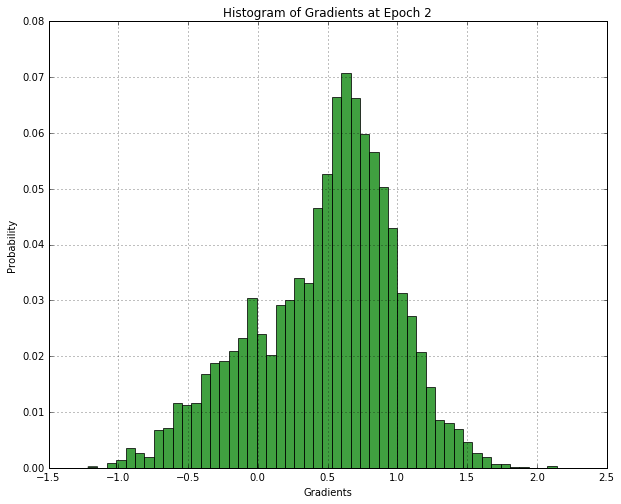

epoch (3 / 24) gain: 57.170967 train acc: 0.924200 val acc: 0.937500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 5000/5000


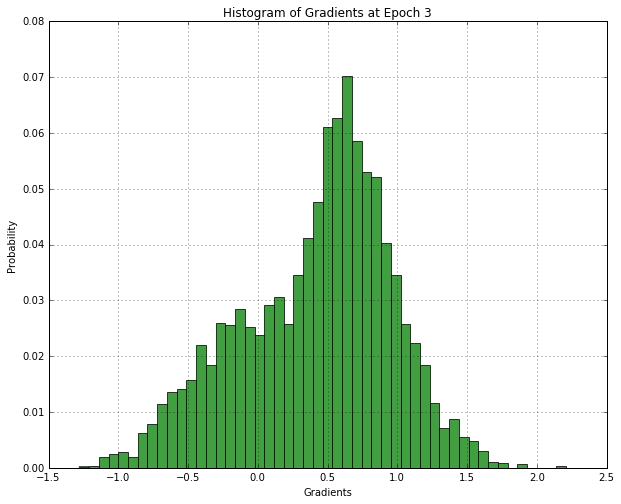

epoch (4 / 24) gain: 68.482389 train acc: 0.930600 val acc: 0.950000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 5000/5000


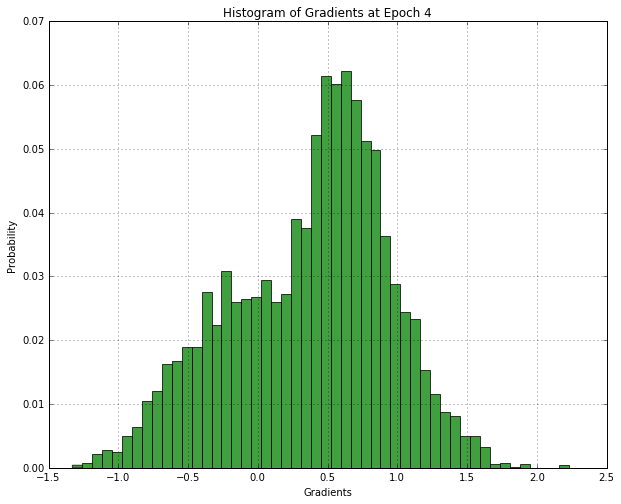

epoch (5 / 24) gain: 78.659679 train acc: 0.936800 val acc: 0.957500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4999/5000


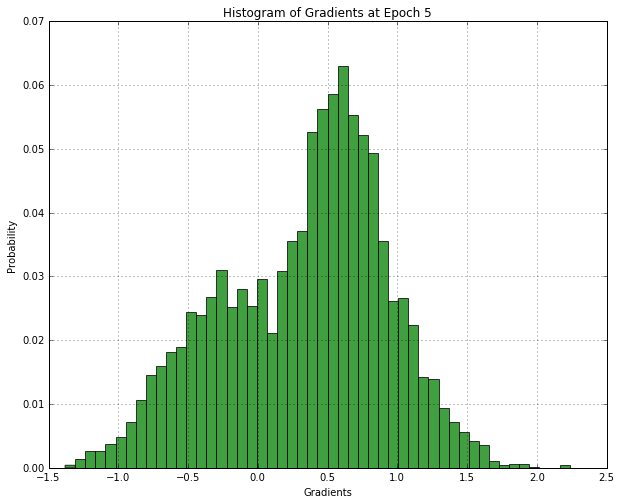

epoch (6 / 24) gain: 88.007456 train acc: 0.941400 val acc: 0.960000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4990/5000


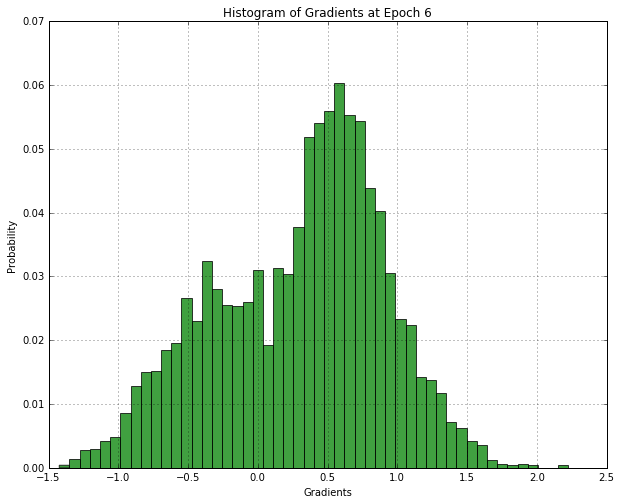

epoch (7 / 24) gain: 96.701433 train acc: 0.947000 val acc: 0.965000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4981/5000


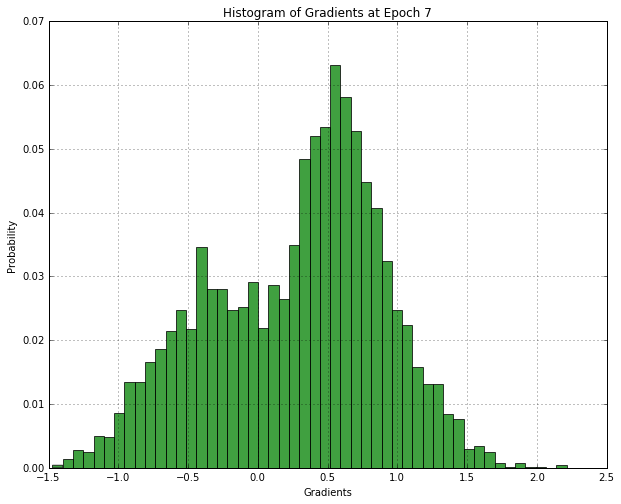

epoch (8 / 24) gain: 104.858413 train acc: 0.949400 val acc: 0.970000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4968/5000


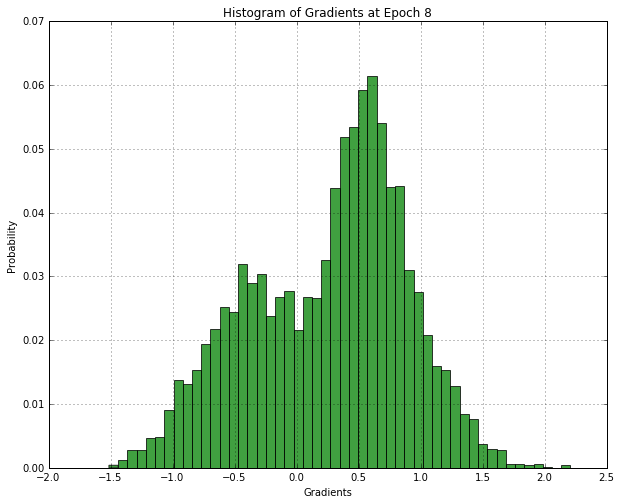

epoch (9 / 24) gain: 112.555204 train acc: 0.952400 val acc: 0.972500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4950/5000


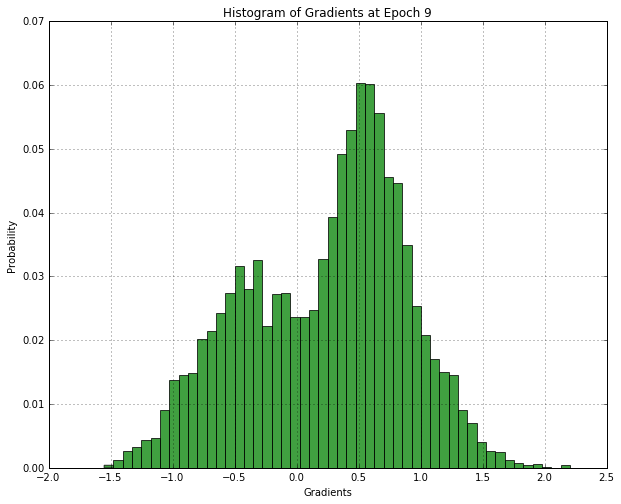

epoch (10 / 24) gain: 119.859292 train acc: 0.955600 val acc: 0.972500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4936/5000


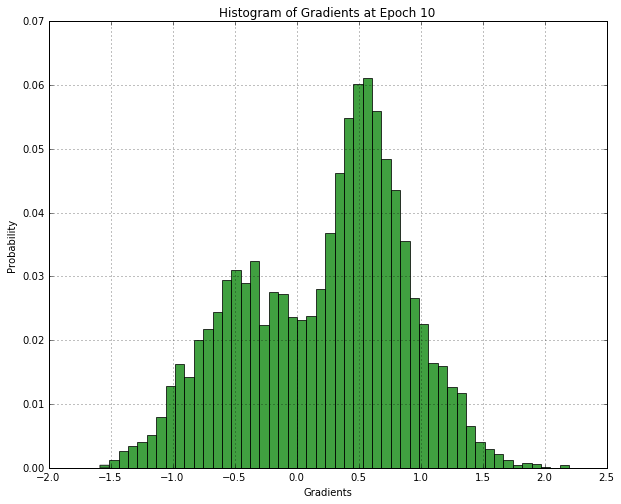

epoch (11 / 24) gain: 126.818726 train acc: 0.958600 val acc: 0.972500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4918/5000


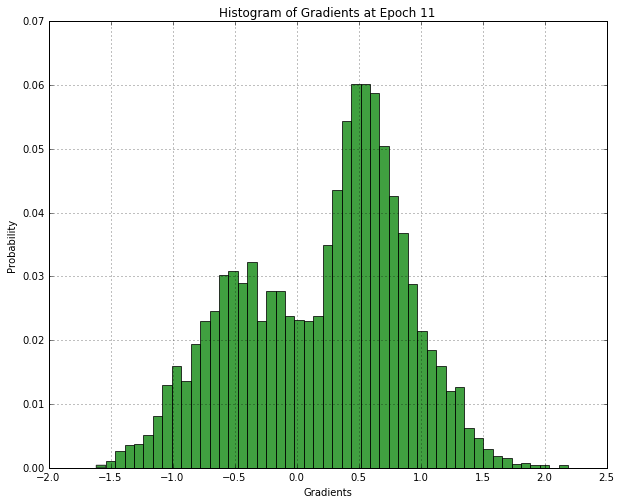

epoch (12 / 24) gain: 133.469791 train acc: 0.960400 val acc: 0.972500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4899/5000


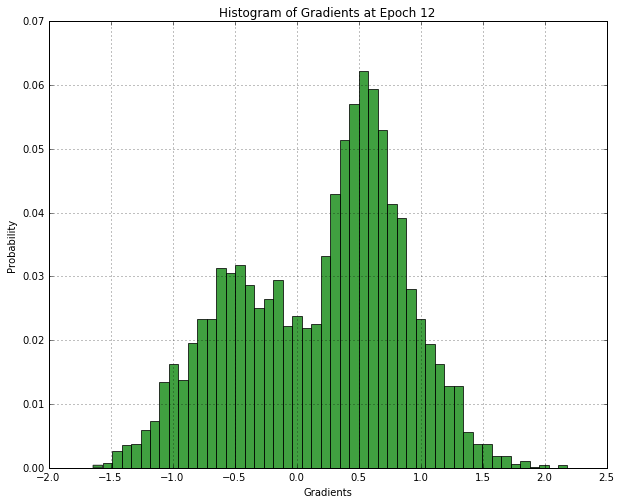

epoch (13 / 24) gain: 139.840847 train acc: 0.962400 val acc: 0.975000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4886/5000


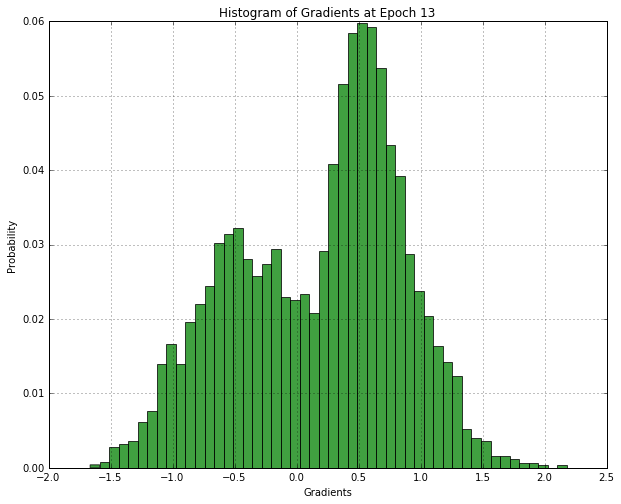

epoch (14 / 24) gain: 145.957402 train acc: 0.964200 val acc: 0.975000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4862/5000


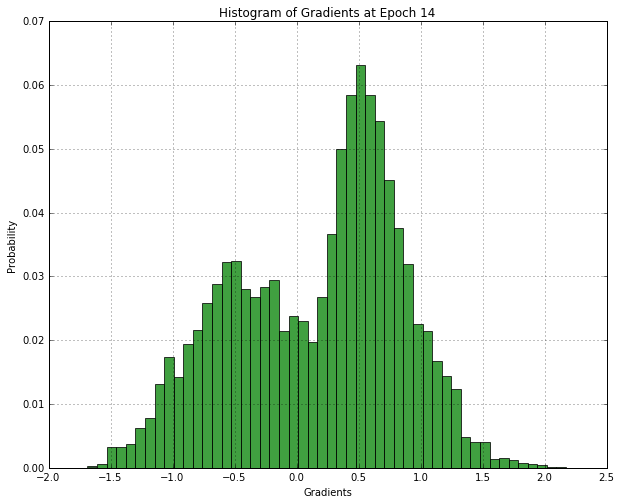

epoch (15 / 24) gain: 151.841286 train acc: 0.965200 val acc: 0.975000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4847/5000


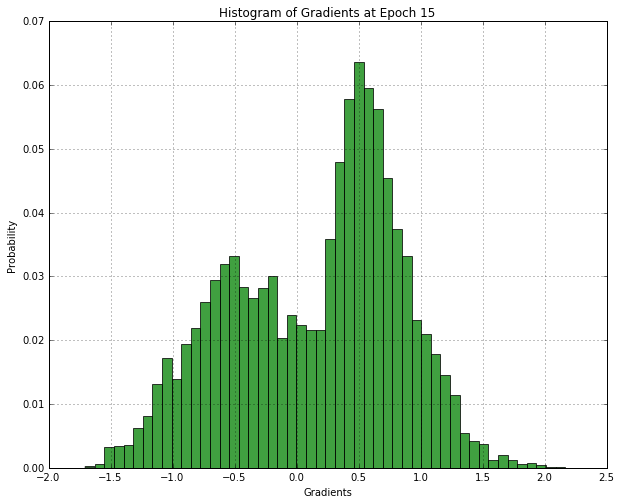

epoch (16 / 24) gain: 157.514962 train acc: 0.965800 val acc: 0.975000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4825/5000


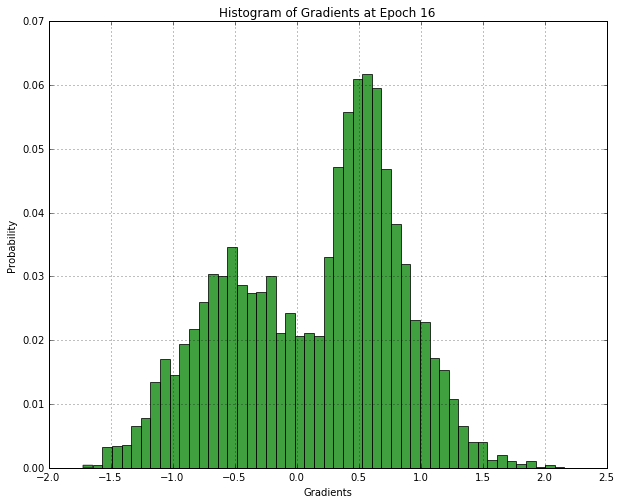

epoch (17 / 24) gain: 162.993190 train acc: 0.966600 val acc: 0.975000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4804/5000


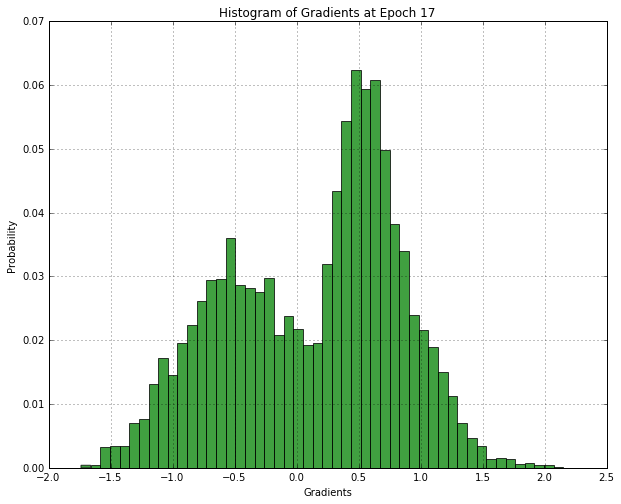

epoch (18 / 24) gain: 168.290589 train acc: 0.968200 val acc: 0.975000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4784/5000


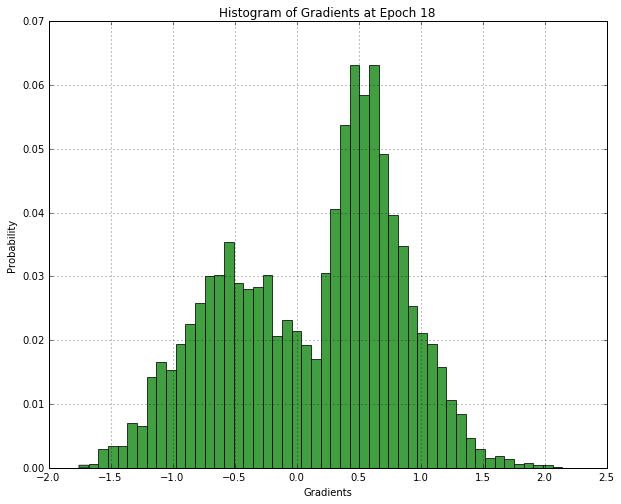

epoch (19 / 24) gain: 173.418051 train acc: 0.969600 val acc: 0.977500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4759/5000


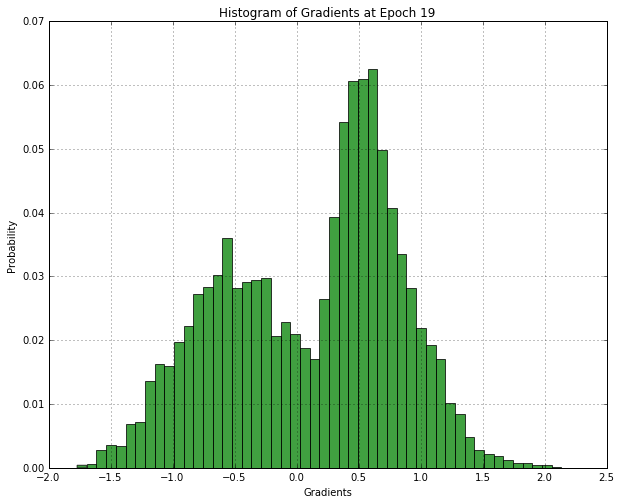

epoch (20 / 24) gain: 178.389205 train acc: 0.970600 val acc: 0.980000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4740/5000


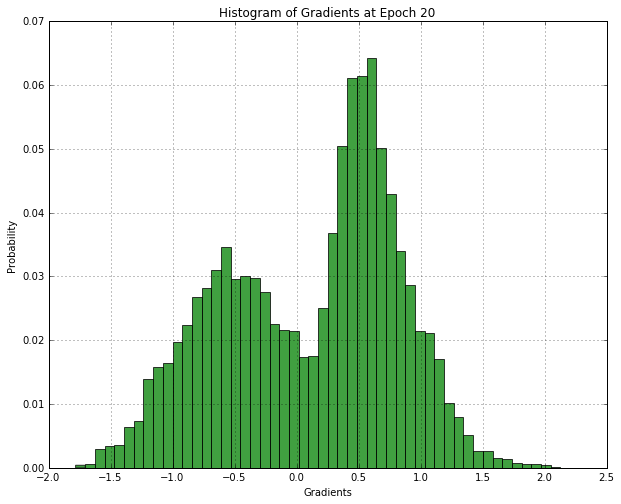

epoch (21 / 24) gain: 183.208359 train acc: 0.971200 val acc: 0.980000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4726/5000


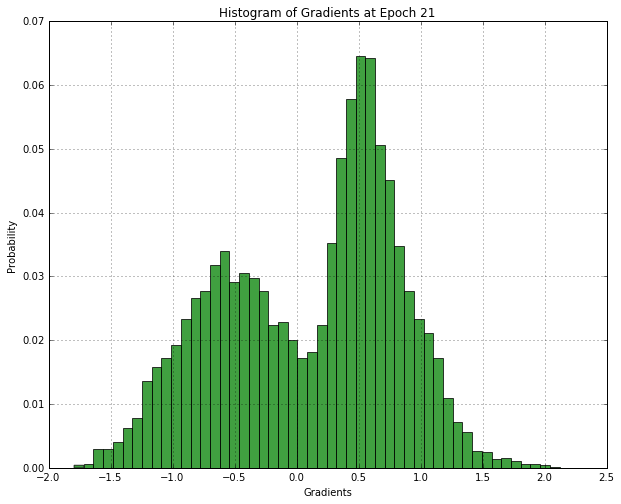

epoch (22 / 24) gain: 187.881961 train acc: 0.972600 val acc: 0.980000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4707/5000


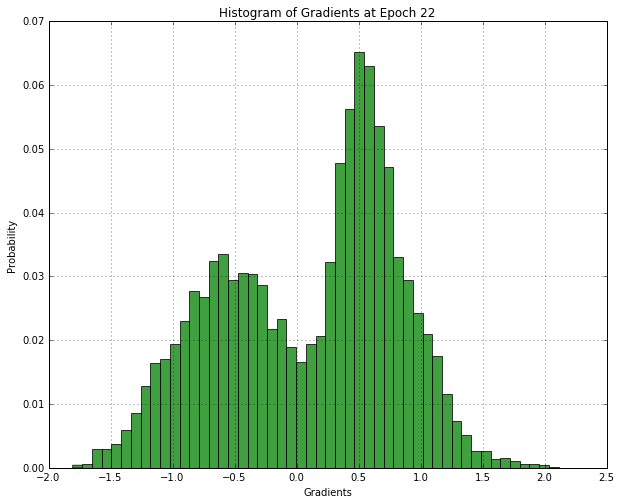

epoch (23 / 24) gain: 192.418681 train acc: 0.973400 val acc: 0.980000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4692/5000


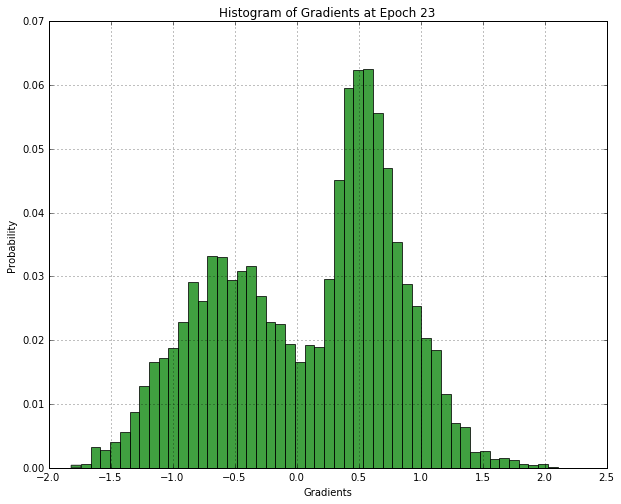

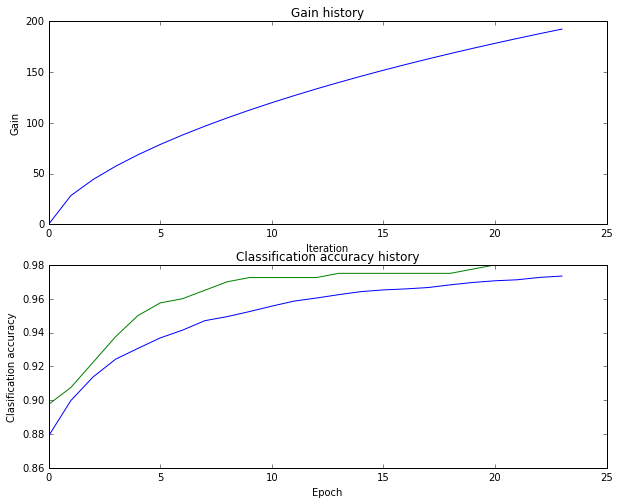

binary training accuracy for digit 8: 0.973400
binary validation accuracy for digit 8: 0.980000
best binary training accuracy for digit 8: 0.973400
best binary validation accuracy for digit 8: 0.980000

Training digit 9...

Pre-calculating kernel...
epoch (0 / 24) gain: 0.000000 train acc: 0.862800 val acc: 0.892500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 5000/5000


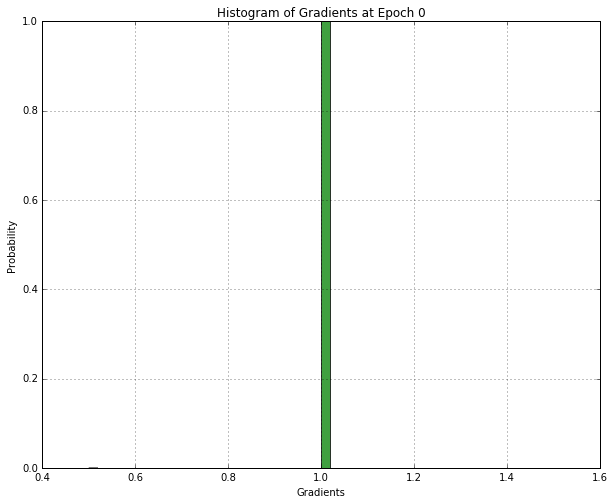

epoch (1 / 24) gain: 25.311552 train acc: 0.896800 val acc: 0.915000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 5000/5000


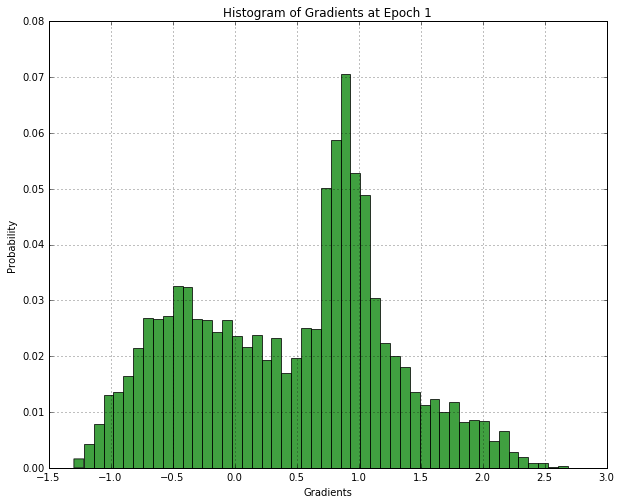

epoch (2 / 24) gain: 38.855466 train acc: 0.916600 val acc: 0.930000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 5000/5000


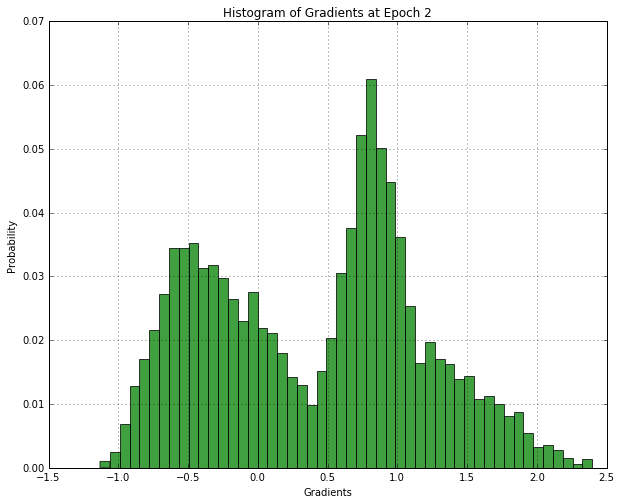

epoch (3 / 24) gain: 50.031909 train acc: 0.930200 val acc: 0.945000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 5000/5000


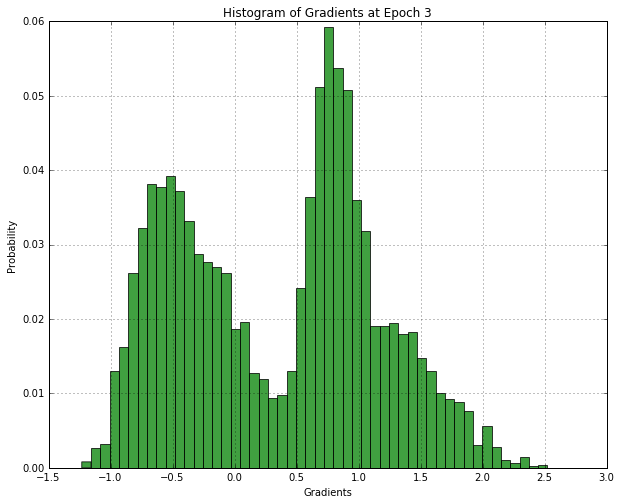

epoch (4 / 24) gain: 59.795259 train acc: 0.939600 val acc: 0.942500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4992/5000


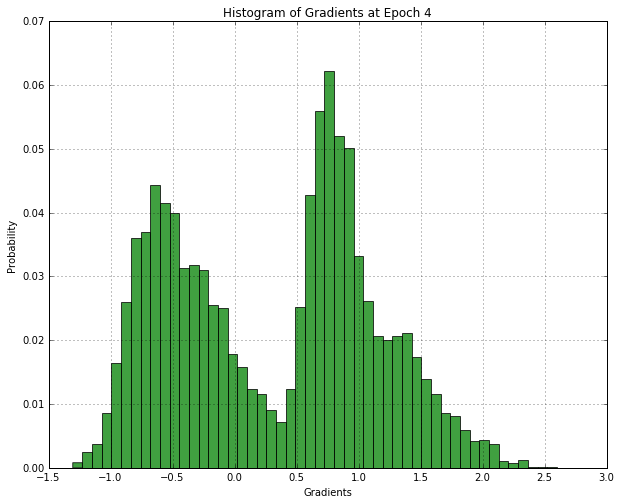

epoch (5 / 24) gain: 68.592110 train acc: 0.945400 val acc: 0.947500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4975/5000


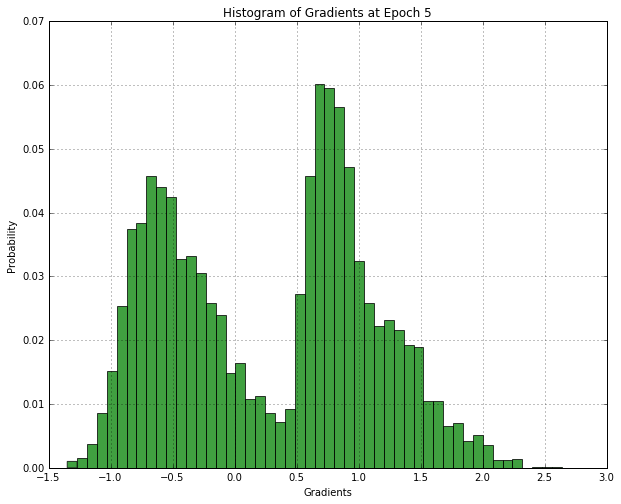

epoch (6 / 24) gain: 76.657545 train acc: 0.949400 val acc: 0.952500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4955/5000


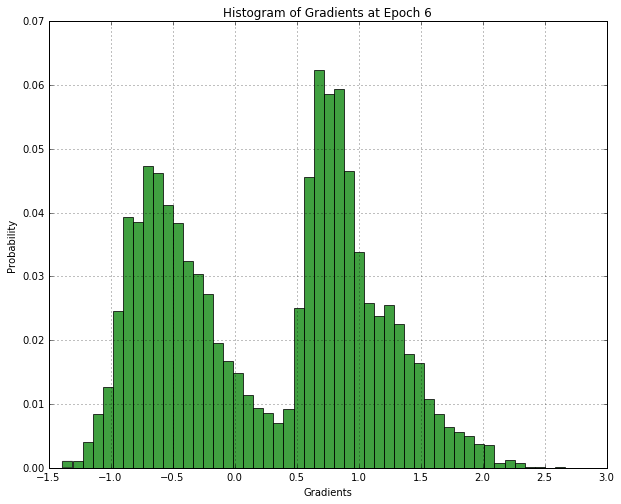

epoch (7 / 24) gain: 84.143864 train acc: 0.951600 val acc: 0.955000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4925/5000


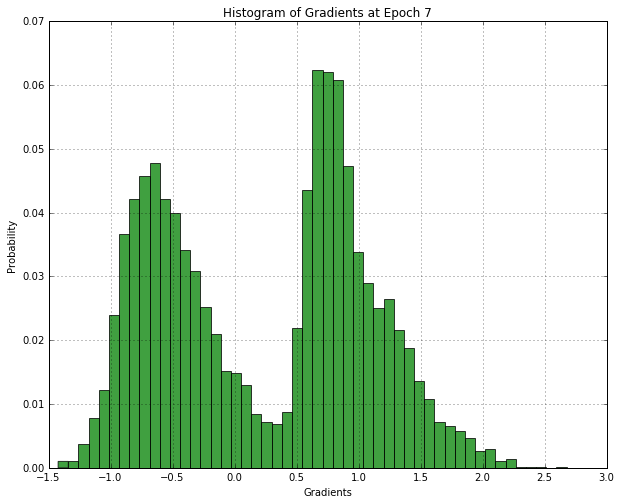

epoch (8 / 24) gain: 91.157193 train acc: 0.954600 val acc: 0.960000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4889/5000


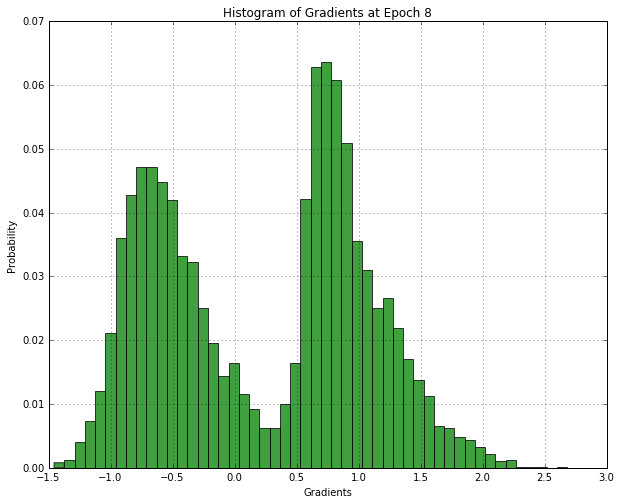

epoch (9 / 24) gain: 97.772564 train acc: 0.957600 val acc: 0.962500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4854/5000


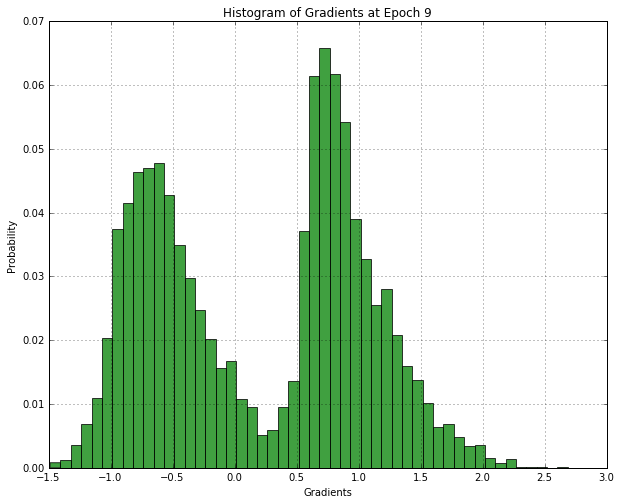

epoch (10 / 24) gain: 104.047936 train acc: 0.958600 val acc: 0.962500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4827/5000


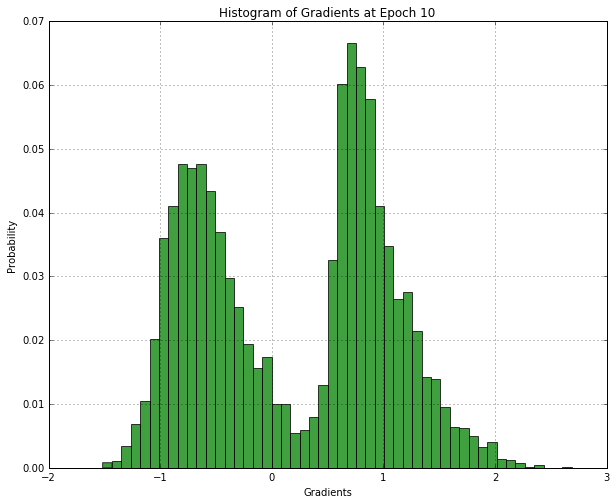

epoch (11 / 24) gain: 110.029209 train acc: 0.961400 val acc: 0.962500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4804/5000


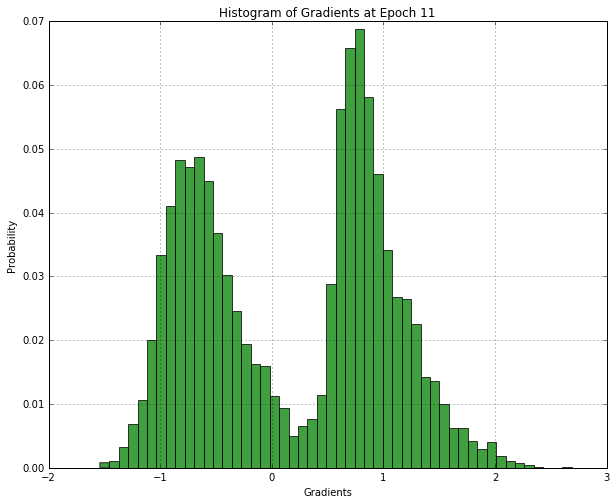

epoch (12 / 24) gain: 115.748654 train acc: 0.963400 val acc: 0.962500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4780/5000


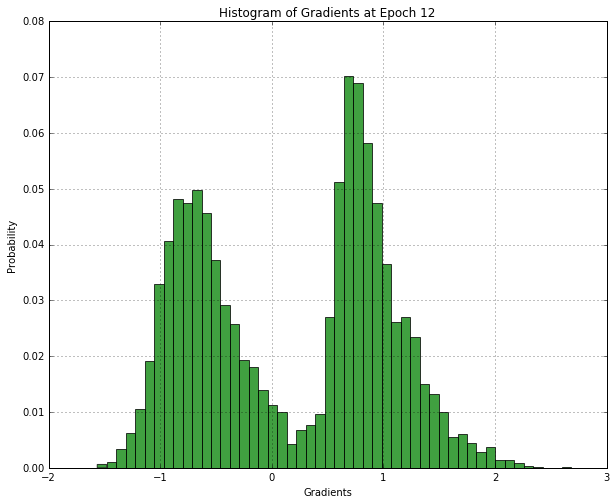

epoch (13 / 24) gain: 121.233771 train acc: 0.964800 val acc: 0.965000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4742/5000


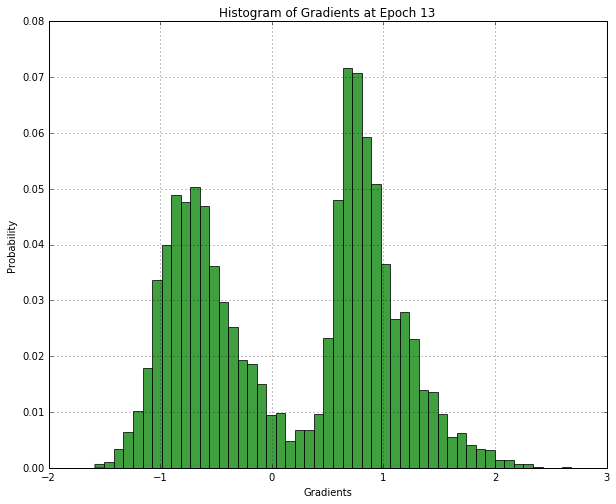

epoch (14 / 24) gain: 126.511245 train acc: 0.966800 val acc: 0.972500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4718/5000


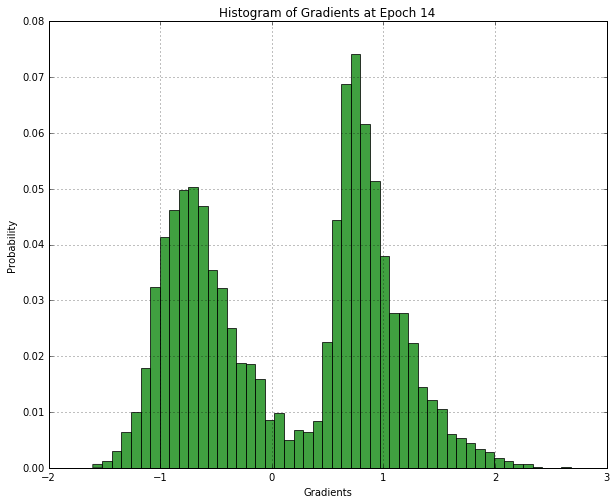

epoch (15 / 24) gain: 131.601381 train acc: 0.967800 val acc: 0.972500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4689/5000


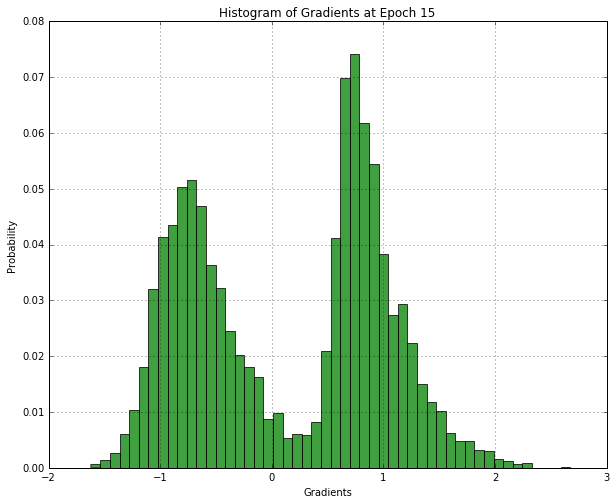

epoch (16 / 24) gain: 136.519395 train acc: 0.969800 val acc: 0.972500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4657/5000


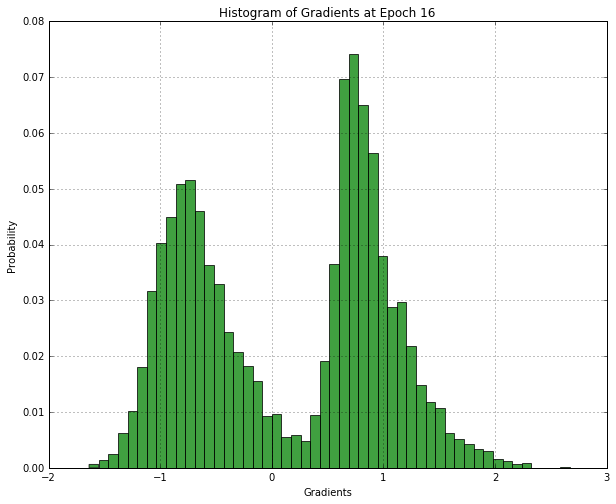

epoch (17 / 24) gain: 141.279754 train acc: 0.970800 val acc: 0.975000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4637/5000


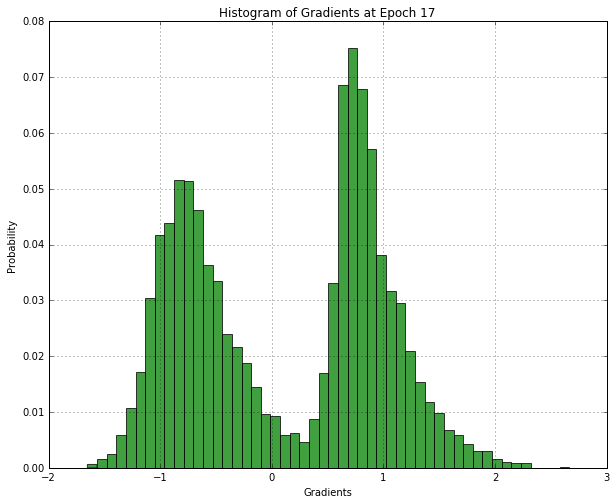

epoch (18 / 24) gain: 145.895406 train acc: 0.971400 val acc: 0.972500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4620/5000


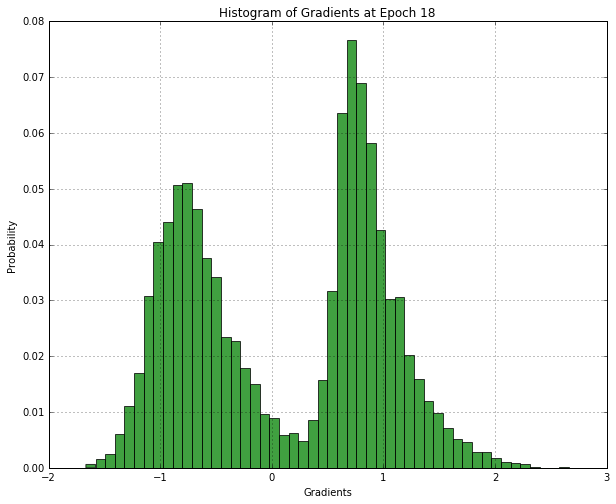

epoch (19 / 24) gain: 150.378892 train acc: 0.972000 val acc: 0.977500 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4587/5000


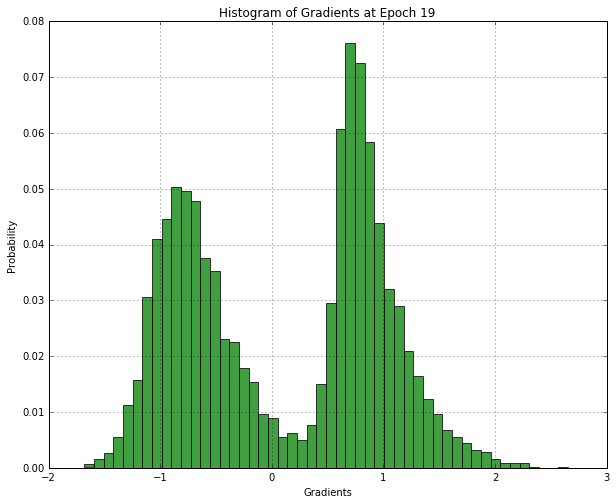

epoch (20 / 24) gain: 154.733883 train acc: 0.973200 val acc: 0.980000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4568/5000


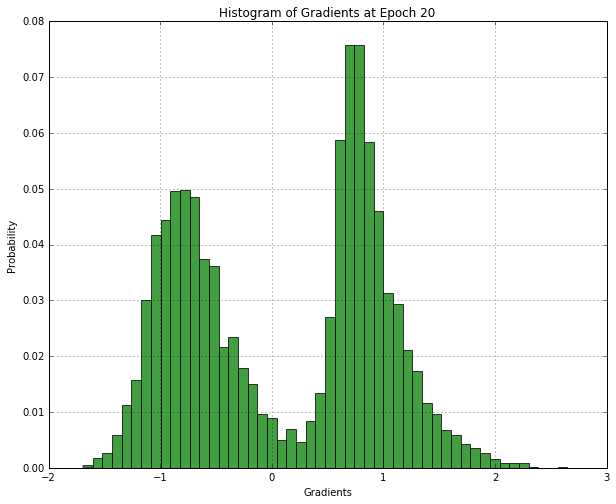

epoch (21 / 24) gain: 158.969780 train acc: 0.973800 val acc: 0.980000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4548/5000


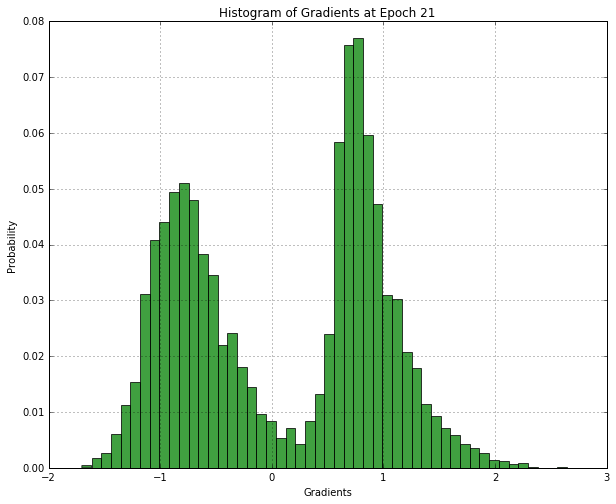

epoch (22 / 24) gain: 163.094566 train acc: 0.975200 val acc: 0.980000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4526/5000


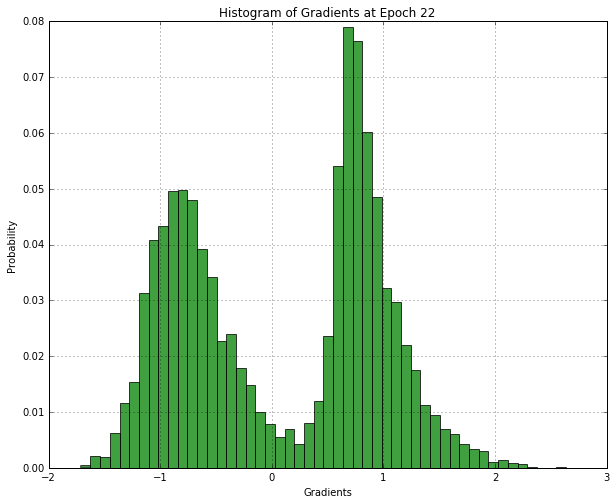

epoch (23 / 24) gain: 167.116726 train acc: 0.976200 val acc: 0.980000 lr: 0.007000 C: 10.000000 gamma: 0.026827 support vectors: 4511/5000


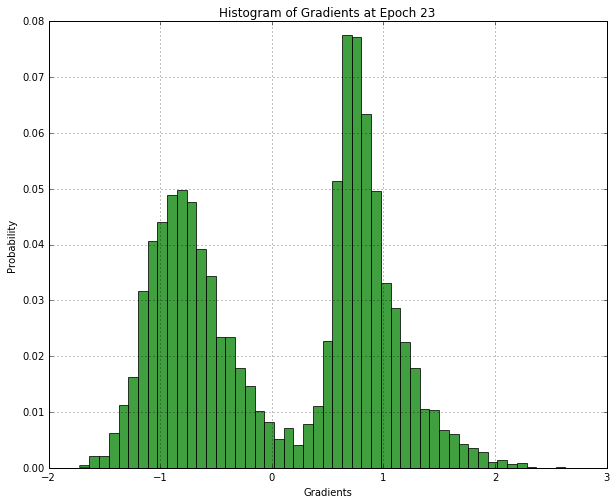

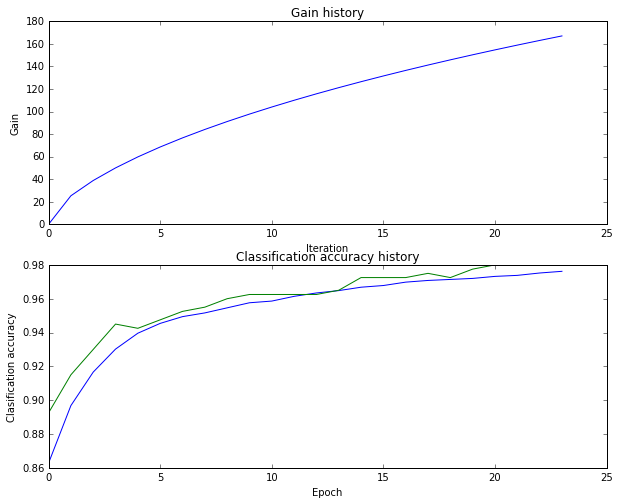

binary training accuracy for digit 9: 0.976200
binary validation accuracy for digit 9: 0.980000
best binary training accuracy for digit 9: 0.976200
best binary validation accuracy for digit 9: 0.980000

average binary training accuracy over all digits: 0.983480
average binary validation accuracy over all digits: 0.979250


In [783]:
from src.classifiers import NonLinearSVM

C_range = [10]  # higher means more slack
gamma_range = np.logspace(-2, -1, 8)  # higher means over-fitting

models = {}
hyperparams = {
    '0': {
        'C': C_range,
        'gamma': [0.02682696]
    },
    '1': {
        'C': C_range,
        'gamma': [0.01]
    },
    '2': {
        'C': C_range,
        'gamma': [0.03727594]
    },
    '3': {
        'C': C_range,
        'gamma': [0.02682696]
    },
    '4': {
        'C': C_range,
        'gamma': [0.03727594]
    },
    '5': {
        'C': C_range,
        'gamma': [0.02682696]
    },
    '6': {
        'C': C_range,
        'gamma': [0.03727594]
    },
    '7': {
        'C': C_range,
        'gamma': [0.02682696]
    },
    '8': {
        'C': C_range,
        'gamma': [0.02682696]
    },
    '9': {
        'C': C_range,
        'gamma': [0.02682696]
    }
}

avg_train_acc = 0.0
avg_val_acc = 0.0

for j in range(0, num_classes):
    best_val = -1
    for C in hyperparams[str(j)]['C']:
        for gamma in hyperparams[str(j)]['gamma']:
            print
            print 'Training digit %d...\n' % j
            nonlinear_svm = NonLinearSVM()
            stats = nonlinear_svm.train(X[str(j)]['train'], y[str(j)]['train'],
                                        X[str(j)]['val'], y[str(j)]['val'],
                                        learning_rate=7e-3, C=C, gamma=gamma,
                                        num_epochs=48, verbose=True)
            y_train_pred = nonlinear_svm.predict(X[str(j)]['train'])
            y_val_pred = nonlinear_svm.predict(X[str(j)]['val'])

            # Plot the loss function and train / validation accuracies
            plt.subplot(2, 1, 1)
            plt.plot(stats['gain_history'])
            plt.title('Gain history')
            plt.xlabel('Iteration')
            plt.ylabel('Gain')

            plt.subplot(2, 1, 2)
            plt.plot(stats['train_acc_history'], label='train')
            plt.plot(stats['val_acc_history'], label='val')
            plt.title('Classification accuracy history')
            plt.xlabel('Epoch')
            plt.ylabel('Clasification accuracy')
            plt.show()

            train_acc = np.mean(y[str(j)]['train'] == np.sign(y_train_pred))
            print 'binary training accuracy for digit %d: %f' % (j, train_acc)

            val_acc = np.mean(y[str(j)]['val'] == np.sign(y_val_pred))
            print 'binary validation accuracy for digit %d: %f' % (j, val_acc)

            if val_acc > best_val:
                best_val = val_acc
                # save bestmodel
                models[str(j)] = {'model': nonlinear_svm, 'C': C, 'gamma': gamma}
    
    best_model = models[str(j)]['model']
    
    y_train_pred = best_model.predict(X[str(j)]['train'])
    train_acc = np.mean(y[str(j)]['train'] == np.sign(y_train_pred))
    print 'best binary training accuracy for digit %d: %f' % (j, train_acc)
    avg_train_acc += train_acc
    
    y_val_pred = best_model.predict(X[str(j)]['val'])
    val_acc = np.mean(y[str(j)]['val'] == np.sign(y_val_pred))
    print 'best binary validation accuracy for digit %d: %f' % (j, val_acc)
    avg_val_acc += val_acc

print
print 'average binary training accuracy over all digits: %f' % (avg_train_acc / num_classes)
print 'average binary validation accuracy over all digits: %f' % (avg_val_acc / num_classes)

Now it's time to classify the test set and check our accuracy.

In [17]:
num_test = len(y_test)
y_test_pred = np.zeros((num_test, num_classes))

for digit, model in models.iteritems():
    y_test_pred[:, int(digit)] = model['model'].predict(X_test).T
    
print 'accuracy on held-out test set %f' % (np.mean(np.argmax(y_test_pred, axis=1) == y_test))

accuracy on held-out test set 0.955200


Let's output a precision-recall summary and a confusion matrix.

In [786]:
# Import datasets, classifiers and performance metrics
from sklearn import metrics

print("Classification report for classifier %s:\n%s\n"
      % ('non-linear svm', metrics.classification_report(y_test, np.argmax(y_test_pred, axis=1))))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, np.argmax(y_test_pred, axis=1)))

Classification report for classifier non-linear svm:
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       980
          1       0.98      0.99      0.98      1135
          2       0.94      0.94      0.94      1032
          3       0.96      0.94      0.95      1010
          4       0.94      0.96      0.95       982
          5       0.94      0.95      0.94       892
          6       0.97      0.96      0.96       958
          7       0.97      0.92      0.94      1028
          8       0.93      0.94      0.93       974
          9       0.92      0.94      0.93      1009

avg / total       0.95      0.95      0.95     10000


Confusion matrix:
[[ 959    1    3    0    0    7    6    1    3    0]
 [   0 1119    3    3    1    2    3    0    4    0]
 [   8    1  969    7    5    0    3   11   27    1]
 [   0    0   11  948    0   22    1    8   16    4]
 [   1    0    3    0  943    0    8    0    2   25]
 [   5    1    2    9   